In [1]:
rm(list=ls())
require(tidyr)
require(ggplot2)
require(coda)

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: coda


# Estimate S using wf simulations

In [2]:
##wf simulations to just s values and simulated f2s, can input multiple ne values with multiple generations
wfs_bs_simp=function(x, ne=c(598), gen=1, smin=-1, smax=1){
    ##determine direction of maf change  to determine outliers
    f2s=replicate(1000, mapply(wfs_byf1_variablene_s,  x[,2], MoreArgs = list(gen=gen, ne=ne, h=0.5, smin=-1, smax=1)))
    f2s=as.data.frame(f2s)
    snp=x[1,1]
    f2s$SNP=snp
    out=f2s
return(out)

}

# gen: the number of generations to simulate
# ne: the effective population size (in number of alleles) for each sampled generation; length(n) == gen
wfs_byf1_variablene_s <- function(f1=0.5, gen=2, ne=c(1000,10), h=0.5, smin=-1, smax=1){ 
#using bootstrapped values as f1 and f2. comparing f2 to simulated f2s. 
	# choose parameters for this simulation
		s <- runif(1, min=smin, max=smax) # selection coefficient
    ##for some reason angsd gave some bootstrapped f1s that are > 1...so round to 1. 
    if(f1>1) f1=round(f1)
	#print(paste(f1, s, thisne))
	
	p <- f1 # current allele frequency
	waa <- 1+s # relative fitness of genotype AA
	wab <- 1+s*h
	wbb <- 1
	for(i in 1:gen){
		x <- (waa*p^2 + wab*p*(1-p))/(waa*p^2 + wab*2*p*(1-p) + wbb*(1-p)^2) # probability of sampling allele A, given selection
		p <- rbinom(1,ne[i],x)/ne[i]
		#print(paste(x,p))
	}
	f2 <- p
	
	# return values
	out = c(f1,f2, s)
        return(out)
}


In [3]:
##function to count the 1000 closest simulated f2s to the 100 bs f2s to create distribution to sample from
wfs_bs_s_count=function(bs, sim){
    ##pull out bs f2s
    f2bsvalues=bs[3]
    simfull=as.data.frame(sim)
    #create column of 0s to count 
    simfull$count=0
    for (i in 1:NROW(f2bsvalues)){
        f2bs=f2bsvalues[i,]
        #print(f2bs)
        #order by closest values
        simfull$diff=abs(simfull$V2 - f2bs)
        simfull=simfull[order(simfull$diff),]
        #add a 1 to first 1000 rows
        simfull$count[1:1000]=simfull$count[1:1000] + 1
    }
    out=c(simfull, f2bs)
return(out)
}


In [4]:
##function to count the 1000 closest simulated f2s to the 100 bs f2s to create distribution to sample from
wfs_bs_s_count=function(bs, sim){
    ##pull out bs f2s
    f2bsvalues=bs[3]
    #print(NROW(f2bsvalues))
    simfull=as.data.frame(sim)
    #create column of 0s to count 
    simfull$count=0
    for (i in 1:NROW(f2bsvalues)){
        f2bs=f2bsvalues[i,]
        #print(f2bs)
        #order by closest values
        simfull$diff=abs(simfull$V2 - f2bs)
        #print(diff)
        simfull=simfull[order(simfull$diff),]
        #add a 1 to first 1000 rows
        simfull$count[1:1000]=simfull$count[1:1000] + 1
    }
    simfull$count=as.numeric(as.character(simfull$count))
   # simfull$f2bs=rep(as.vector(f2bsvalues$MAF_E),len=10001)
    out=c(simfull)
return(out)
}

In [5]:
#only need to do this for significant snps
comPvaluesChrNJNY50sig_out=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNY502noout_sigCompvalues_nr_Ne424_296.csv", row.names=1)

In [6]:
setwd("/data/sarahgw/WGS/SNPS/All_mylu/mafs/NJNY50_Bootstrapped_mafs/All_bootstrapped_mafs/Combined_mafs")
nj_files = list.files( pattern="NJ_")
NJ=lapply(nj_files, read.table, header=T)

In [7]:
setwd("/data/sarahgw/WGS/SNPS/All_mylu/mafs/NYUnoout_Bootstrapped_mafs/All_bootstrapped_mafs/Combined_mafs/")
ny_files = list.files( pattern="NY_")
NY=lapply(ny_files, read.table, header=T)

In [8]:
NJ_sig=Filter(function(x) x[1,1] %in% comPvaluesChrNJNY50sig_out$SNP, NJ)
NY_sig=Filter(function(x) x[1,1] %in% comPvaluesChrNJNY50sig_out$SNP, NY)

In [9]:
lapply(NY_sig, `[`, 2, )

[[1]]
    SNP    MAF_U   MAF_E nInd_U nInd_E
2 11932 0.335778 0.78819     10     12

[[2]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 1241213 0.524043 0.743304     13     10

[[3]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 1396110 0.807491 0.129724     15     13

[[4]]
      SNP    MAF_U MAF_E nInd_U nInd_E
2 1484586 0.488114 3e-06      9     12

[[5]]
       SNP    MAF_U    MAF_E nInd_U nInd_E
2 14993622 0.860941 0.071348     12     13

[[6]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 1661413 0.160362 0.790855     10     11

[[7]]
       SNP    MAF_U MAF_E nInd_U nInd_E
2 16839644 0.722371 2e-06      8     11

[[8]]
     SNP    MAF_U    MAF_E nInd_U nInd_E
2 173352 0.714167 0.038804     12     17

[[9]]
     SNP    MAF_U MAF_E nInd_U nInd_E
2 180278 0.257796 4e-06     10     14

[[10]]
      SNP    MAF_U MAF_E nInd_U nInd_E
2 1956978 0.407538 6e-06     12      9

[[11]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2043530 0.161628 0.815434      9     13

[[12]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2056629 0.414411 0.112173     12     12

[[13]]
      SNP   MAF_U MAF_E nInd_U nInd_E
2 2091046 0.85954 7e-06     11     10

[[14]]
       SNP   MAF_U   MAF_E nInd_U nInd_E
2 22649683 0.38056 0.85899     10     14

[[15]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2414078 0.090629 0.564729     10     13

[[16]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2444879 0.521957 0.756716     12      8

[[17]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2575249 0.218167 0.693099     11     12

[[18]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2586279 0.999997 0.375717      7     11

[[19]]
     SNP    MAF_U    MAF_E nInd_U nInd_E
2 293372 0.518091 0.999996     15     10

[[20]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2943933 0.077293 0.665776      9     12

[[21]]
      SNP    MAF_U   MAF_E nInd_U nInd_E
2 2966433 0.648823 0.16268     13      8

[[22]]
       SNP MAF_U    MAF_E nInd_U nInd_E
2 29962249 2e-06 0.636289      7     11

[[23]]
     SNP    MAF_U MAF_E nInd_U nInd_E
2 300331 0.378634 4e-06     10      8

[[24]]
      SNP MAF_U    MAF_E nInd_U nInd_E
2 3065399 4e-06 0.999994      8     11

[[25]]
      SNP MAF_U    MAF_E nInd_U nInd_E
2 3229647 1e-06 0.696138      8     13

[[26]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 3311579 0.728755 0.149672      8     11

[[27]]
      SNP    MAF_U   MAF_E nInd_U nInd_E
2 3445677 0.917389 0.18439      8     11

[[28]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 3508435 0.511904 0.761442      7      9

[[29]]
      SNP   MAF_U    MAF_E nInd_U nInd_E
2 3522450 0.05345 0.675028     11      9

[[30]]
      SNP MAF_U    MAF_E nInd_U nInd_E
2 3561000 5e-06 0.263829      8      9

[[31]]
     SNP MAF_U   MAF_E nInd_U nInd_E
2 365354 2e-06 0.56722      7     10

[[32]]
     SNP    MAF_U    MAF_E nInd_U nInd_E
2 384336 0.749564 0.374826      6     12

[[33]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 3921142 0.538423 0.084432     11     11

[[34]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 4091453 0.773352 0.135838      9     12

[[35]]
      SNP    MAF_U MAF_E nInd_U nInd_E
2 4124241 0.770467 5e-06     11      8

[[36]]
      SNP    MAF_U MAF_E nInd_U nInd_E
2 4401152 0.541433 3e-06     10      9

[[37]]
       SNP    MAF_U MAF_E nInd_U nInd_E
2 46534125 0.440553 3e-06     12     10

[[38]]
     SNP MAF_U    MAF_E nInd_U nInd_E
2 496908 1e-06 0.843932      9     10

[[39]]
     SNP   MAF_U    MAF_E nInd_U nInd_E
2 514067 0.67832 0.149278     11     12

[[40]]
     SNP    MAF_U   MAF_E nInd_U nInd_E
2 525210 0.241261 0.53918     10     11

[[41]]
      SNP MAF_U    MAF_E nInd_U nInd_E
2 5556309 6e-06 0.492978      7     13

[[42]]
     SNP    MAF_U MAF_E nInd_U nInd_E
2 593841 0.694377 3e-06     12     11

[[43]]
    SNP    MAF_U    MAF_E nInd_U nInd_E
2 60325 0.731741 0.081448      9     10

[[44]]
    SNP    MAF_U    MAF_E nInd_U nInd_E
2 60326 0.663131 0.335531      9     10

[[45]]
     SNP    MAF_U    MAF_E nInd_U nInd_E
2 612532 0.203538 0.664194     13     13

[[46]]
     SNP

In [10]:
NJ_f2s=lapply(NJ_sig, wfs_bs_simp, ne=c(424, 296), gen=2)
NJ_f2s=lapply(NJ_f2s, t)
NJ_f2s=lapply(NJ_f2s, as.data.frame)
tNJ_f2s=lapply(NJ_f2s, FUN=function(x){x$SNP=x[100001,2]; x})


In [11]:
head(tNJ_f2s[[1]])

V1    V2 V3          SNP  
V1 4e-06 0   0.10755001 11932
V2 4e-06 0   0.25797893 11932
V3 5e-06 0   0.46794768 11932
V4 4e-06 0  -0.05360906 11932
V5 5e-06 0  -0.02238641 11932
V6 6e-06 0   0.79068502 11932

In [12]:
#f1s and simulated f2s for 2056629
head(tNJ_f2s[12])

[[1]]
                  V1           V2            V3     SNP
V1      9.999970e-01 1.000000e+00 -3.612038e-01 2056629
V2      9.999950e-01 1.000000e+00  5.138842e-01 2056629
V3      9.999950e-01 1.000000e+00 -7.101623e-01 2056629
V4      9.999920e-01 1.000000e+00  4.462250e-01 2056629
V5      9.999970e-01 1.000000e+00  3.452835e-01 2056629
V6      9.999980e-01 1.000000e+00  3.602806e-01 2056629
V7      9.999980e-01 1.000000e+00  9.522383e-01 2056629
V8      9.999970e-01 1.000000e+00  9.908043e-01 2056629
V9      9.999990e-01 1.000000e+00  1.322597e-01 2056629
V10     9.999970e-01 1.000000e+00 -7.553785e-01 2056629
V11     9.999960e-01 1.000000e+00 -3.586130e-01 2056629
V12     9.999980e-01 1.000000e+00  6.345766e-01 2056629
V13     9.999960e-01 1.000000e+00 -4.300254e-01 2056629
V14     9.999960e-01 1.000000e+00 -8.677526e-01 2056629
V15     9.999970e-01 1.000000e+00  5.186123e-01 2056629
V16     9.999980e-01 1.000000e+00 -2.449062e-01 2056629
V17     9.999970e-01 1.000000e+00  9.413106e-01 2056629
V18     9.999990e-01 1.000000e+00 -6.484780e-01 2056629
V19     9.999990e-01 1.000000e+00  7.397895e-01 2056629
V20     9.999970e-01 1.000000e+00  7.531712e-01 2056629
V21     9.999970e-01 1.000000e+00 -9.889312e-01 2056629
V22     9.999980e-01 1.000000e+00 -1.052914e-01 2056629
V23     9.999990e-01 1.000000e+00  7.901467e-01 2056629
V24     9.999990e-01 1.000000e+00 -6.421397e-02 2056629
V25     9.999980e-01 1.000000e+00  1.364335e-01 2056629
V26     9.999960e-01 1.000000e+00  8.367970e-01 2056629
V27     9.999980e-01 1.000000e+00  3.031980e-01 2056629
V28     9.999960e-01 1.000000e+00  5.763934e-01 2056629
V29     9.999960e-01 1.000000e+00  9.029057e-01 2056629
V30     9.999970e-01 1.000000e+00  7.090326e-01 2056629
V31     9.999970e-01 1.000000e+00  1.469487e-01 2056629
V32     9.999990e-01 1.000000e+00 -4.123325e-01 2056629
V33     9.999980e-01 1.000000e+00 -2.664624e-01 2056629
V34     9.999950e-01 1.000000e+00 -4.930680e-01 2056629
V35     9.999970e-01 1.000000e+00  3.506246e-01 2056629
V36     9.999990e-01 1.000000e+00 -5.676510e-01 2056629
V37     9.999970e-01 1.000000e+00 -4.959791e-01 2056629
V38     9.999970e-01 1.000000e+00  6.290129e-01 2056629
V39     9.999970e-01 1.000000e+00  4.227607e-01 2056629
V40     9.999970e-01 1.000000e+00 -4.617478e-01 2056629
V41     9.999990e-01 1.000000e+00 -6.834869e-01 2056629
V42     9.999920e-01 1.000000e+00  6.008131e-01 2056629
V43     9.999960e-01 1.000000e+00 -7.834774e-01 2056629
V44     9.999980e-01 1.000000e+00 -7.330475e-01 2056629
V45     9.999960e-01 1.000000e+00  9.282205e-01 2056629
V46     9.999960e-01 1.000000e+00  9.020790e-01 2056629
V47     9.999990e-01 1.000000e+00  3.877721e-01 2056629
V48     9.999980e-01 1.000000e+00 -2.431378e-01 2056629
V49     9.999980e-01 1.000000e+00  2.510063e-01 2056629
V50     9.999980e-01 1.000000e+00  7.235489e-01 2056629
V51     9.999960e-01 1.000000e+00  3.510406e-01 2056629
V52     9.999980e-01 1.000000e+00  9.790654e-01 2056629
V53     9.999970e-01 1.000000e+00  6.945902e-01 2056629
V54     9.999960e-01 1.000000e+00 -6.455391e-01 2056629
V55     9.999960e-01 1.000000e+00 -1.875396e-01 2056629
V56     9.999980e-01 1.000000e+00  7.003533e-01 2056629
V57     9.999970e-01 1.000000e+00  4.903973e-01 2056629
V58     9.999950e-01 1.000000e+00  1.438368e-01 2056629
V59     9.999970e-01 1.000000e+00  5.351100e-01 2056629
V60     9.999970e-01 1.000000e+00 -4.610738e-01 2056629
V61     9.999960e-01 1.000000e+00 -7.218555e-01 2056629
V62     9.999920e-01 1.000000e+00  9.070688e-01 2056629
V63     9.999960e-01 1.000000e+00  1.122377e-01 2056629
V64     9.999980e-01 1.000000e+00  3.924976e-01 2056629
V65     9.999980e-01 1.000000e+00  5.046006e-01 2056629
V66     9.999980e-01 1.000000e+00  2.471772e-01 2056629
V67     9.999990e-01 1.000000e+00 -5.367118e-01 2056629
V68     9.999960e-01 1.000000e+00  5.998201e-02 2056629
V69     9.999980e-01 1.000000e+00 -5.346074e-01 2056629
V70     9.999990e-01 1.000000e+00  2.424273e-01 2056629
V71     9.999970e-

In [13]:
#simulated f2s for SNp 11932
#head(tNJ_f2scount[1])

In [14]:
NY_f2s=lapply(NY_sig, wfs_bs_simp, ne=c(424, 296), gen=2)
NY_f2s=lapply(NY_f2s, t)
NY_f2s=lapply(NY_f2s, as.data.frame)
tNY_f2s=lapply(NY_f2s, FUN=function(x){x$SNP=x[100001,2]; x})


In [15]:
test=as.data.frame(NY_f2scount[1])


ERROR: Error in as.data.frame(NY_f2scount[1]): object 'NY_f2scount' not found


In [ ]:
head(test)

In [18]:
#Add count column and count up number of times a simulated f2 is in the top 1k closest to a given bootstrapped f2. 
NY_f2scount=mapply(wfs_bs_s_count, NY_sig, tNY_f2s, SIMPLIFY=FALSE)
NJ_f2scount=mapply(wfs_bs_s_count, NJ_sig, tNJ_f2s, SIMPLIFY=FALSE)

In [ ]:
#sample based on count data produced to get 1000 s values 
#sNJ=lapply(NJ_f2scount, function(x){sample(x$V3, 1000, replace = FALSE, prob = x$count)})
#sNY=lapply(NY_f2scount, function(x){sample(x$V3, 1000, replace = FALSE, prob = x$count)})

In [19]:
samplecounts=function(x){
    ##bind s and count data
    counts=cbind(x$V3, x$count)
    tops=counts[sample(nrow(counts), 1000, replace=FALSE, prob=counts[,2]), ]
    svalues= rep(tops[,1], times = tops[,2])
    out=svalues
return(out)

}

In [20]:
sNJ=lapply(NJ_f2scount, FUN=samplecounts)
sNY=lapply(NY_f2scount, FUN=samplecounts)

Doesnt work when f1 is 0 or 1. 

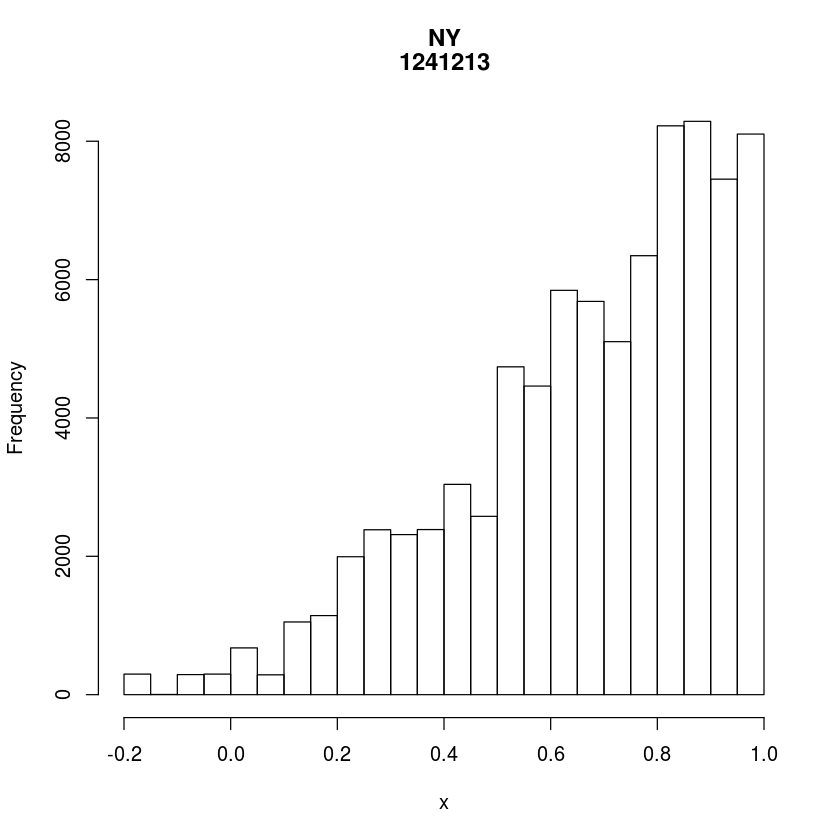

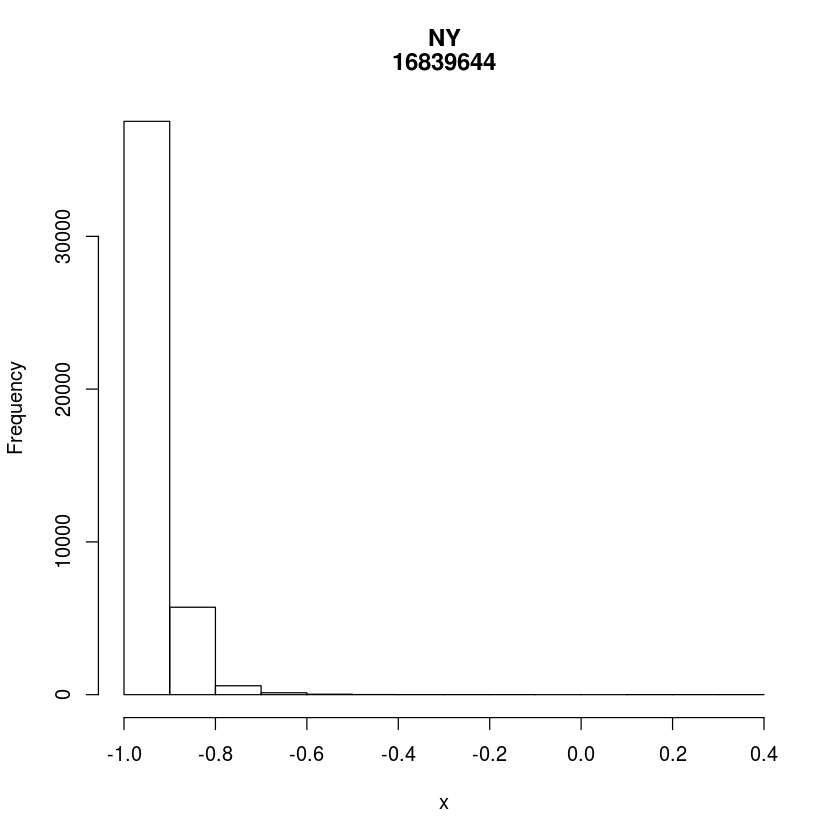

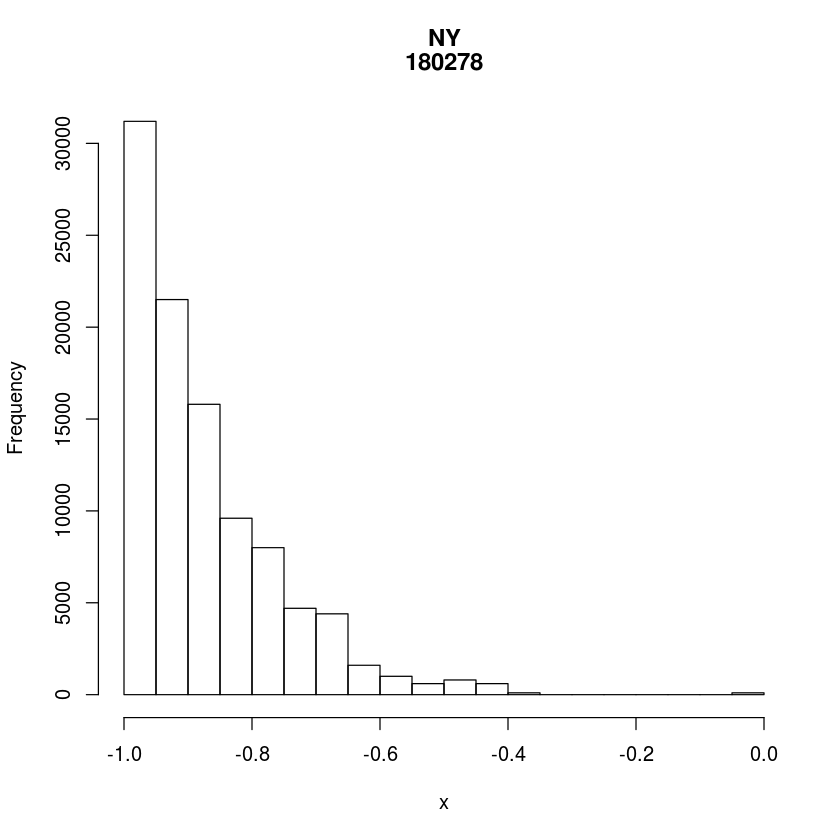

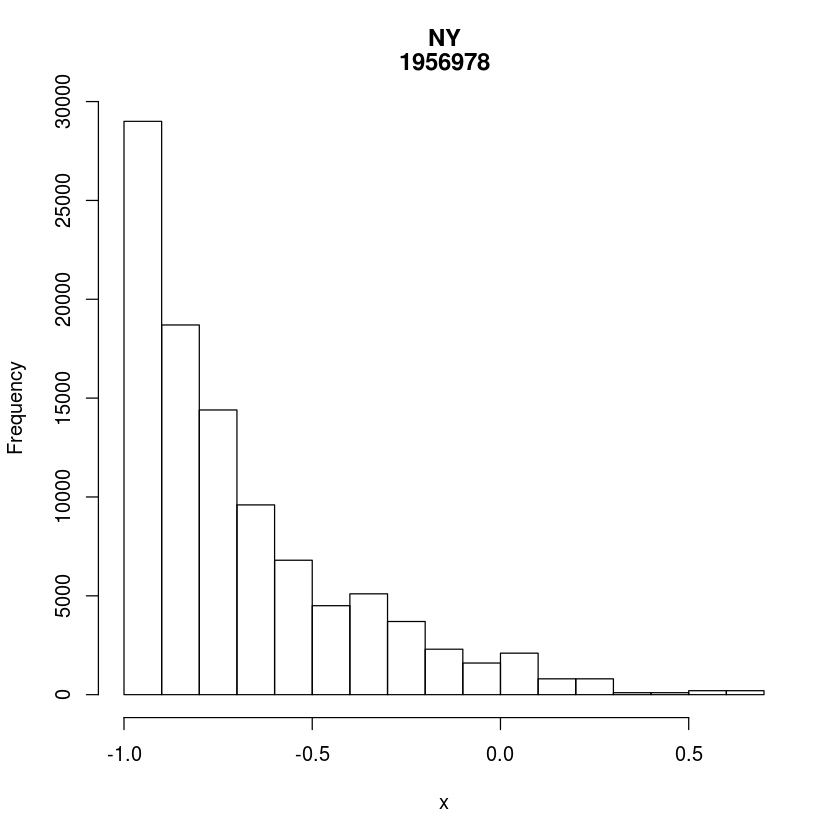

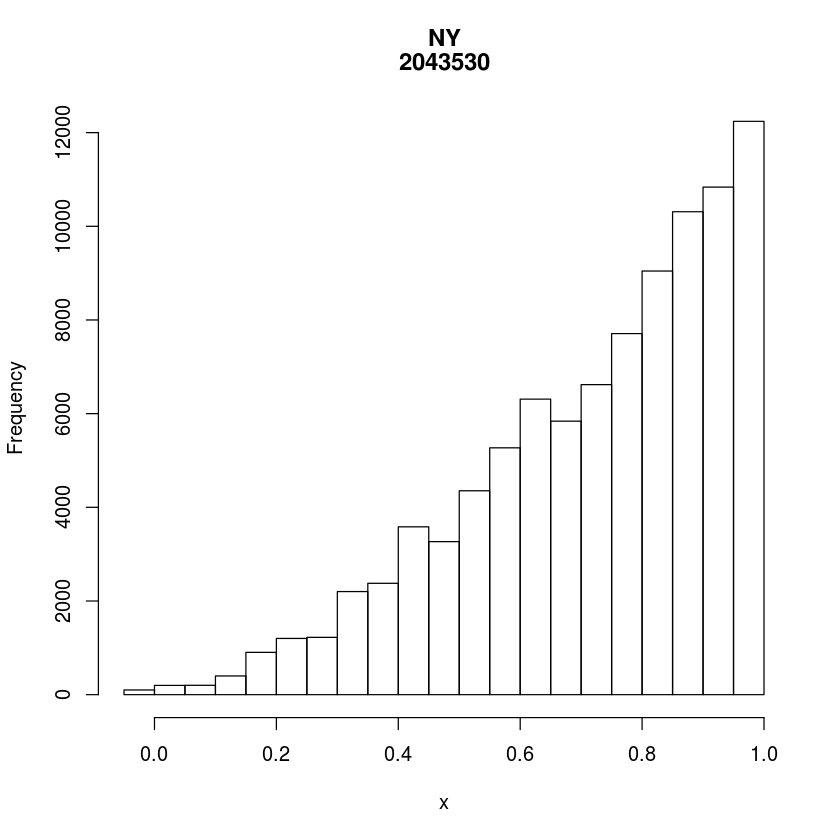

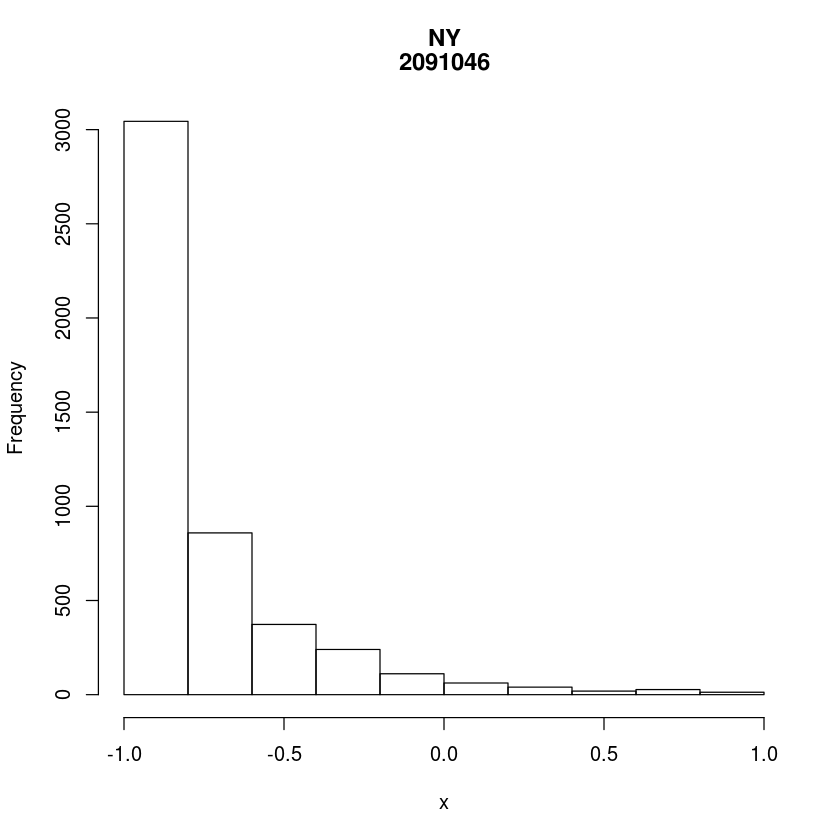

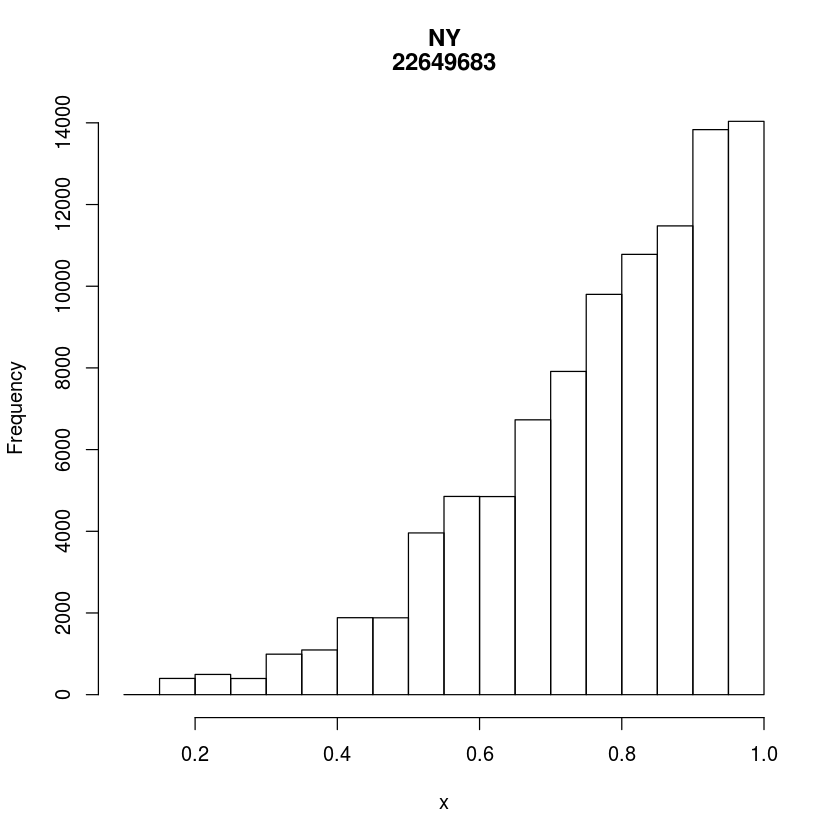

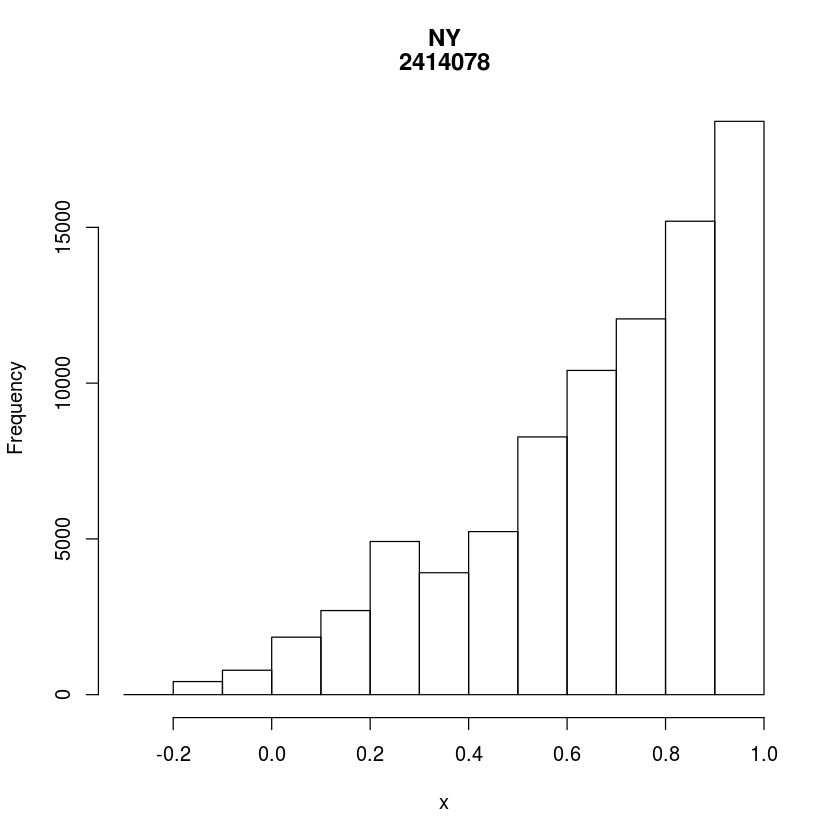

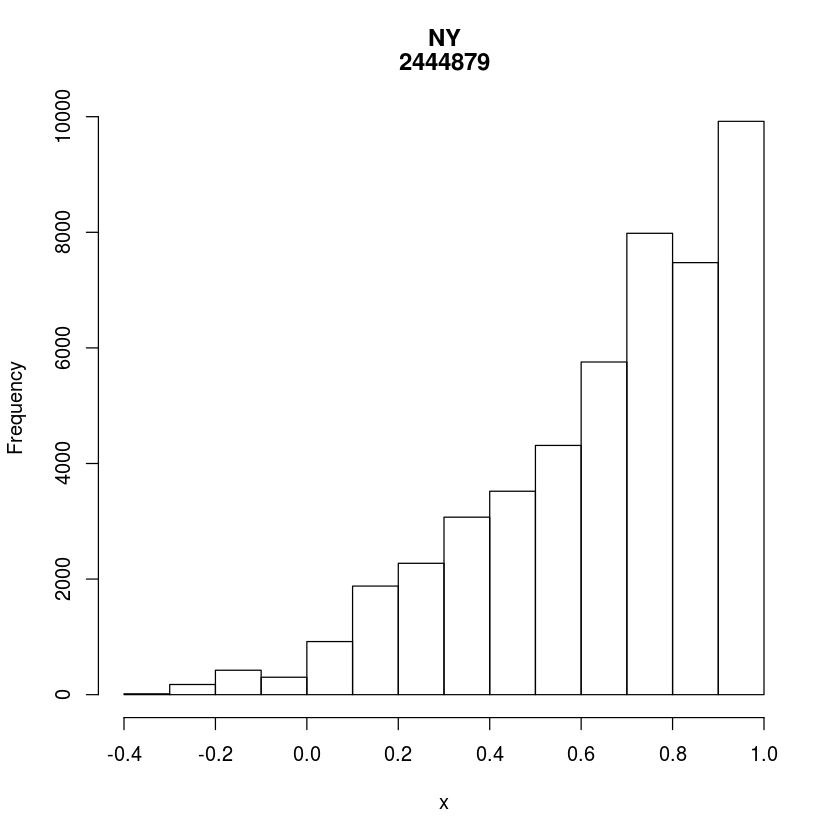

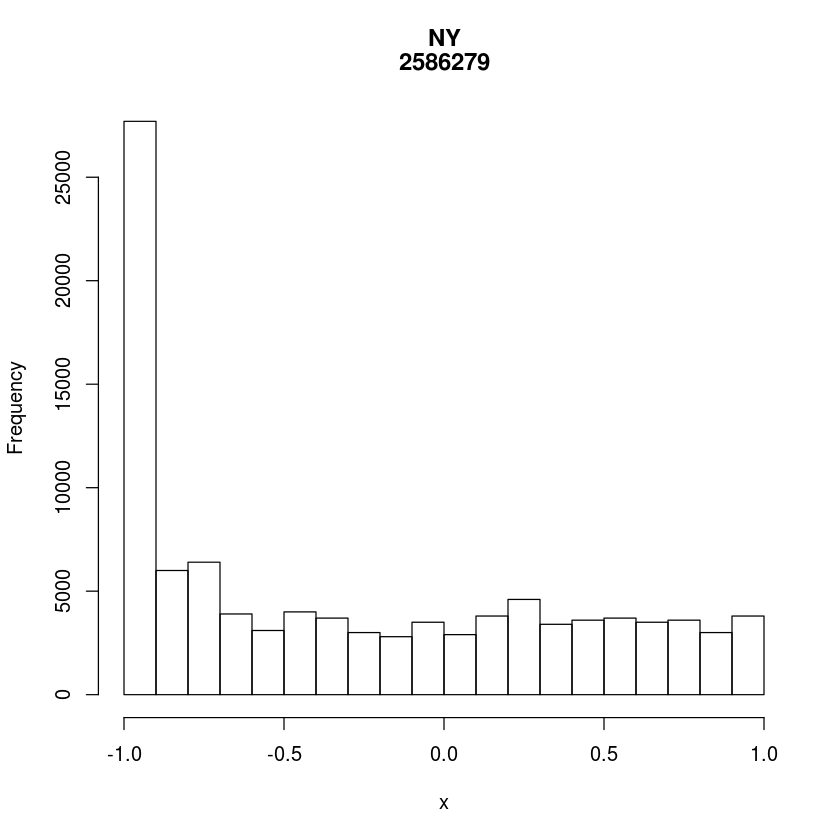

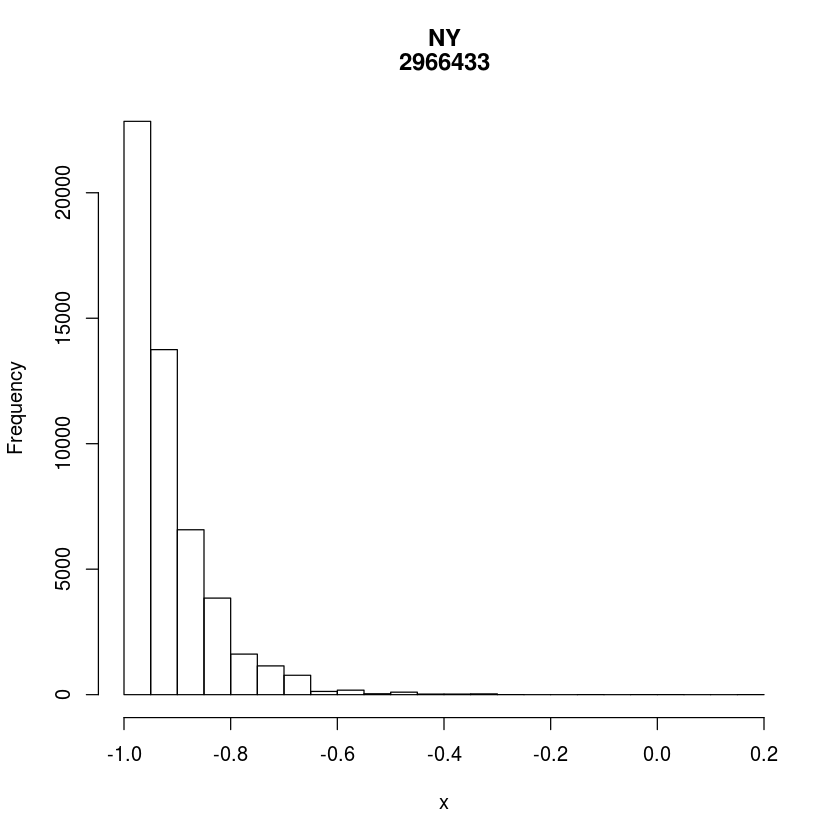

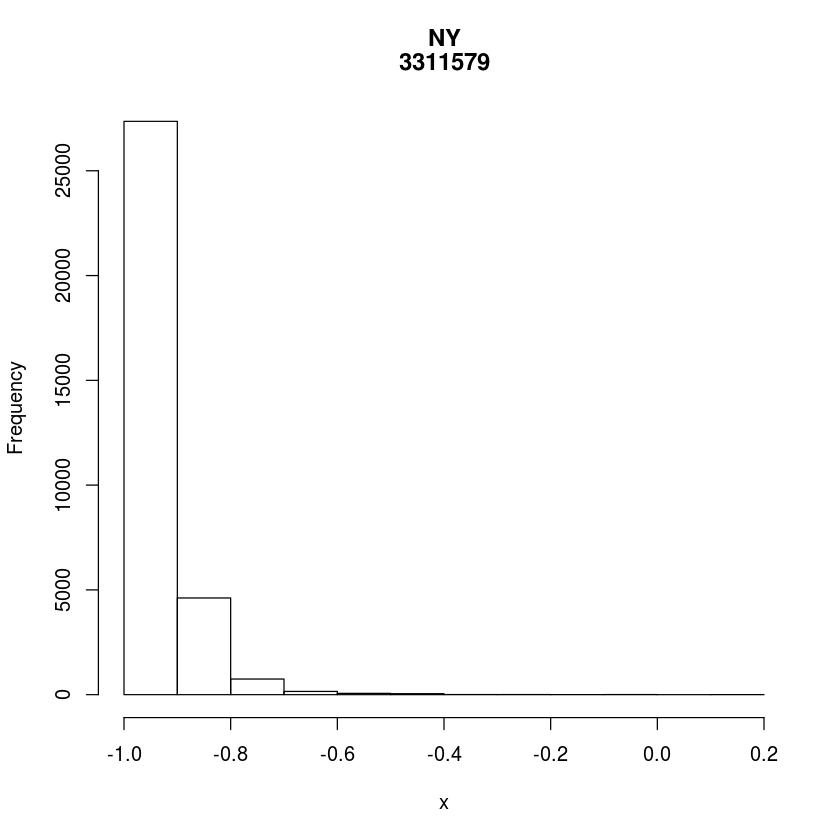

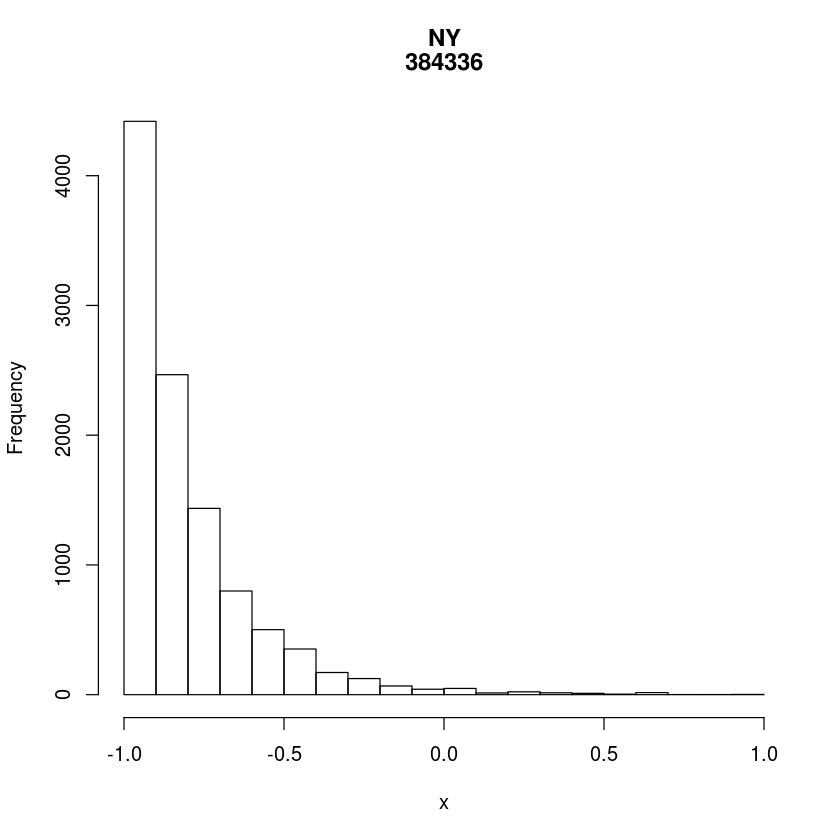

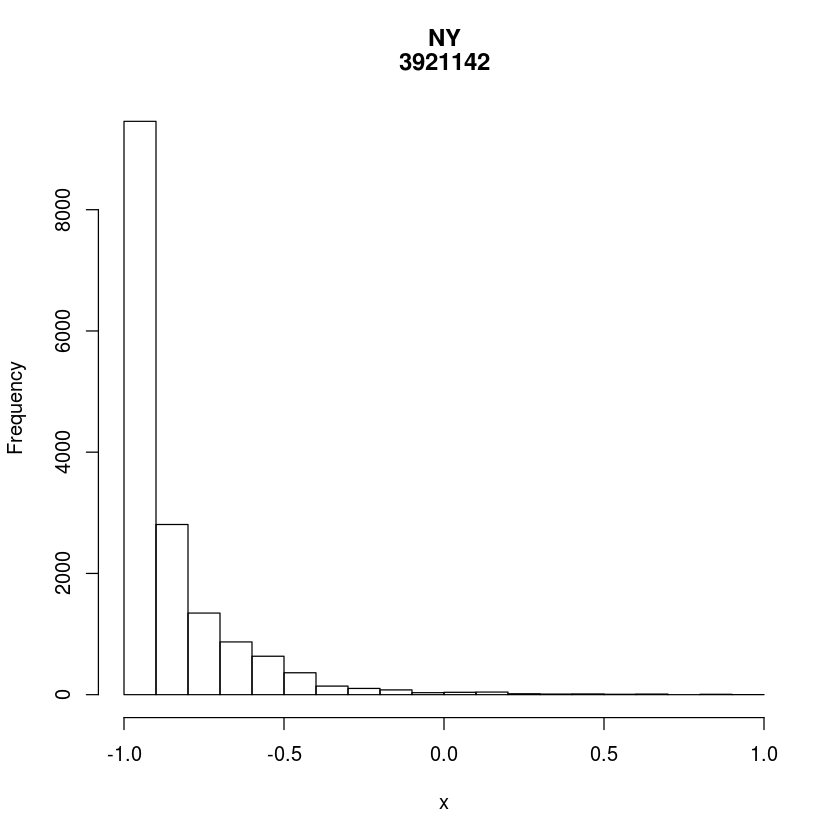

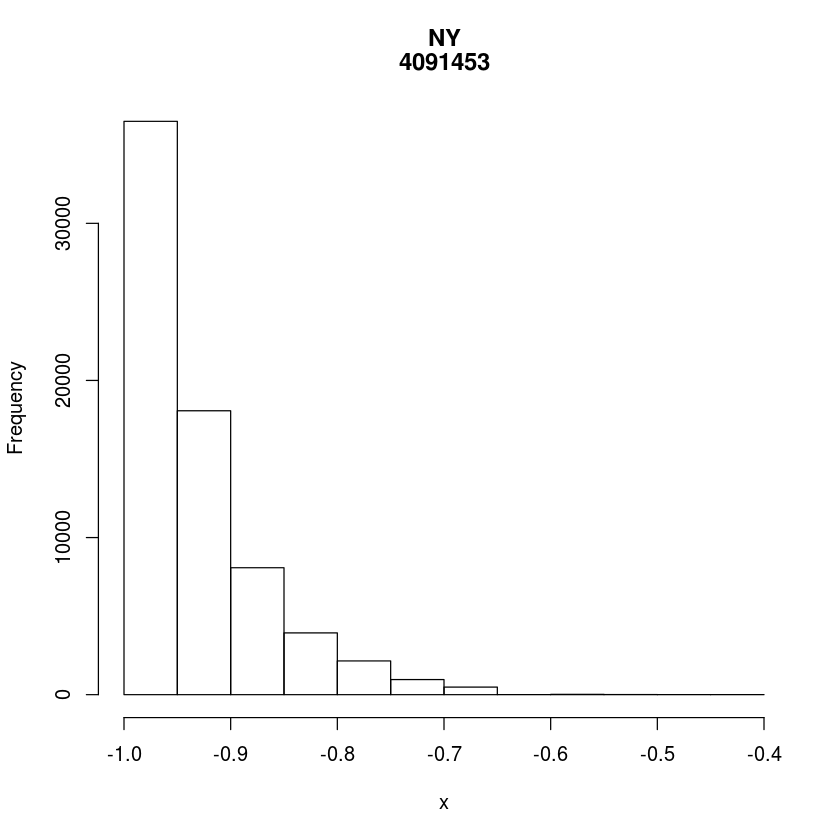

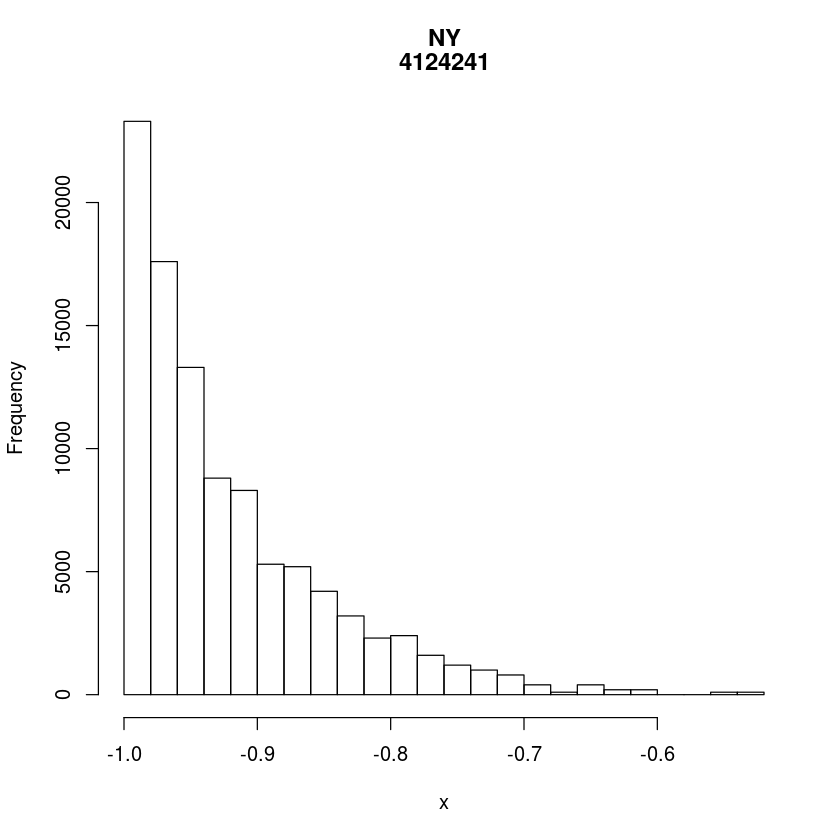

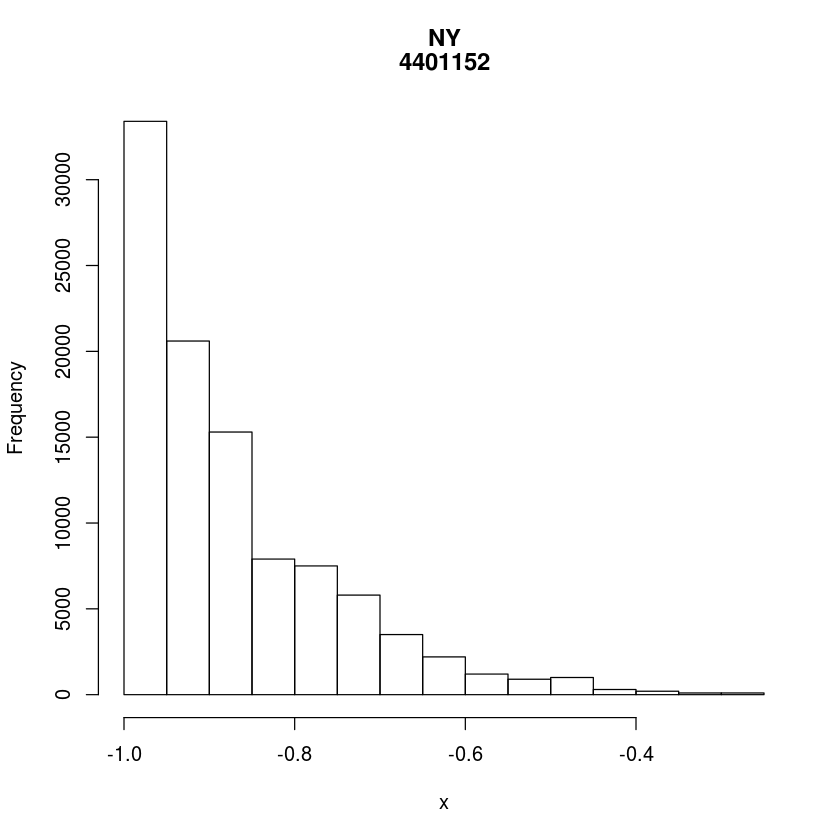

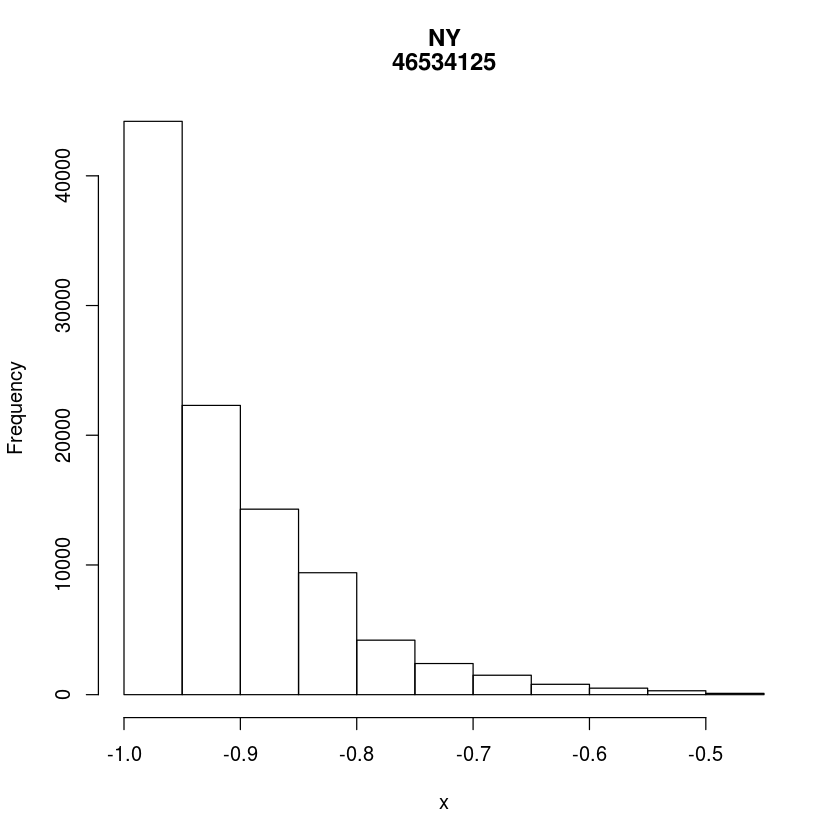

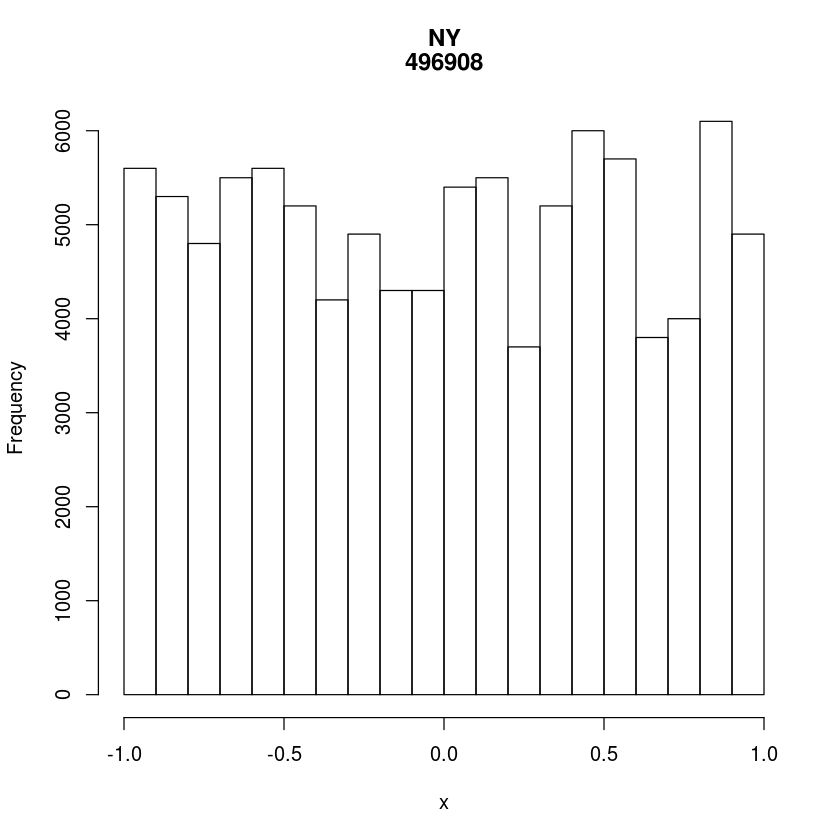

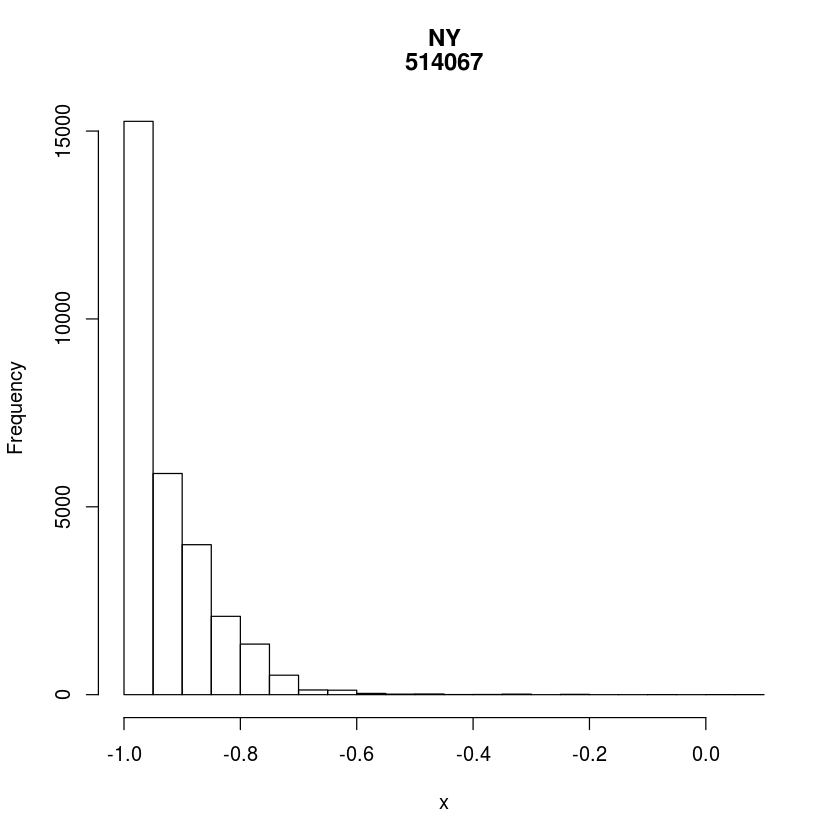

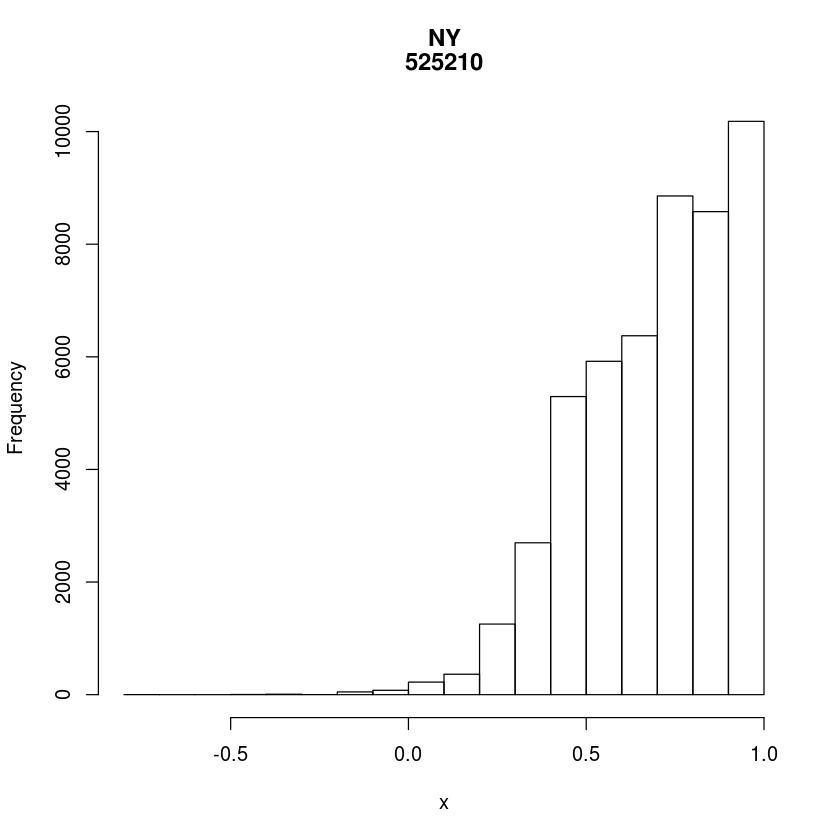

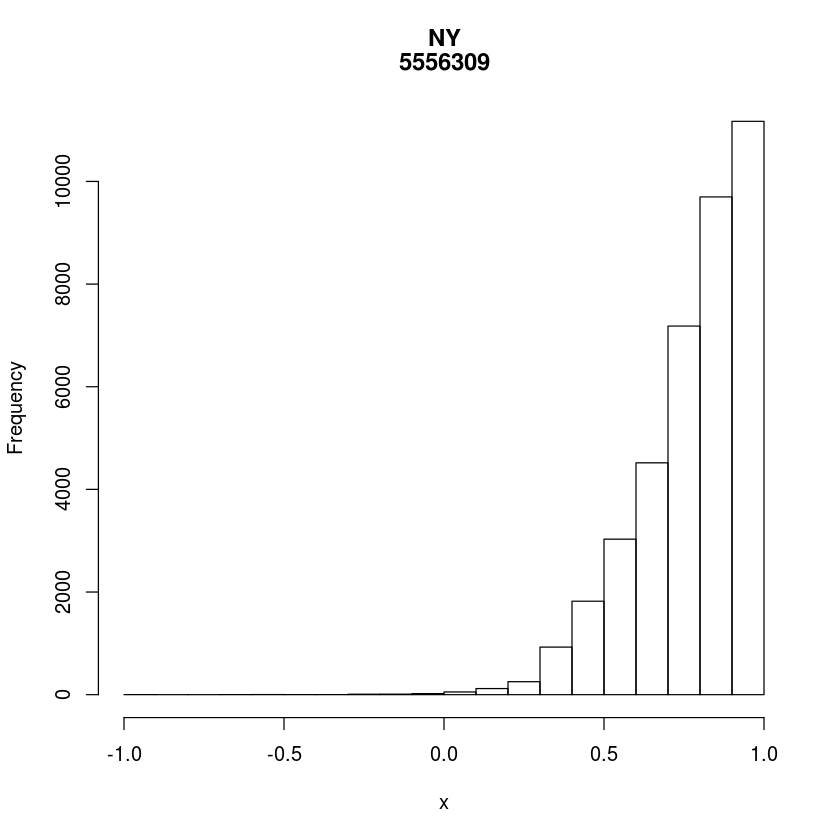

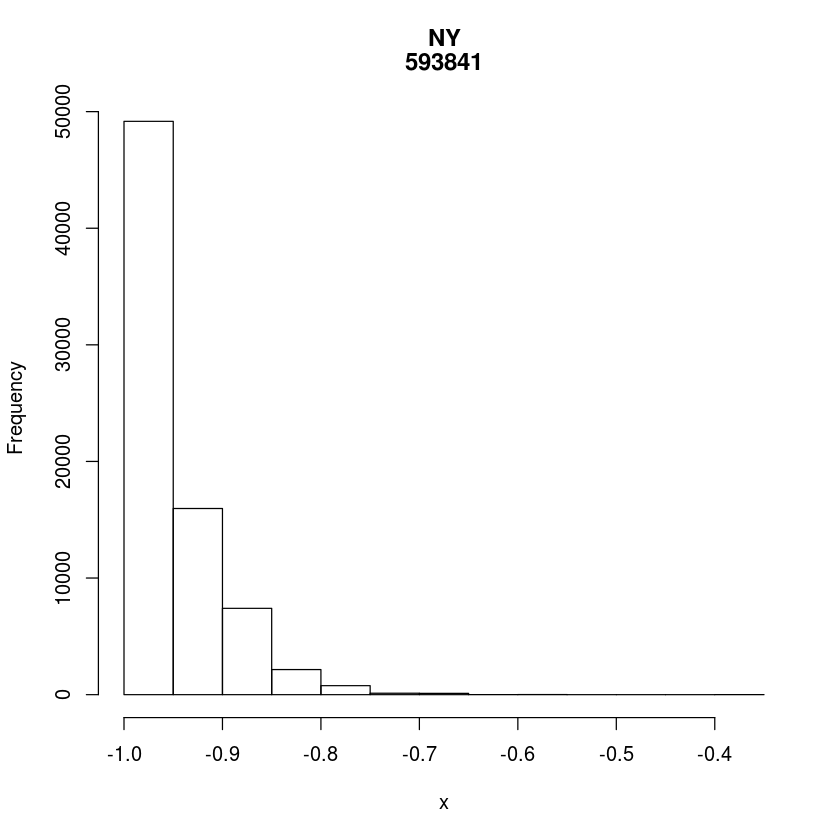

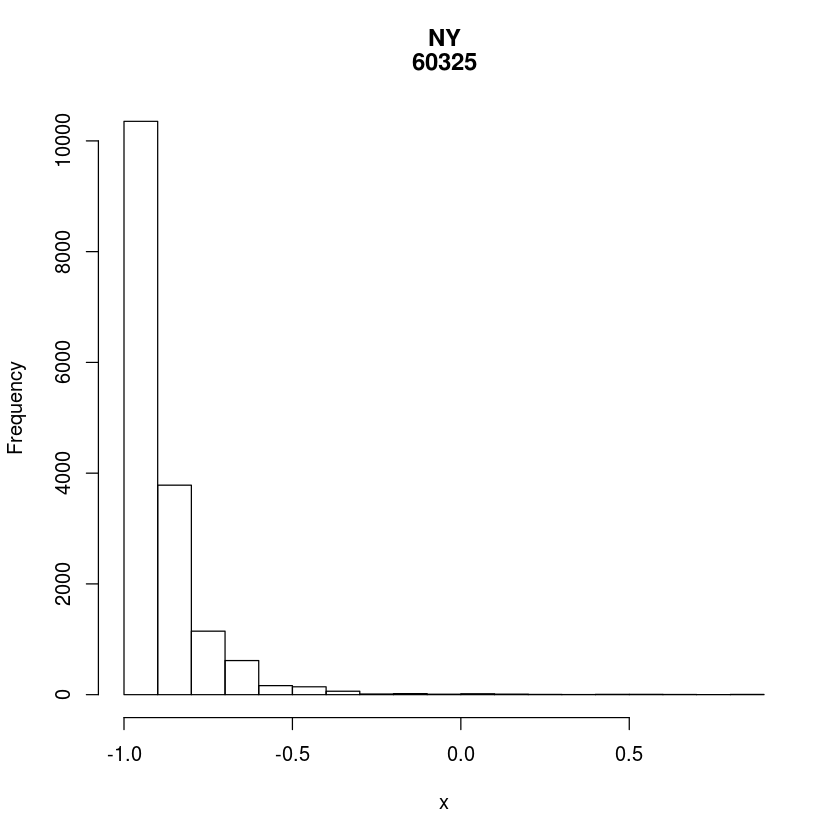

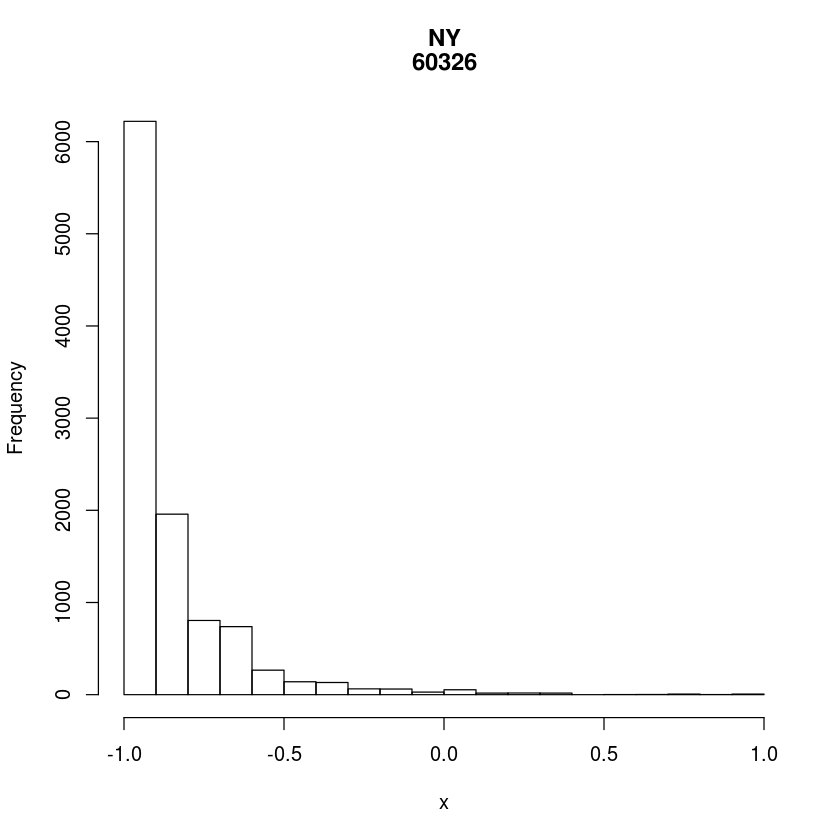

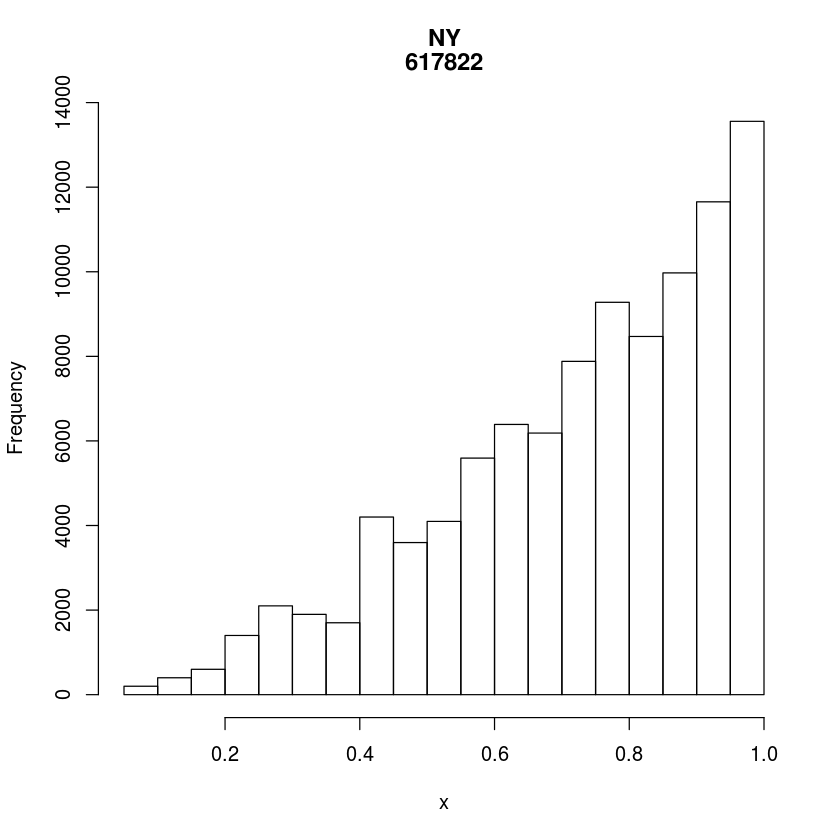

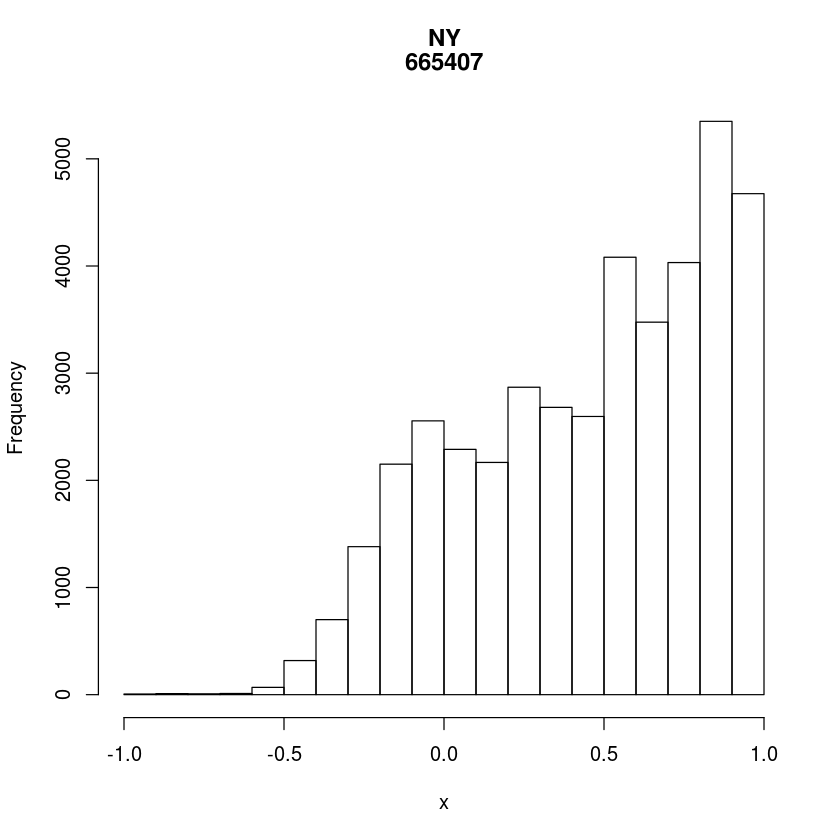

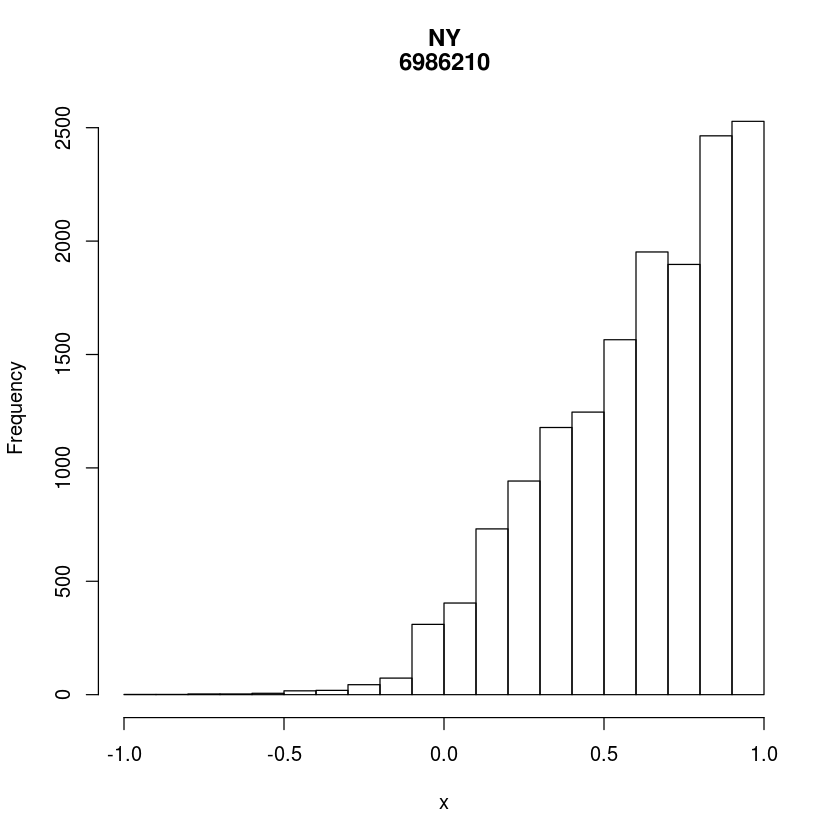

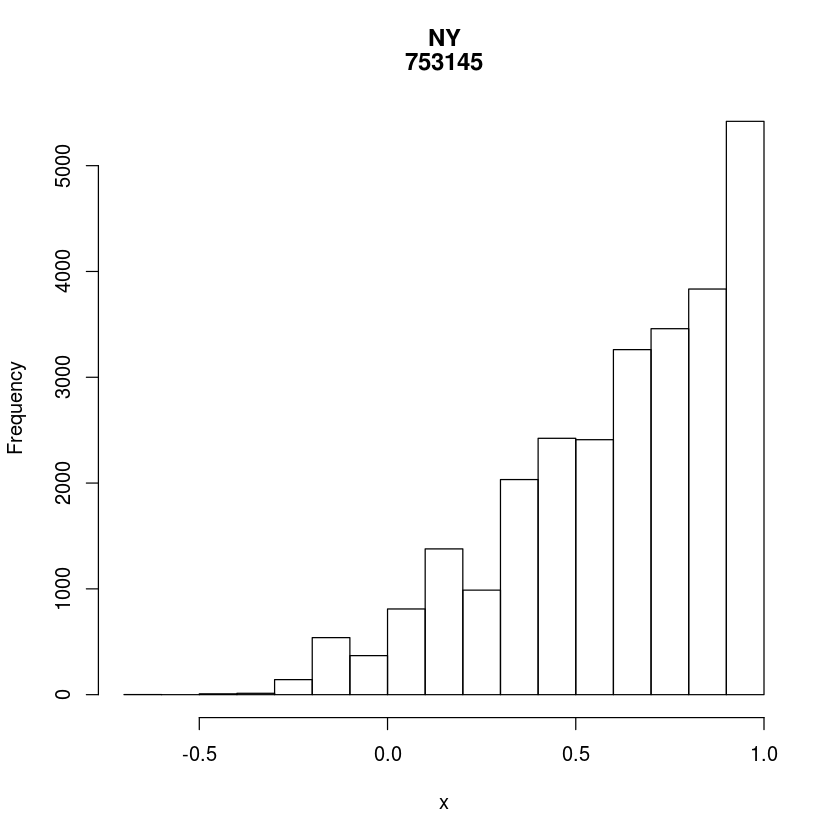

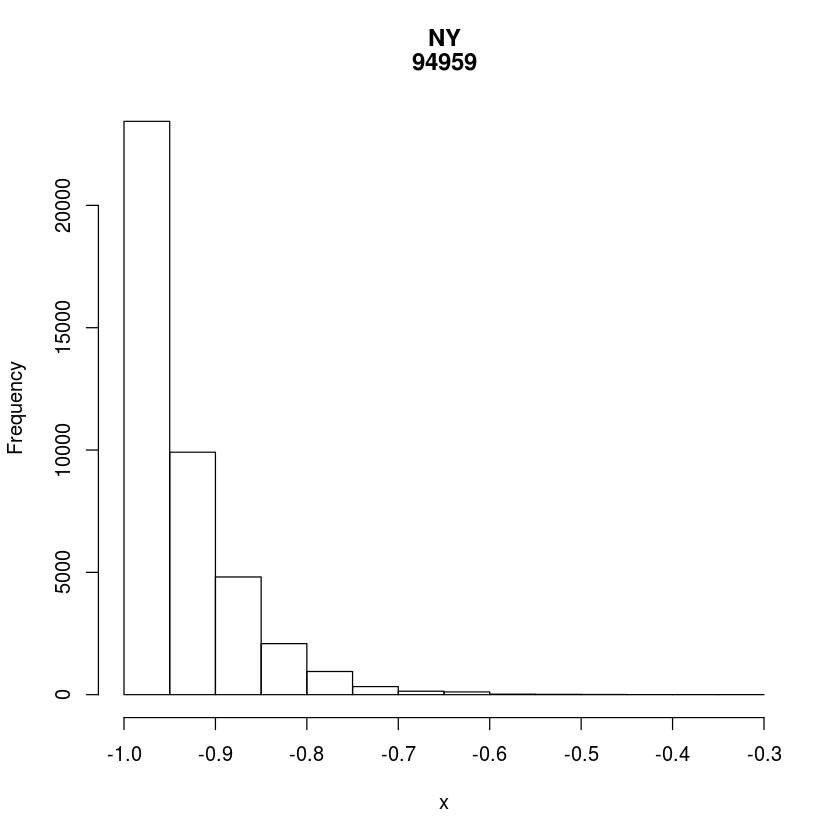

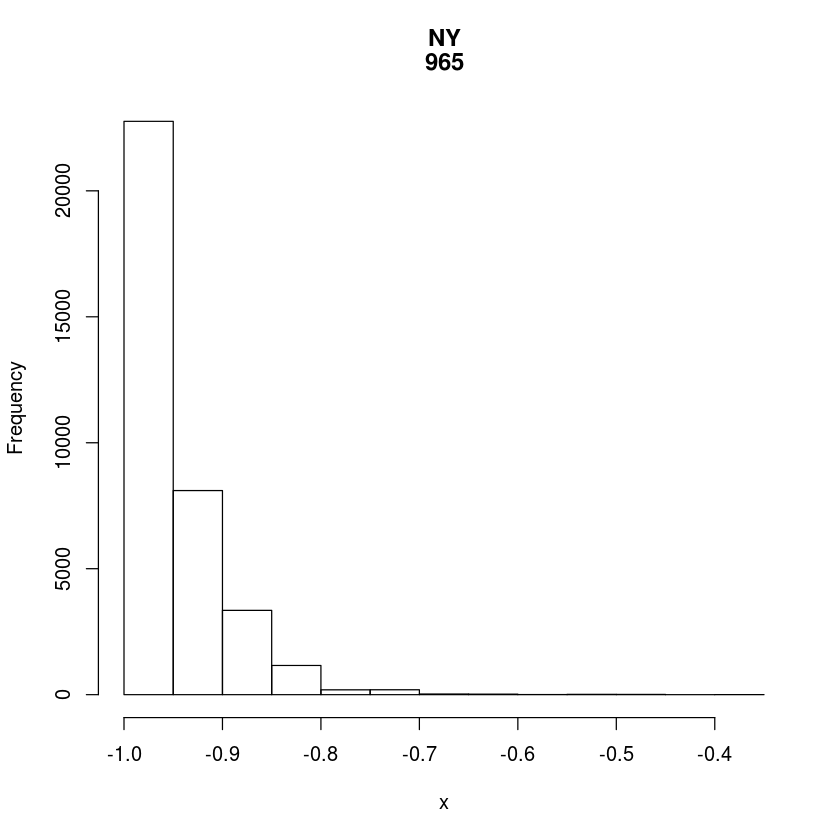

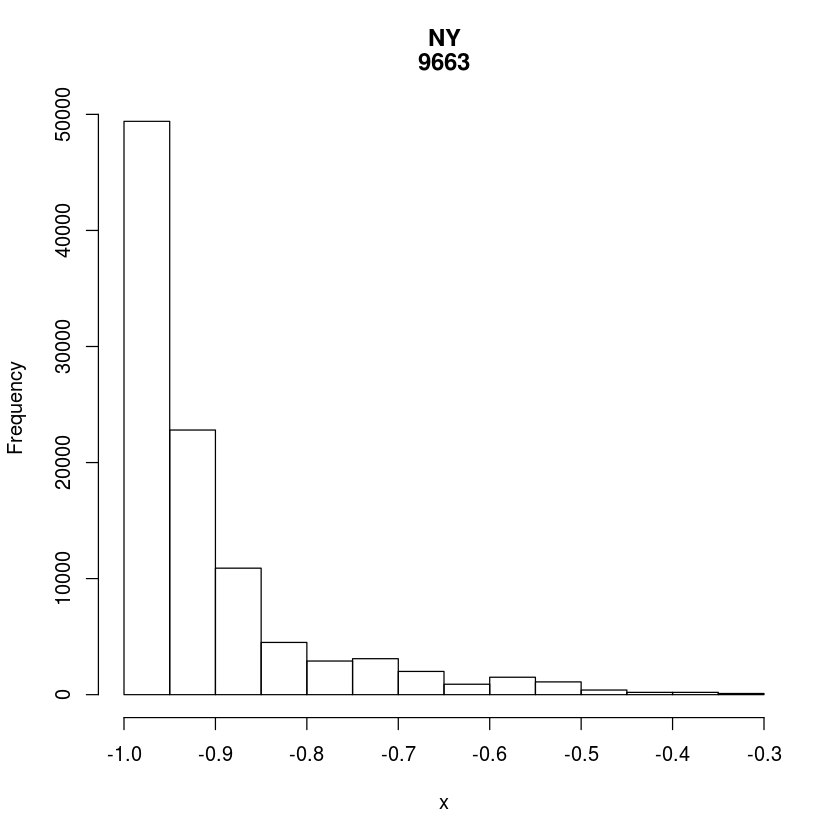

[,1]                                                                                                                                                                                                                                                      
breaks   -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0                                                                                                                                                     
counts   1, 0, 2, 5, 8, 9, 3, 39, 131, 591, 741, 904, 3039, 4434, 5872, 6774, 7723, 10254                                                                                                                                                                          
density  0.0002467308, 0.0000000000, 0.0004934616, 0.0012336541, 0.0019738465, 0.0022205774, 0.0007401925, 0.0096225019, 0.0323217370, 0.1458179127, 0.1828275352, 0.2230446583, 0.7498149519, 1.0940044412, 1.4488033555, 1.6713545522, 1.9055020972, 2.5299777942
mids     -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95                                                                                                                                        
xname    x                                                                                                                                                                                                                                                         
equidist TRUE                                                                                                                                                                                                                                                      
         [,2]                                                                                                                                                                                                                                                                                                                                          
breaks   -0.20, -0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00                                                                                                                                                                                      
counts   297, 3, 290, 297, 676, 287, 1051, 1143, 1994, 2384, 2314, 2387, 3040, 2578, 4739, 4461, 5845, 5685, 5103, 6346, 8223, 8288, 7452, 8104                                                                                                                                                                                                        
density  0.0715774760, 0.0007230048, 0.0698904648, 0.0715774760, 0.1629170834, 0.0691674600, 0.2532926844, 0.2754648318, 0.4805571957, 0.5745478207, 0.5576777086, 0.5752708256, 0.7326448721, 0.6213021317, 1.1421065950, 1.0751081495, 1.4086543676, 1.3700941111, 1.2298311784, 1.5293961705, 1.9817561787, 1.9974212829, 1.7959439430, 1.9530769880
mids     -0.175, -0.125, -0.075, -0.025, 0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925, 0.975                                                                                                                                                                    
xname    x                                                                                                                                                                                                                                                                                                                                             
equidist TRUE                                                                                                                

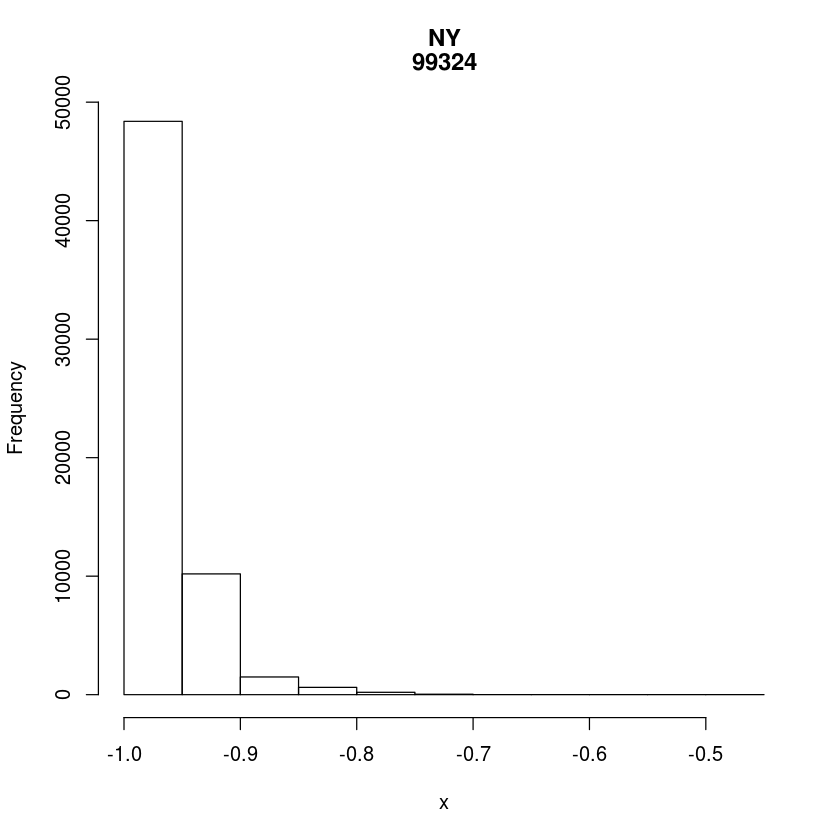

In [52]:
mapply(function(x, y) {
hist(x, main=c("NY", y[[1,4]]))}, sNY, tNY_f2s)


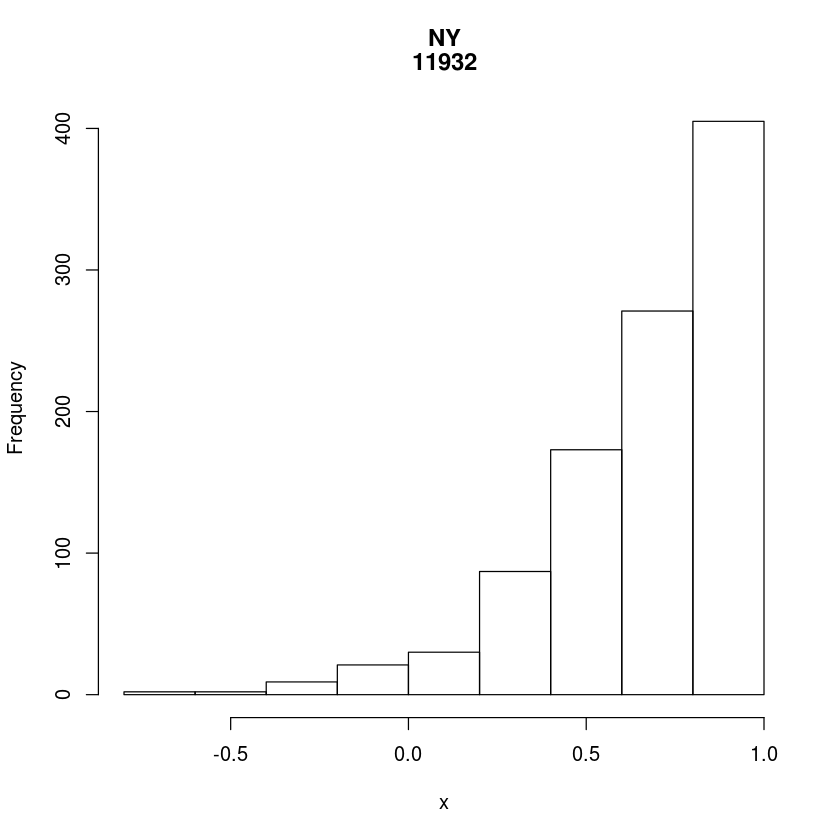

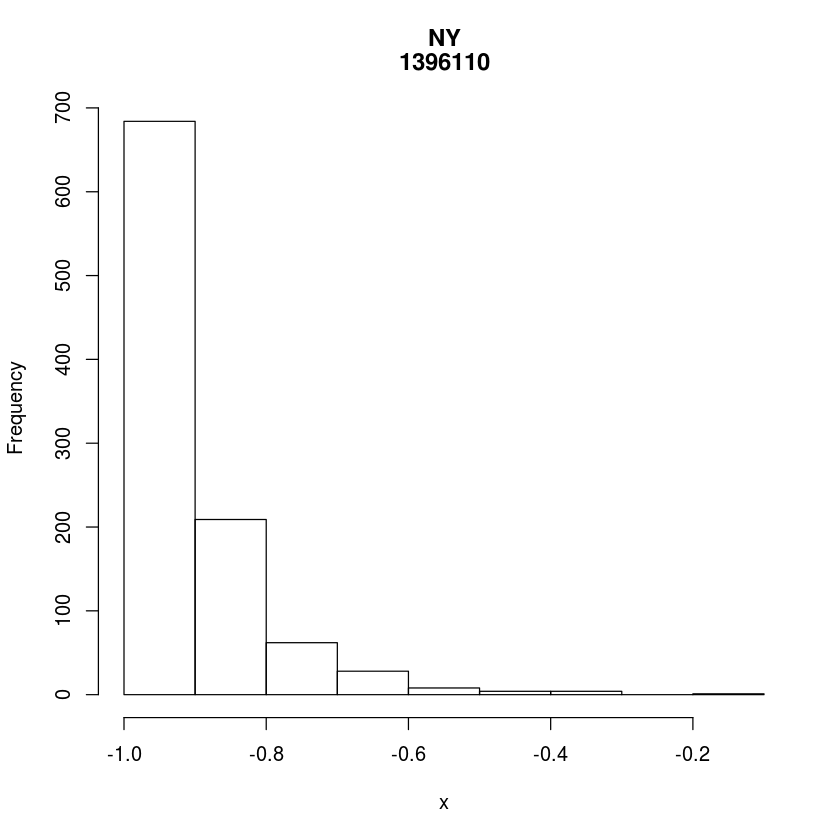

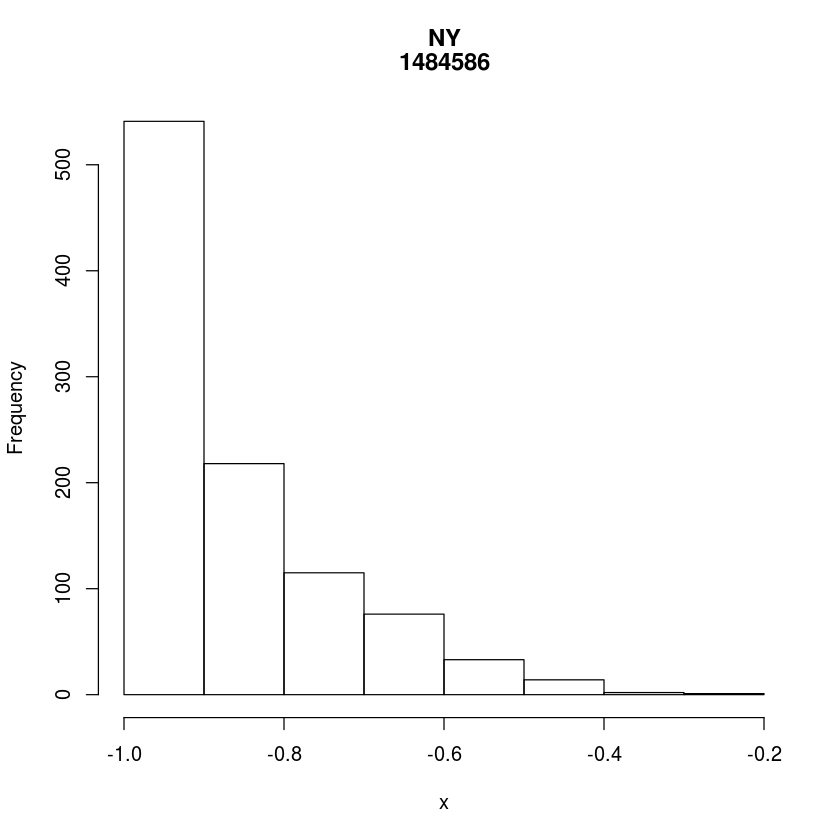

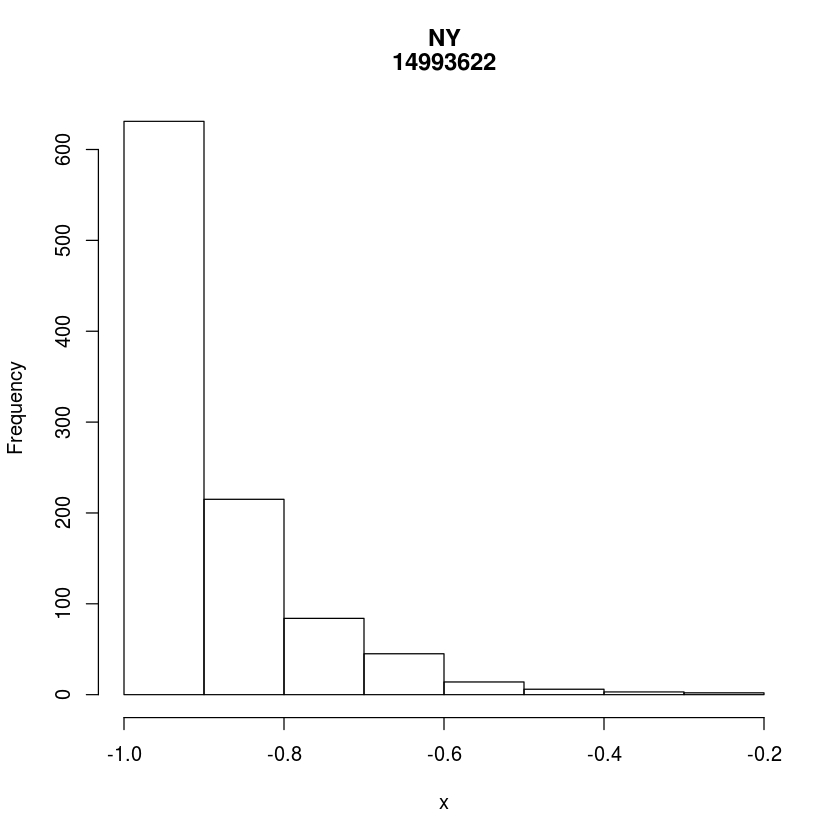

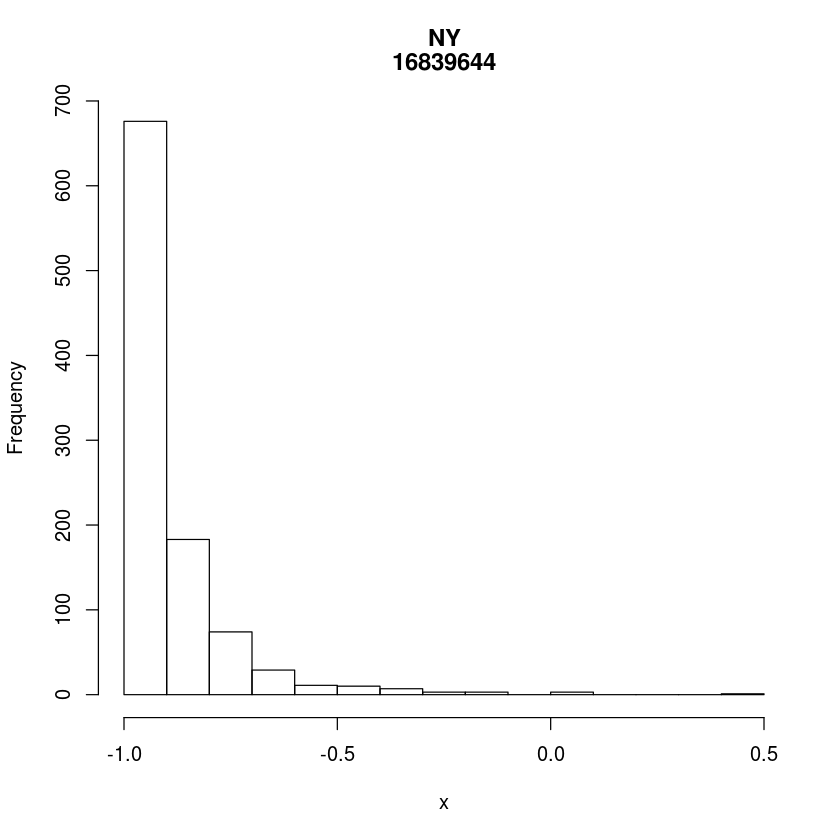

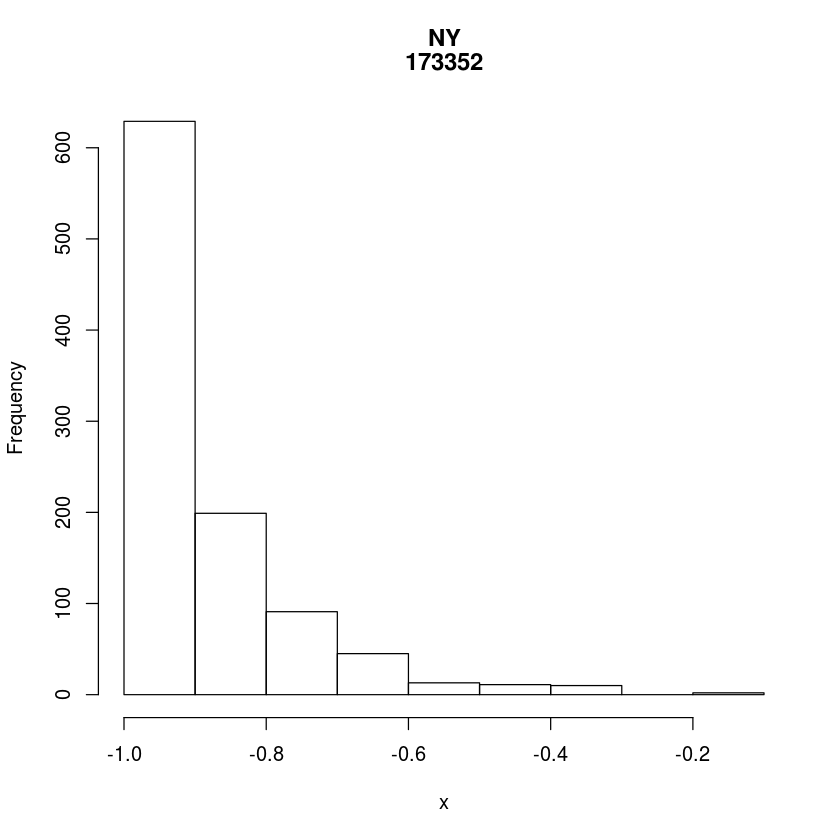

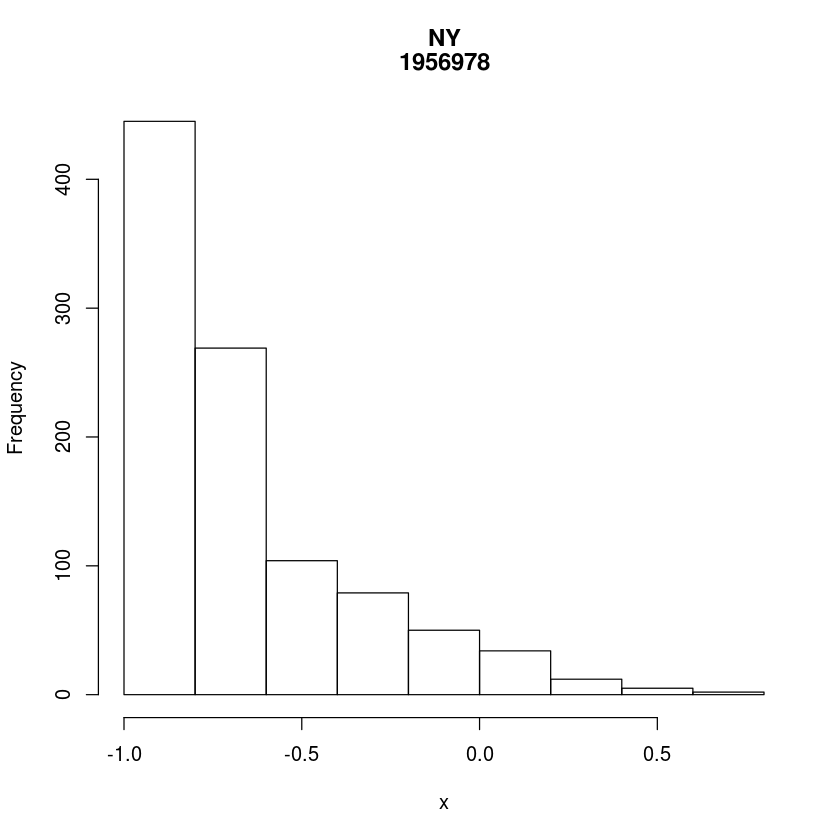

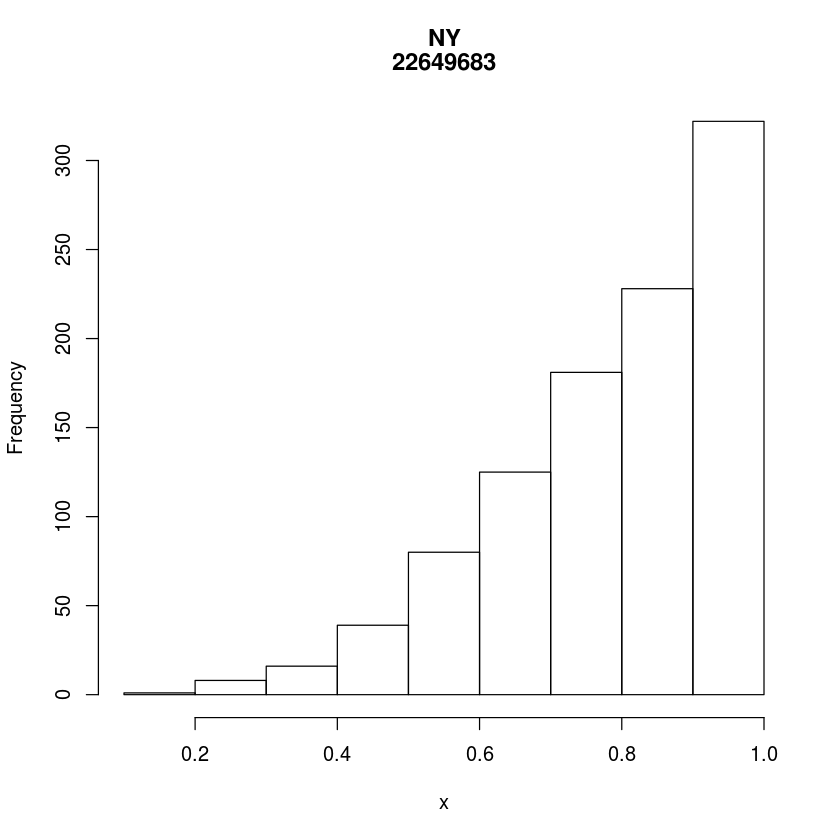

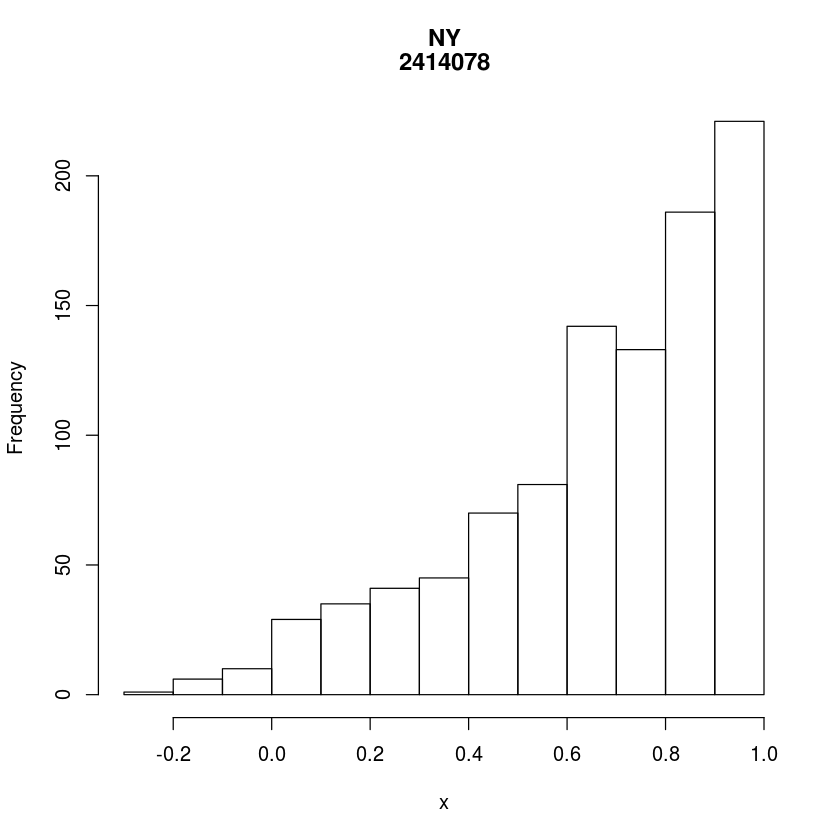

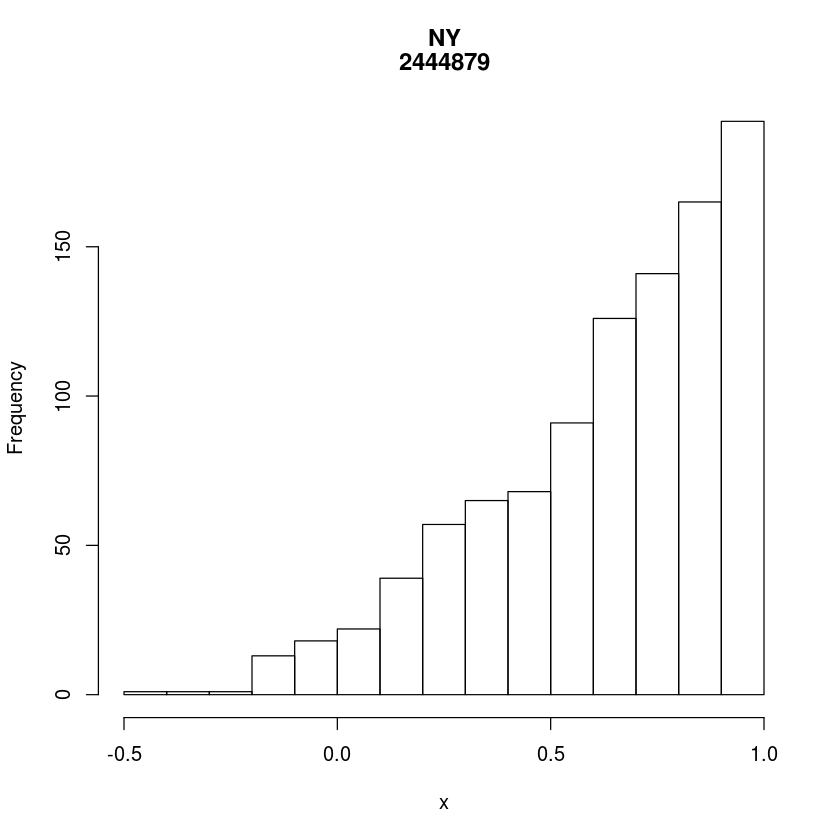

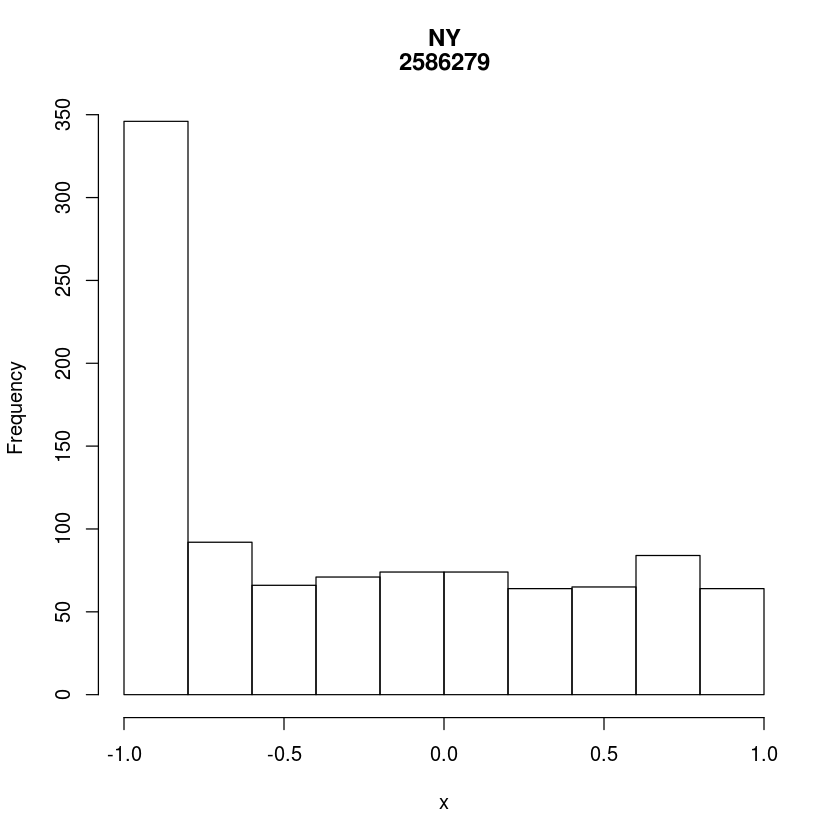

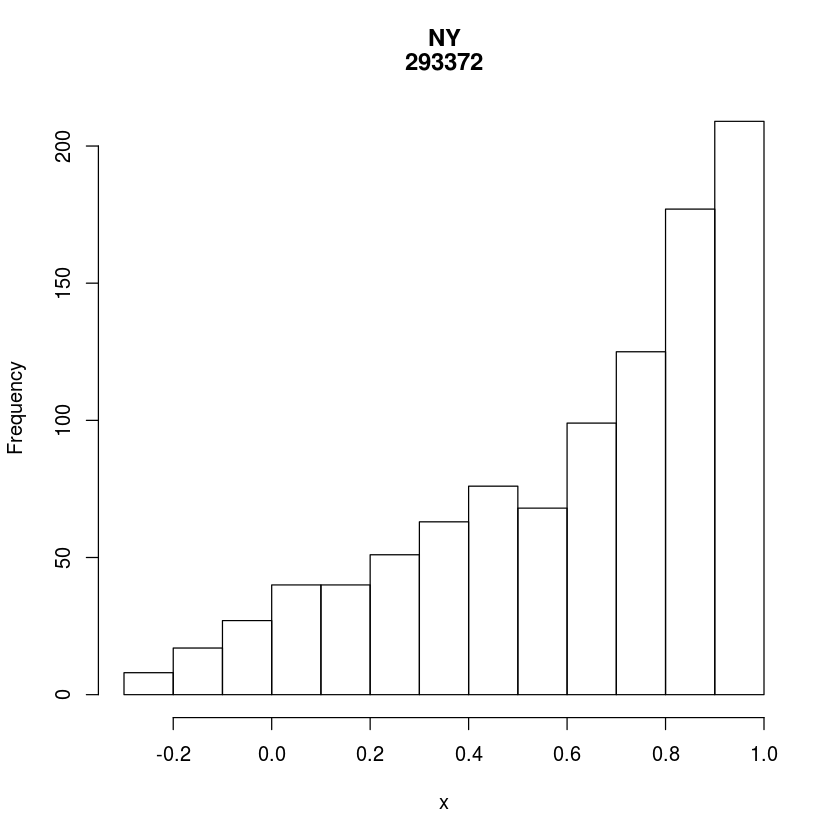

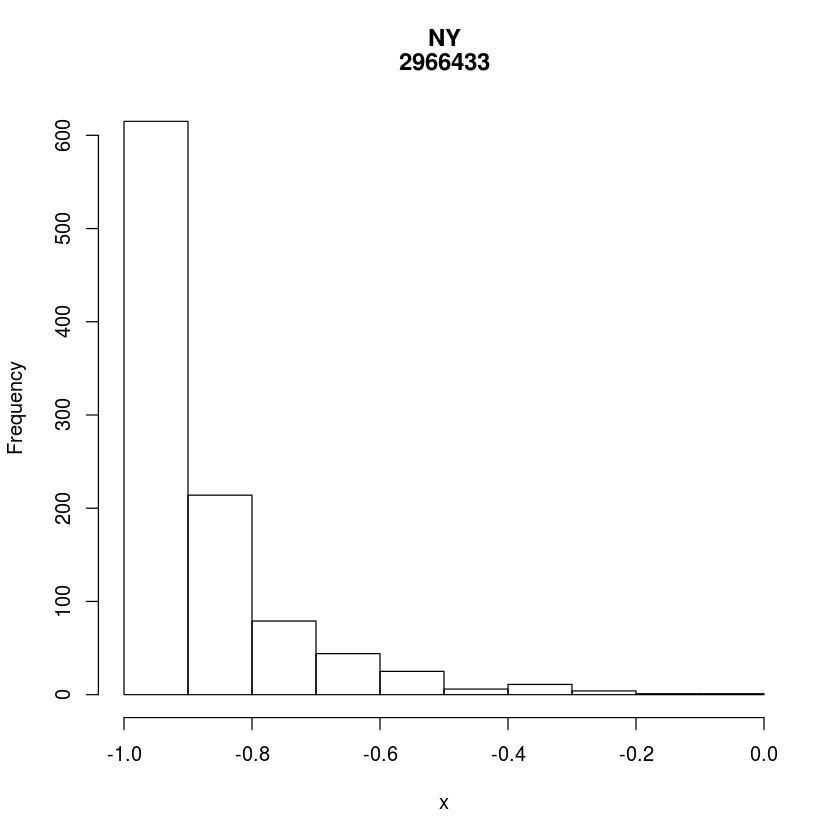

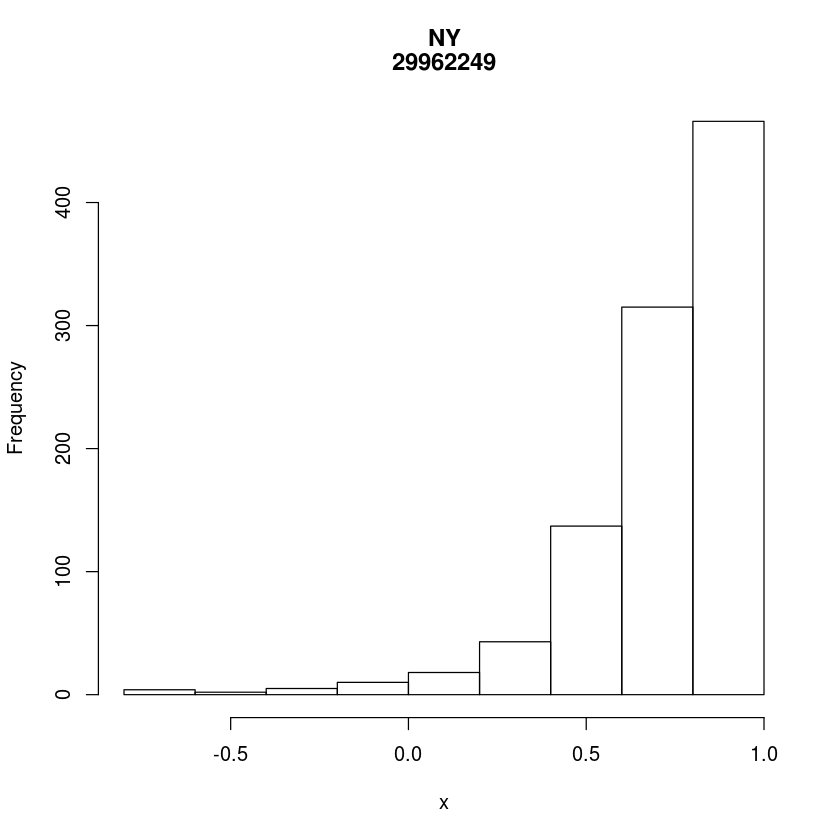

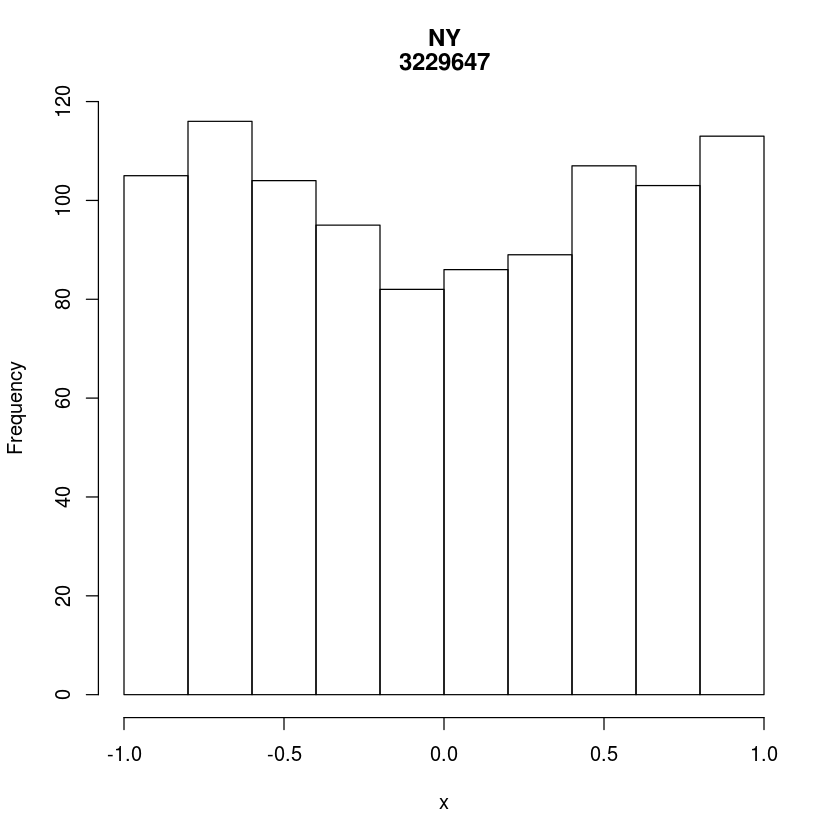

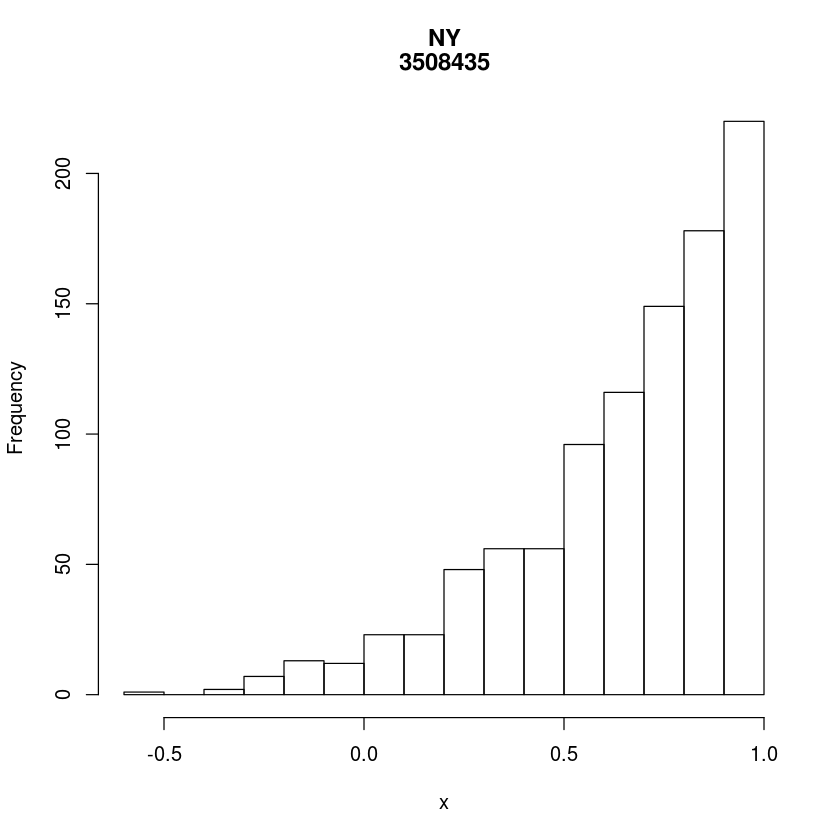

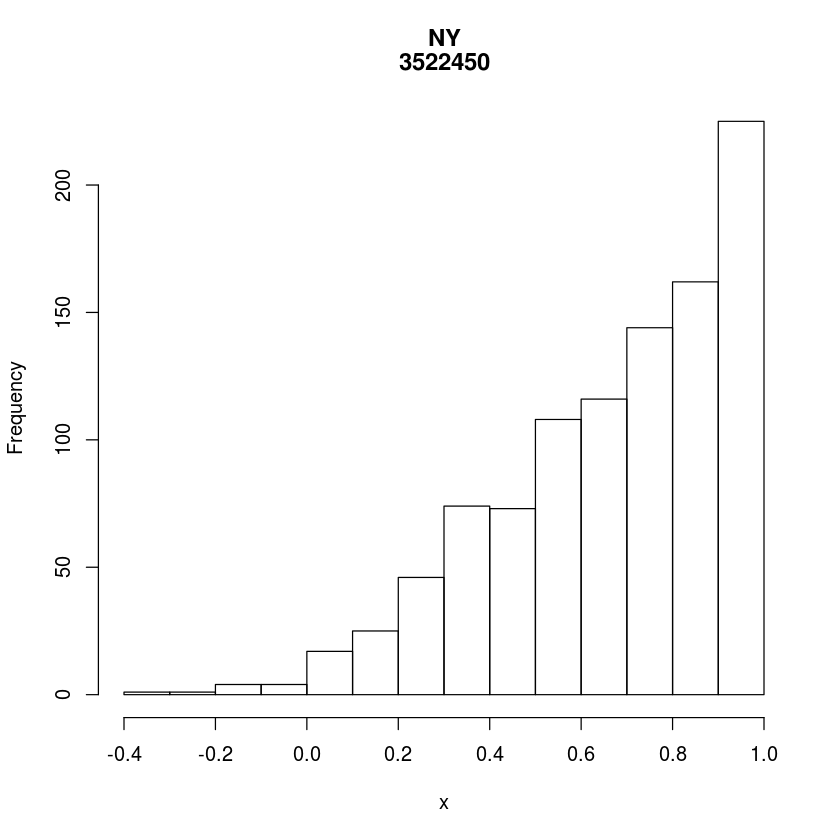

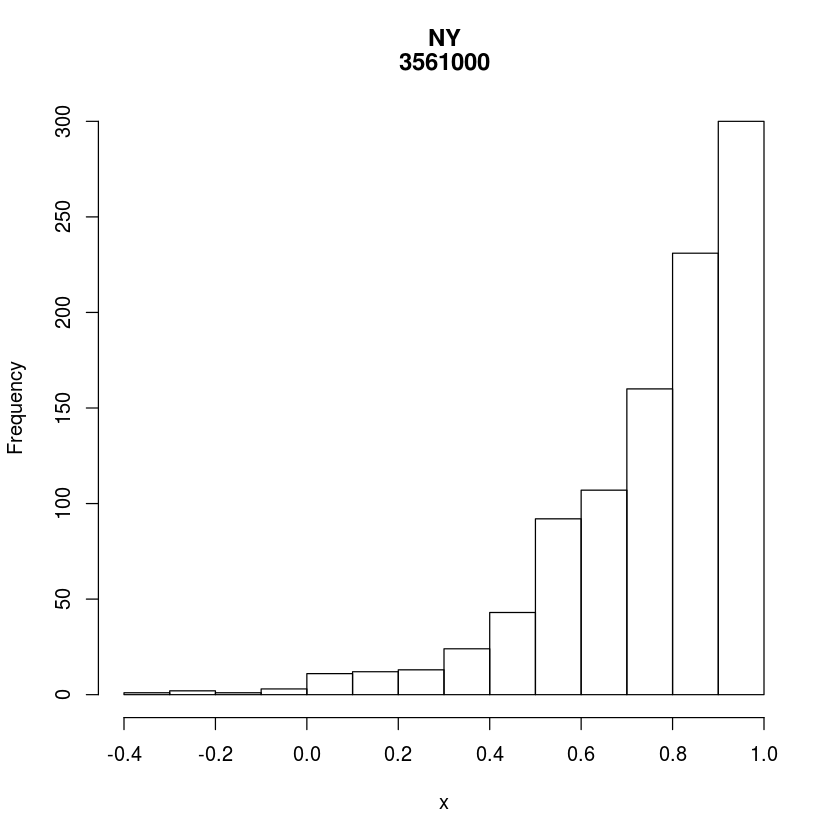

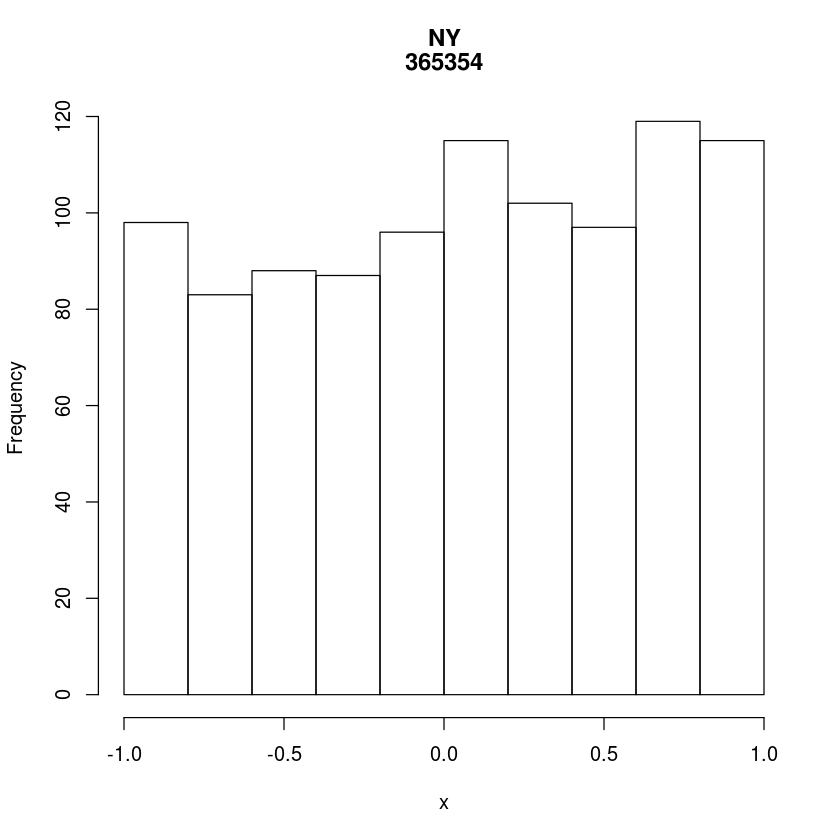

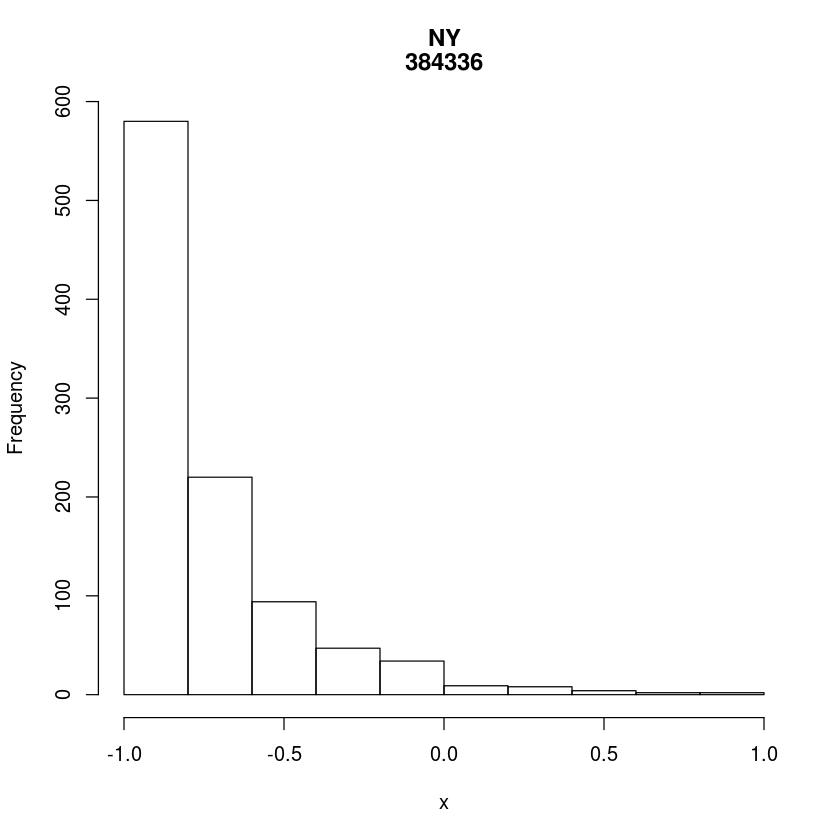

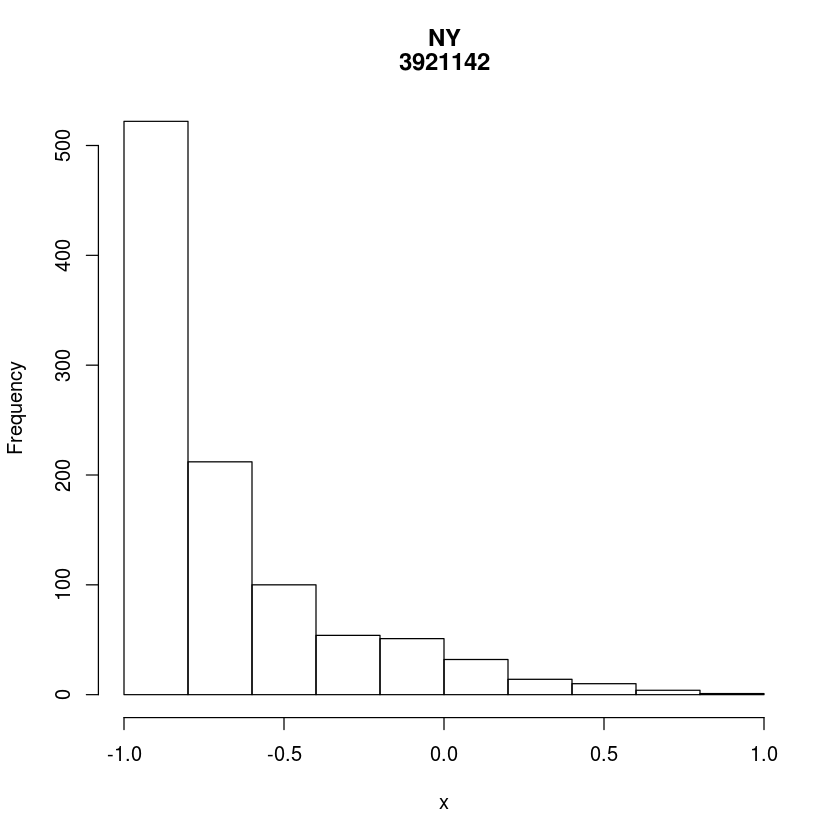

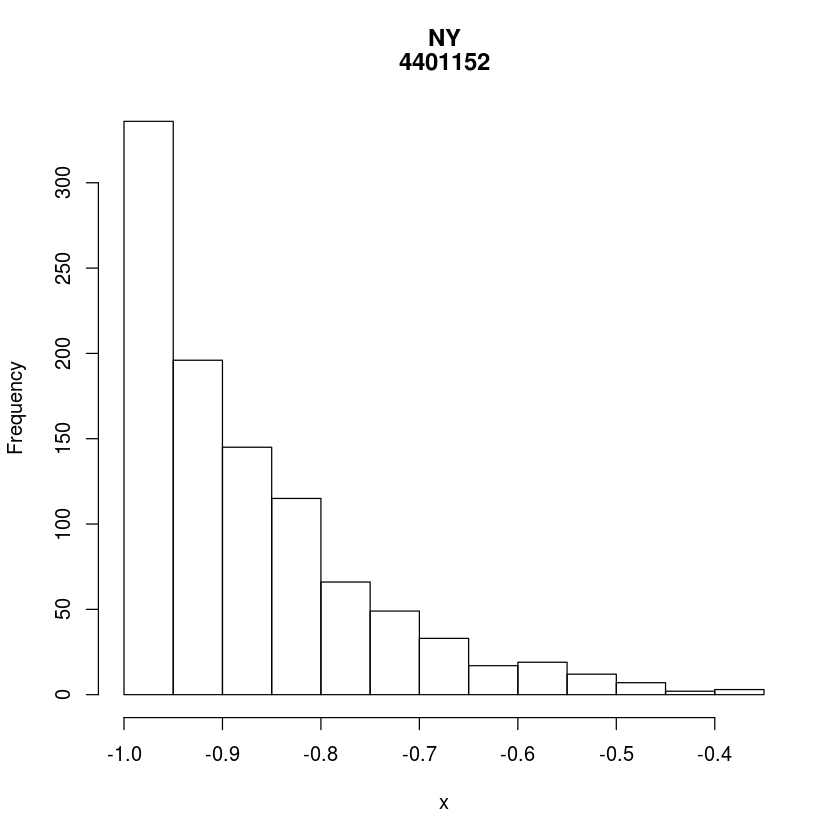

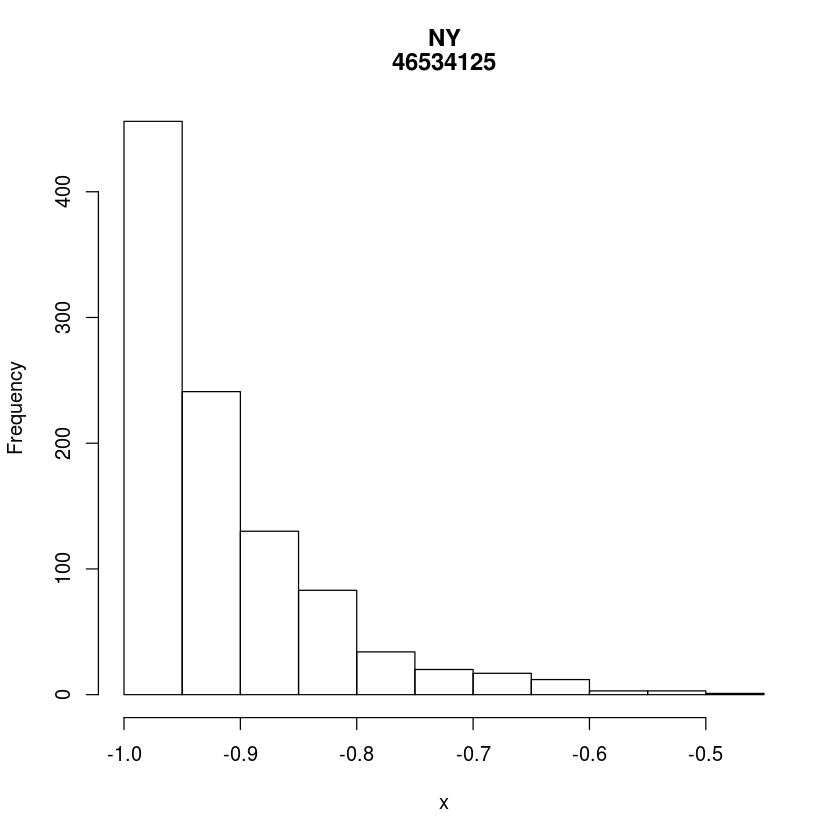

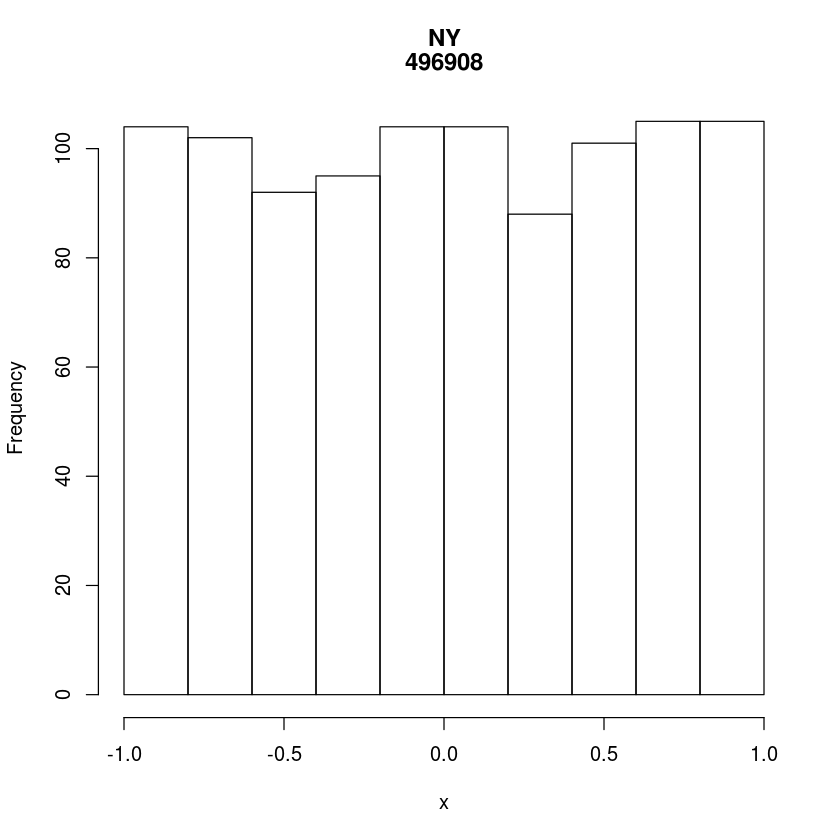

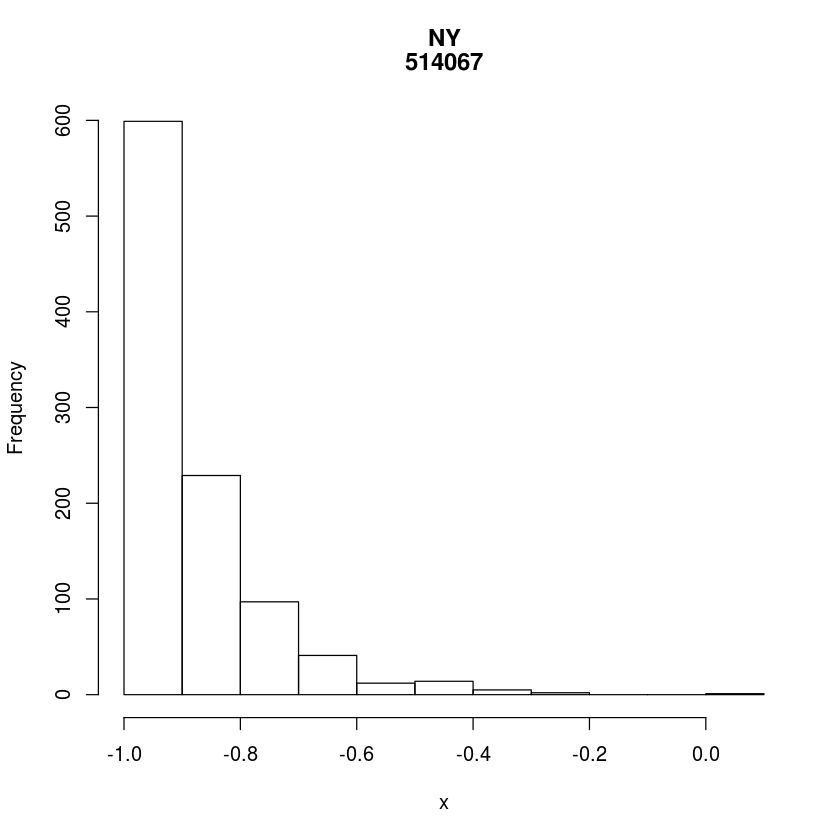

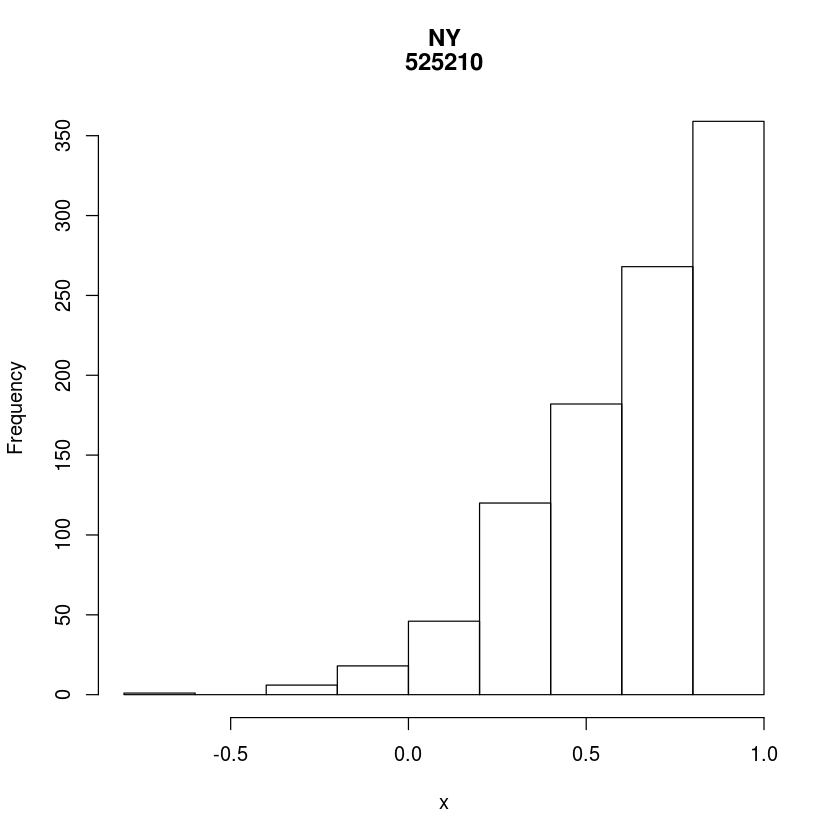

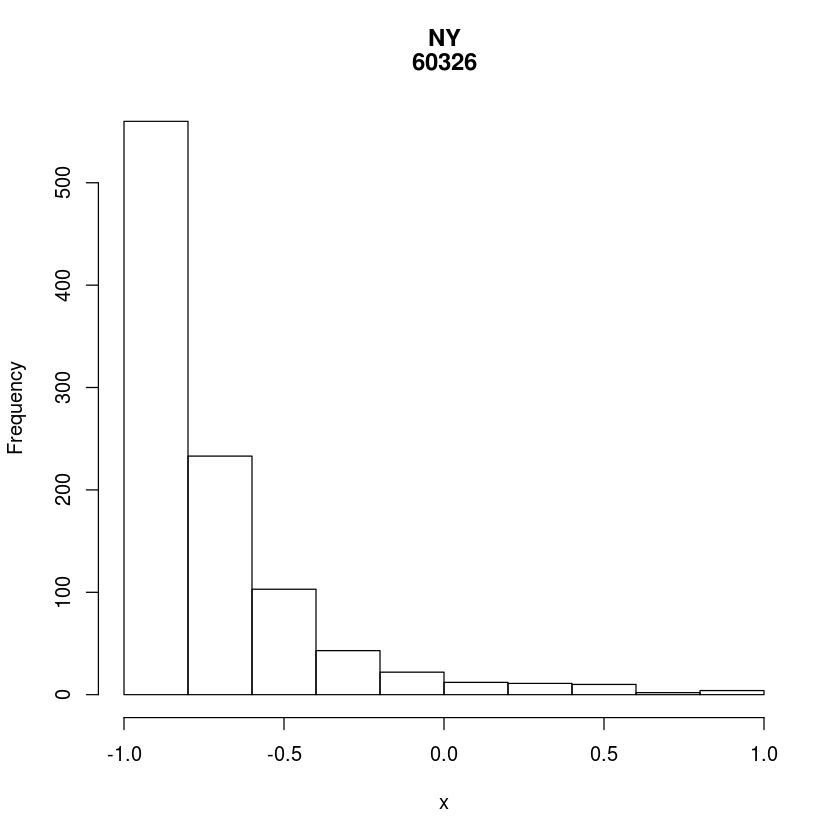

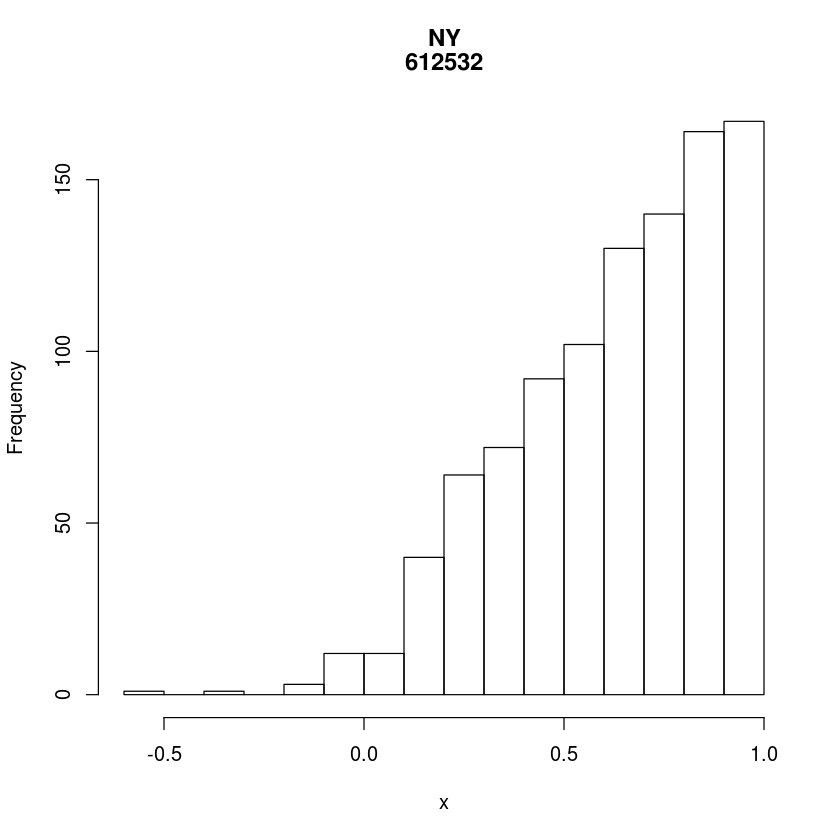

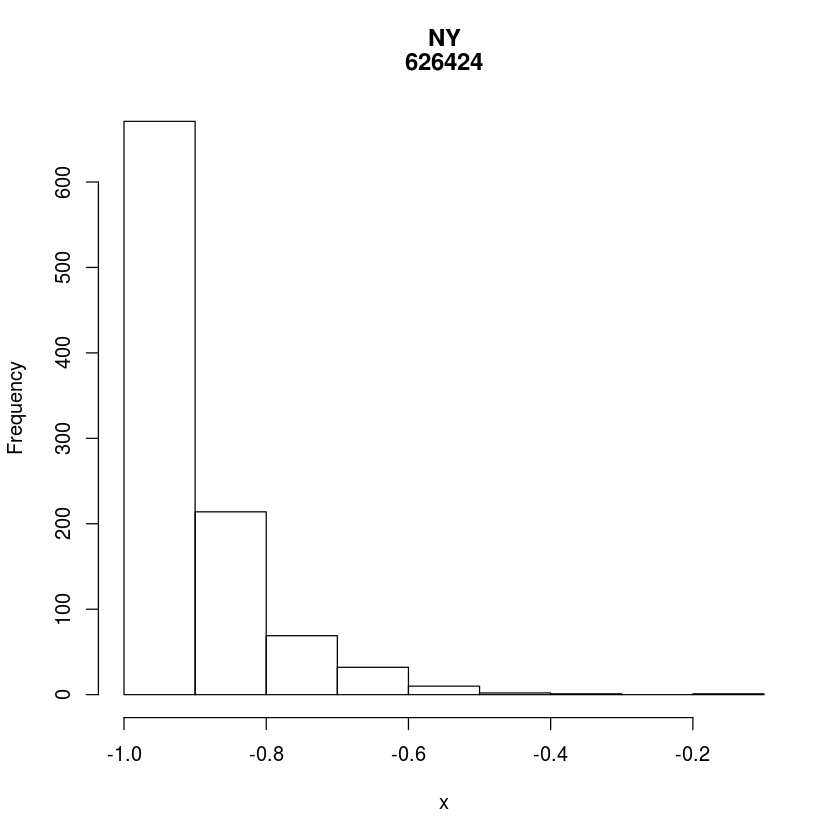

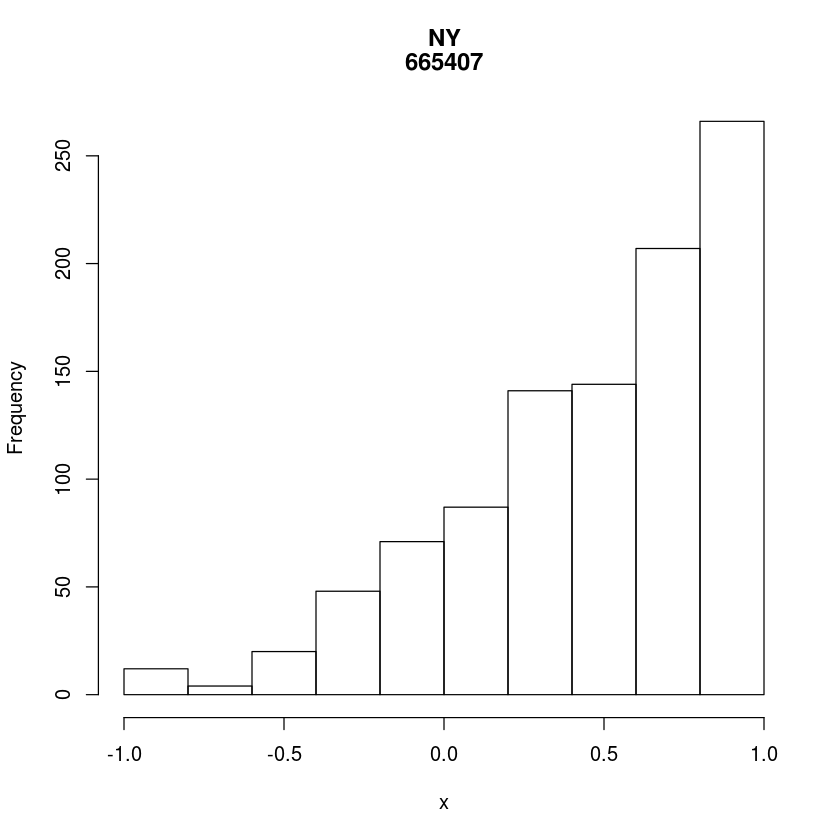

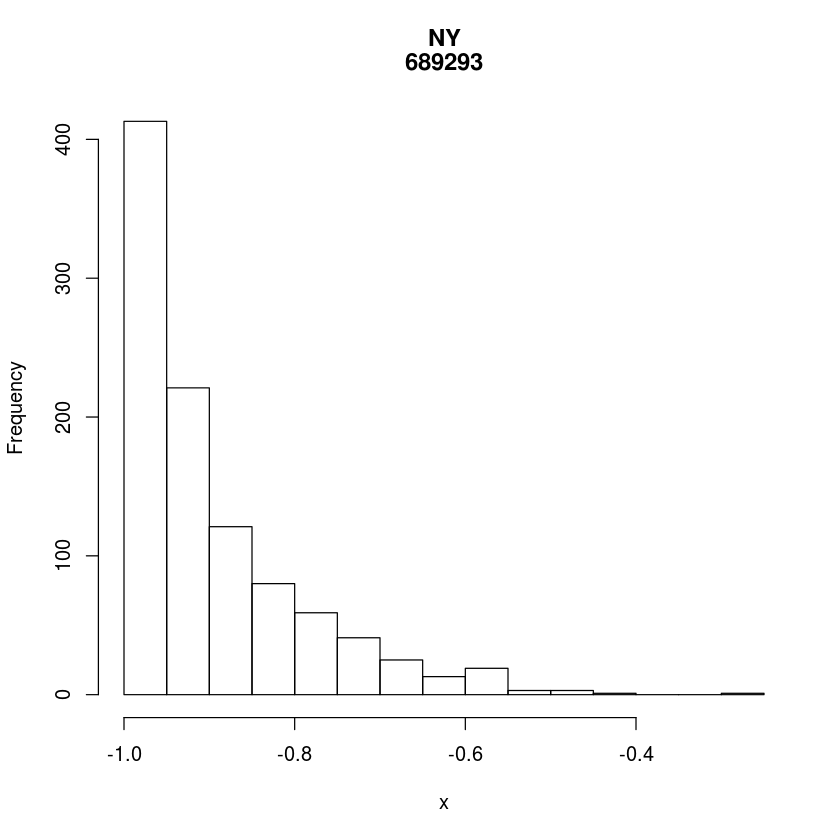

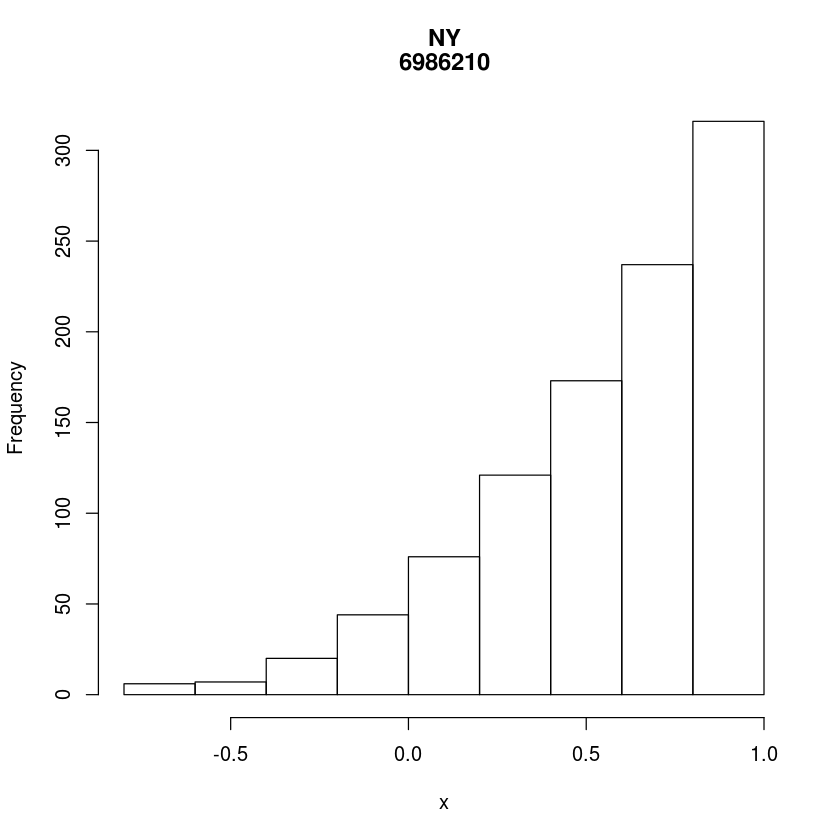

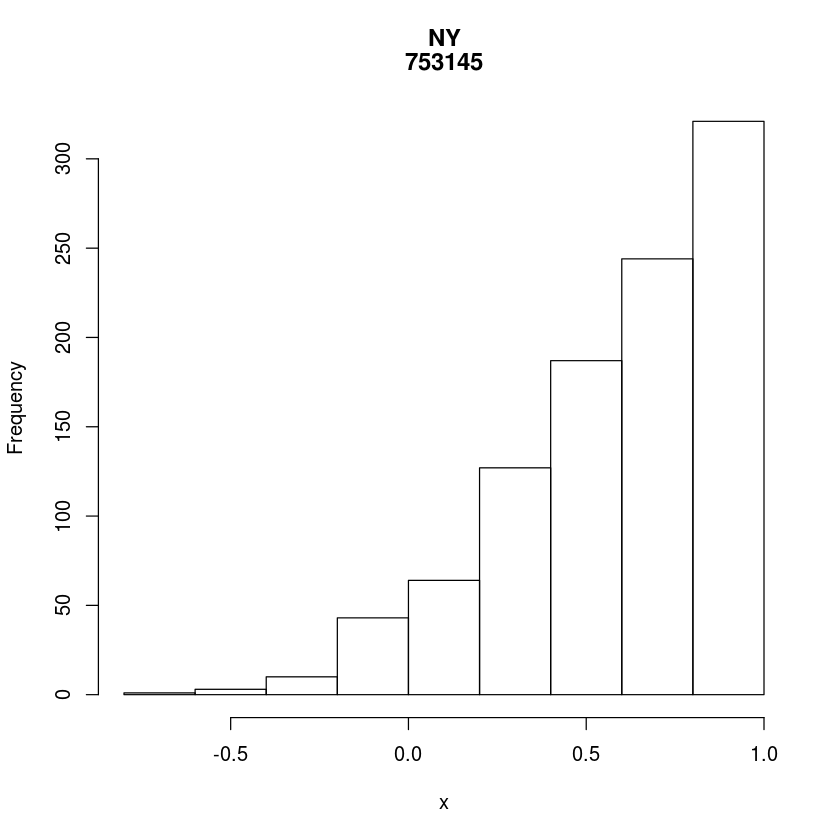

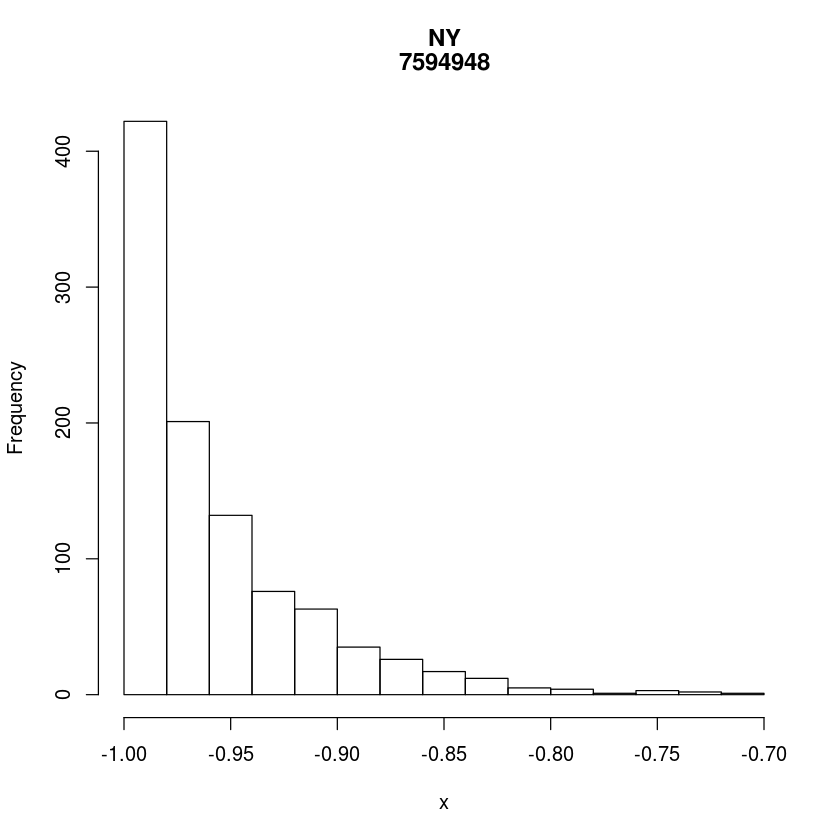

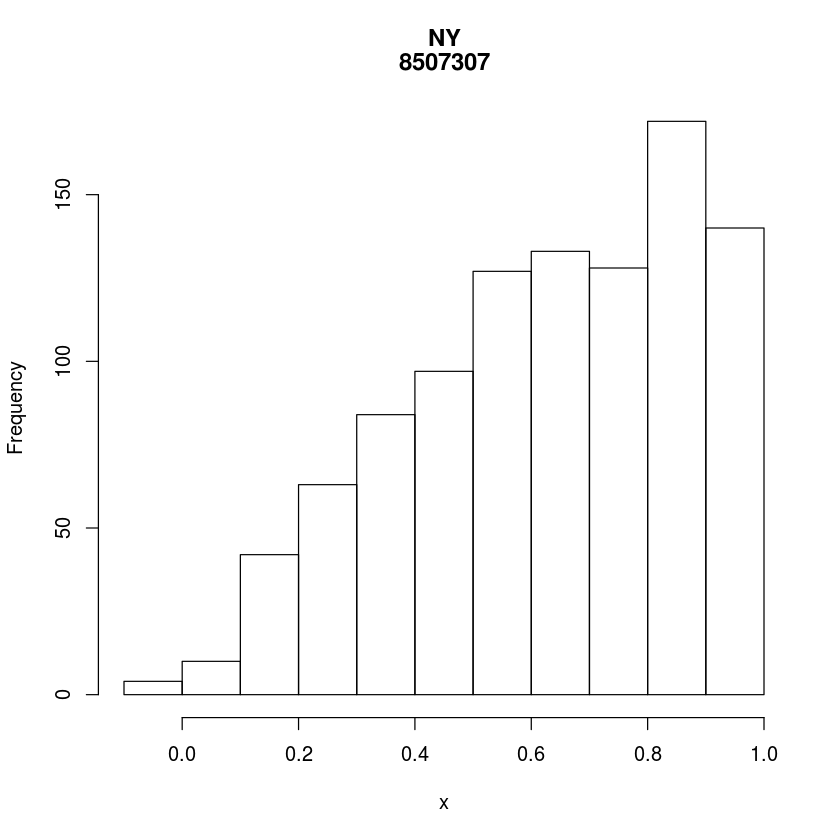

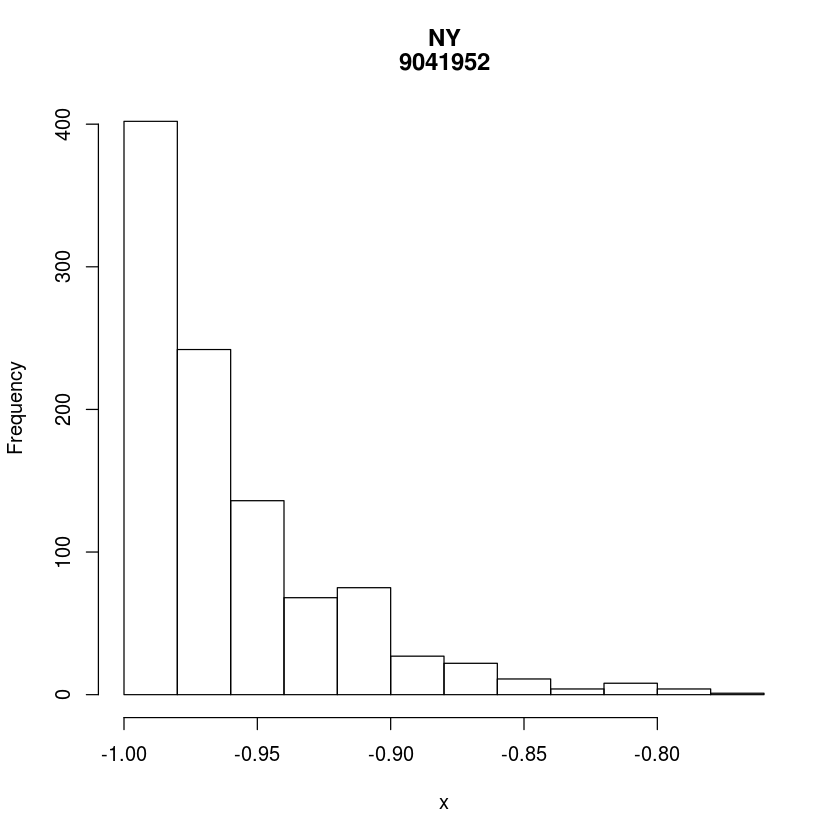

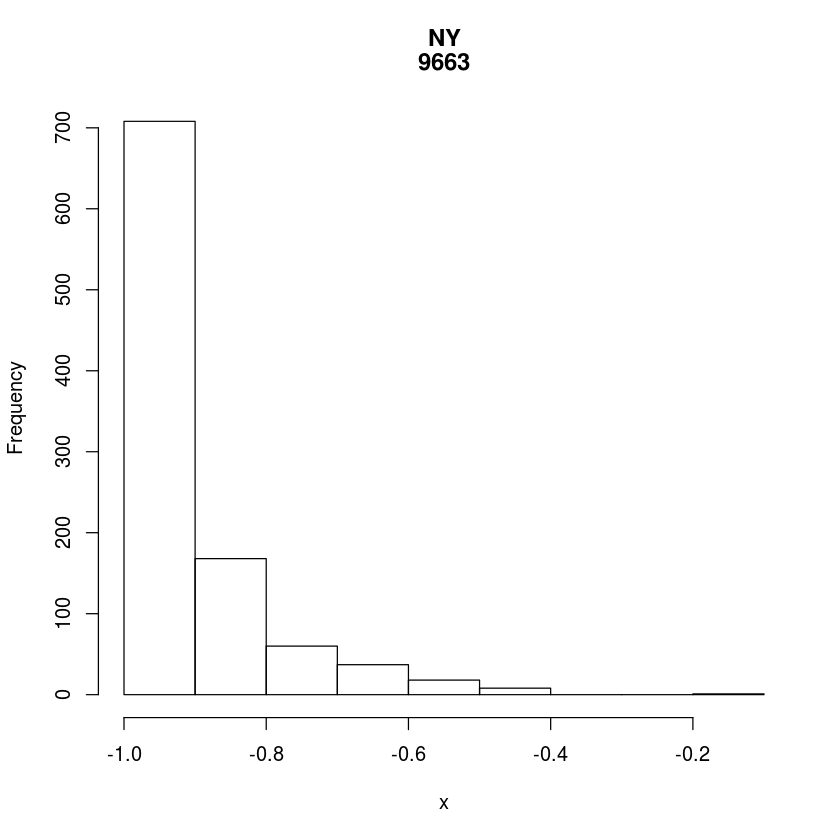

[,1]                                                         
breaks   -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0         
counts   2, 2, 9, 21, 30, 87, 173, 271, 405                           
density  0.010, 0.010, 0.045, 0.105, 0.150, 0.435, 0.865, 1.355, 2.025
mids     -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9              
xname    x                                                            
equidist TRUE                                                         
         [,2]                                                                    
breaks   -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0       
counts   2, 8, 15, 25, 45, 56, 86, 102, 152, 148, 184, 177                       
density  0.02, 0.08, 0.15, 0.25, 0.45, 0.56, 0.86, 1.02, 1.52, 1.48, 1.84, 1.77  
mids     -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95
xname    x                                                                       
equidist TRUE                                                                    
         [,3]                                                         
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1   
counts   684, 209, 62, 28, 8, 4, 4, 0, 1                              
density  6.84, 2.09, 0.62, 0.28, 0.08, 0.04, 0.04, 0.00, 0.01         
mids     -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15
xname    x                                                            
equidist TRUE                                                         
         [,4]                                                  
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2  
counts   541, 218, 115, 76, 33, 14, 2, 1                       
density  5.41, 2.18, 1.15, 0.76, 0.33, 0.14, 0.02, 0.01        
mids     -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25
xname    x                                                     
equidist TRUE                                                  
         [,5]                                                  
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2  
counts   631, 215, 84, 45, 14, 6, 3, 2                         
density  6.31, 2.15, 0.84, 0.45, 0.14, 0.06, 0.03, 0.02        
mids     -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25
xname    x                                                     
equidist TRUE                                                  
         [,6]                                                             
breaks   -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0      
counts   1, 1, 8, 11, 33, 54, 70, 116, 191, 211, 304                      
density  0.01, 0.01, 0.08, 0.11, 0.33, 0.54, 0.70, 1.16, 1.91, 2.11, 3.04 
mids     -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95
xname    x                                                                
equidist TRUE                                                             
         [,7]                                                                                              
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5          
counts   676, 183, 74, 29, 11, 10, 7, 3, 3, 0, 3, 0, 0, 0, 1                                               
density  6.76, 1.83, 0.74, 0.29, 0.11, 0.10, 0.07, 0.03, 0.03, 0.00, 0.03, 0.00, 0.00, 0.00, 0.01          
mids     -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45
xname    x                                                                                                 
equidist TRUE                                                                                              
         [,8]                                                         
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1   
counts   629, 199, 91, 45, 13, 11, 10, 0, 2                           
density  6.29, 1.99, 0.91, 0.45, 0.13, 0.11, 0.10, 

In [193]:
mapply(function(x, y) {
hist(x, main=c("NY", y[[1,4]]))}, sNY, tNY_f2s)


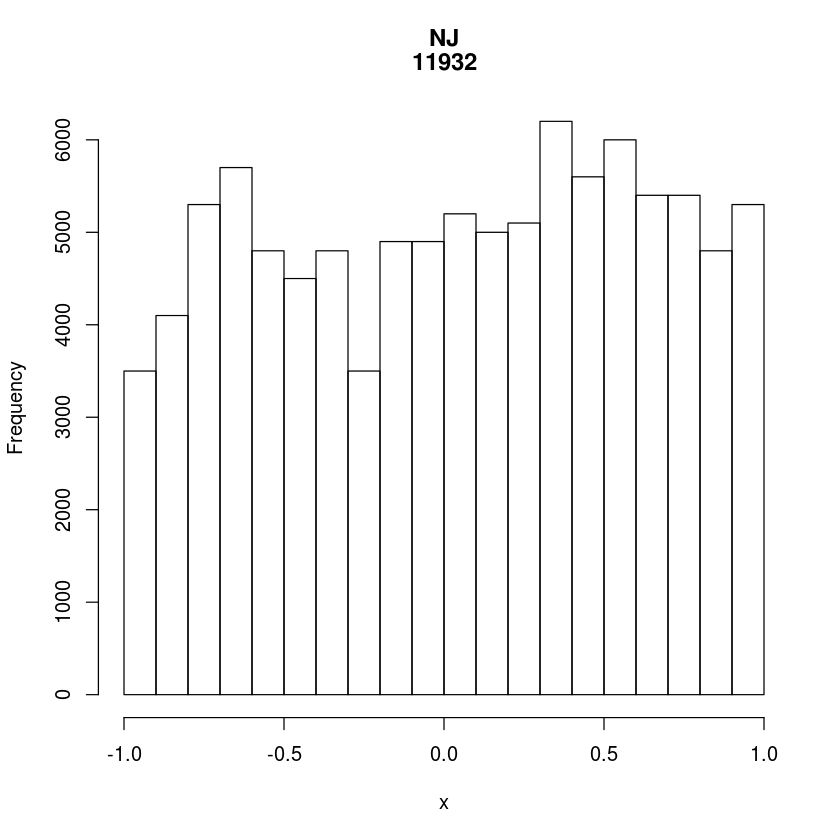

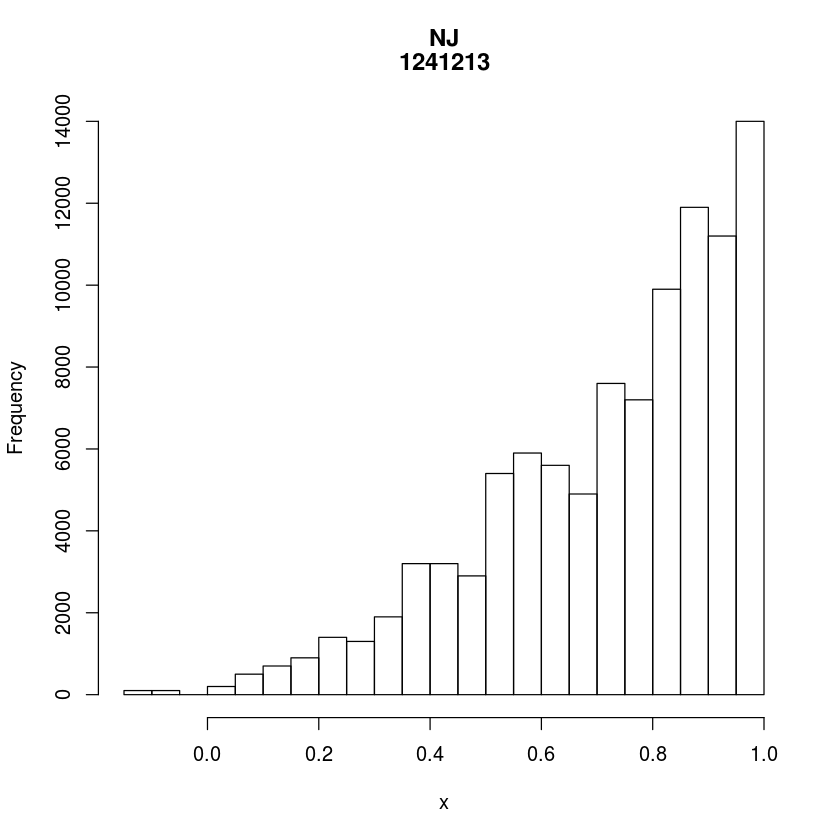

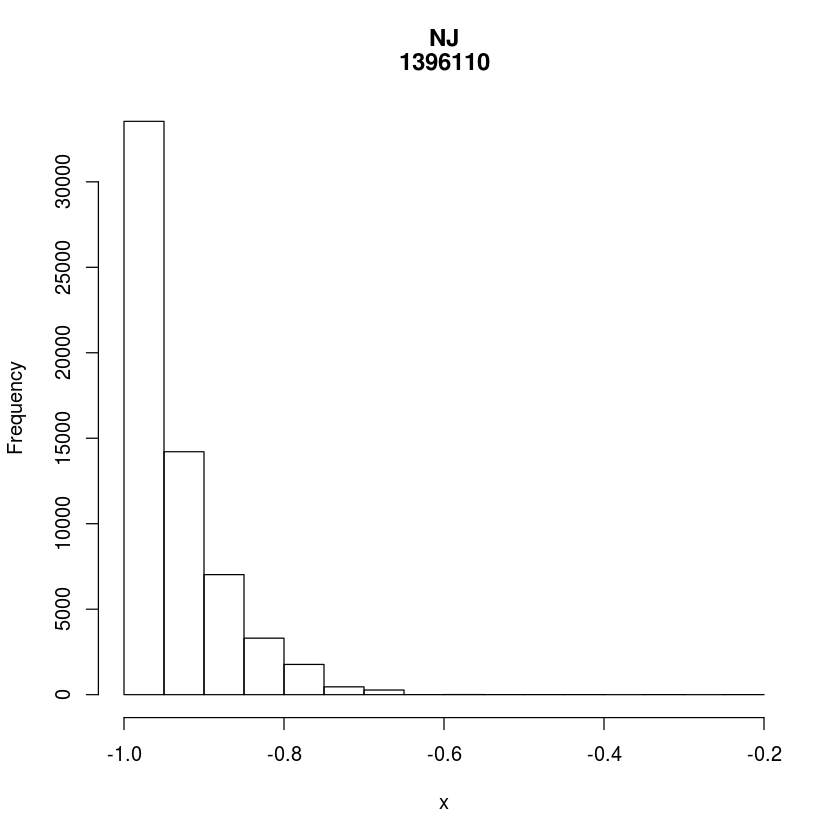

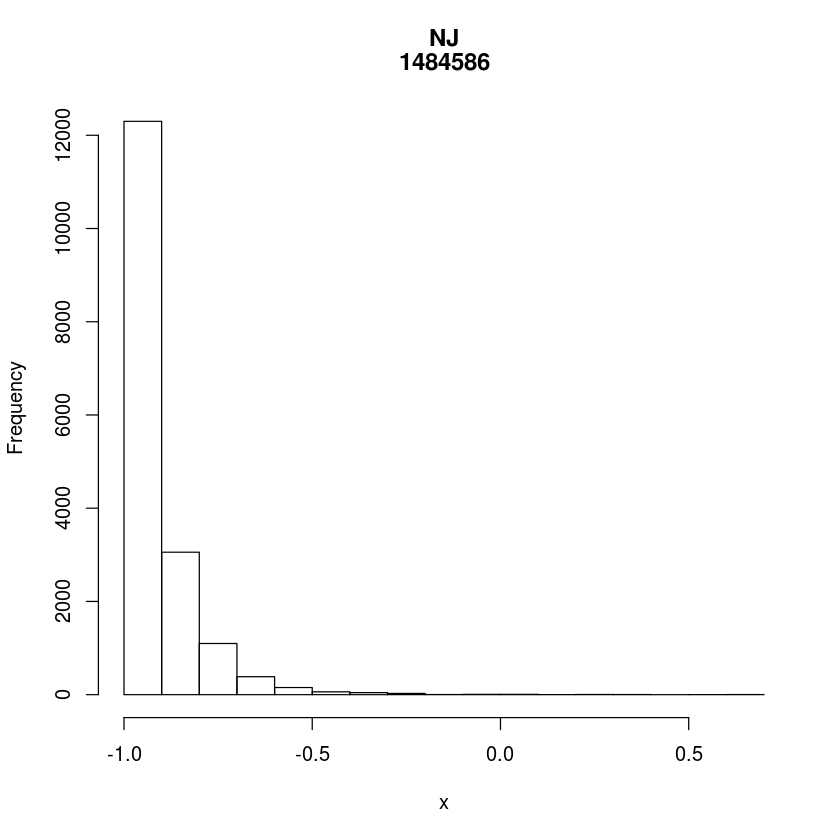

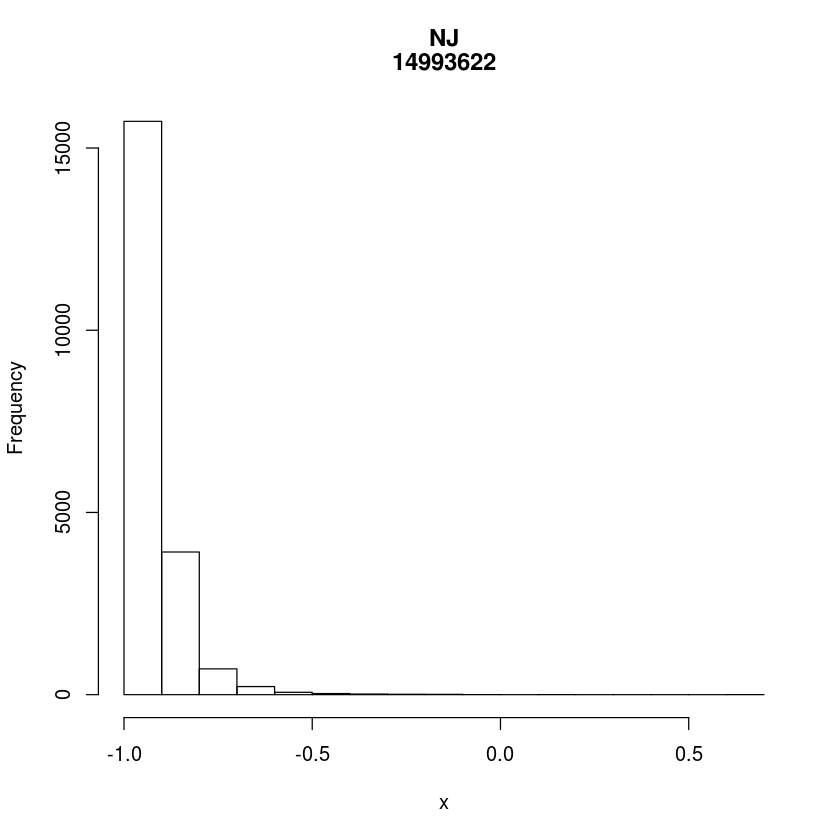

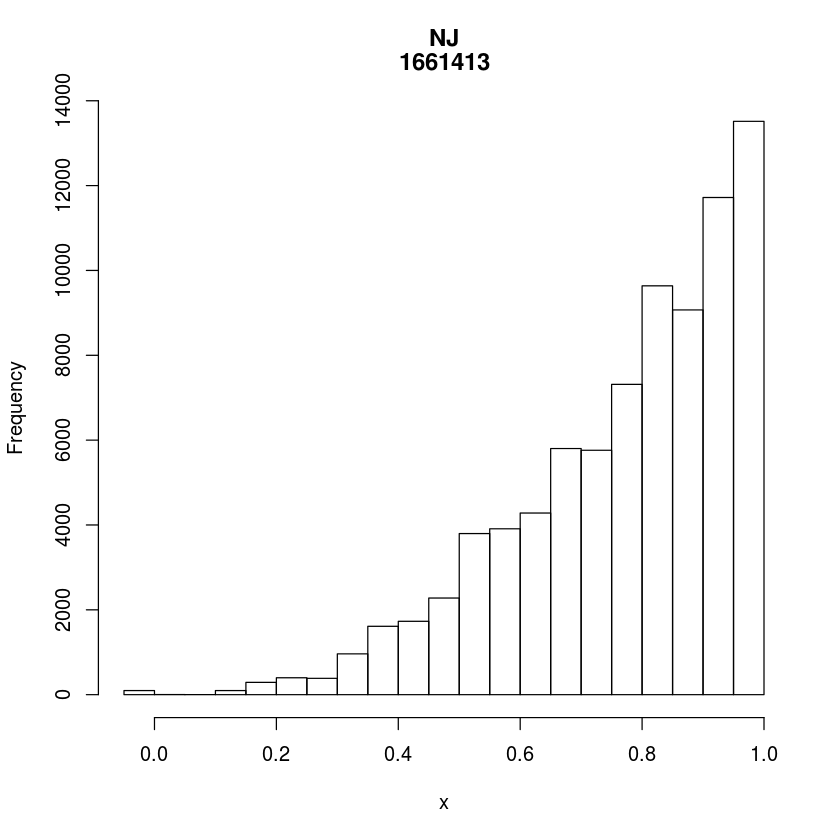

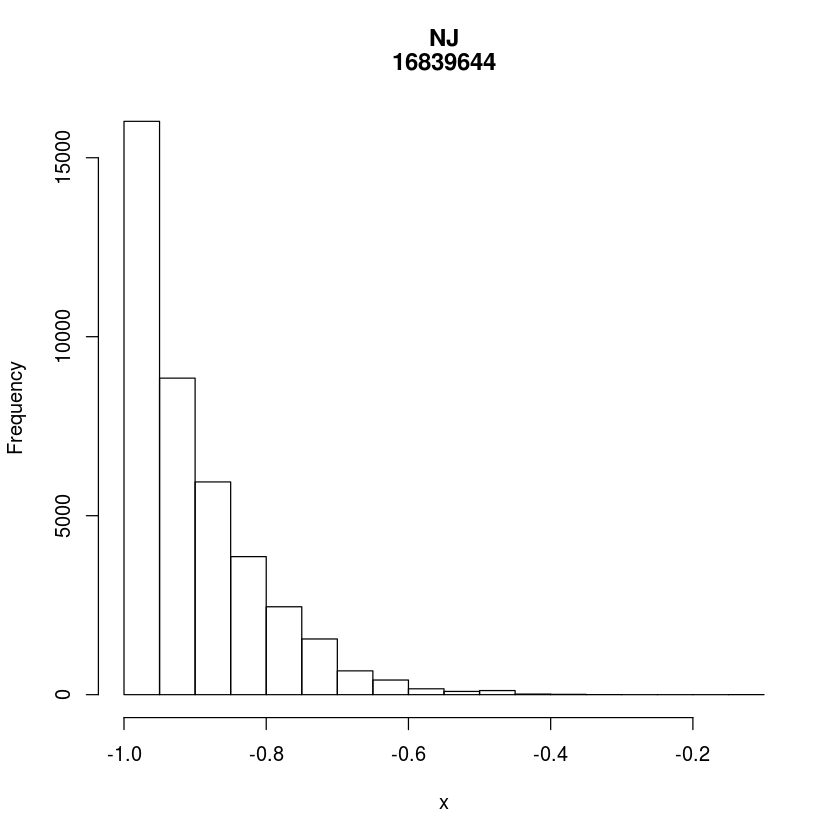

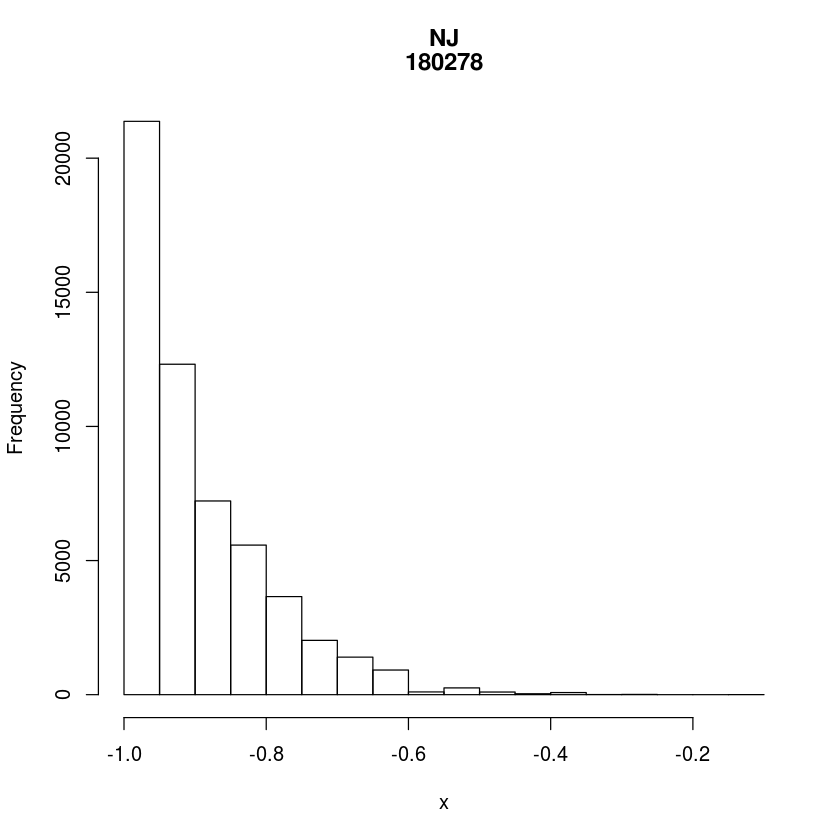

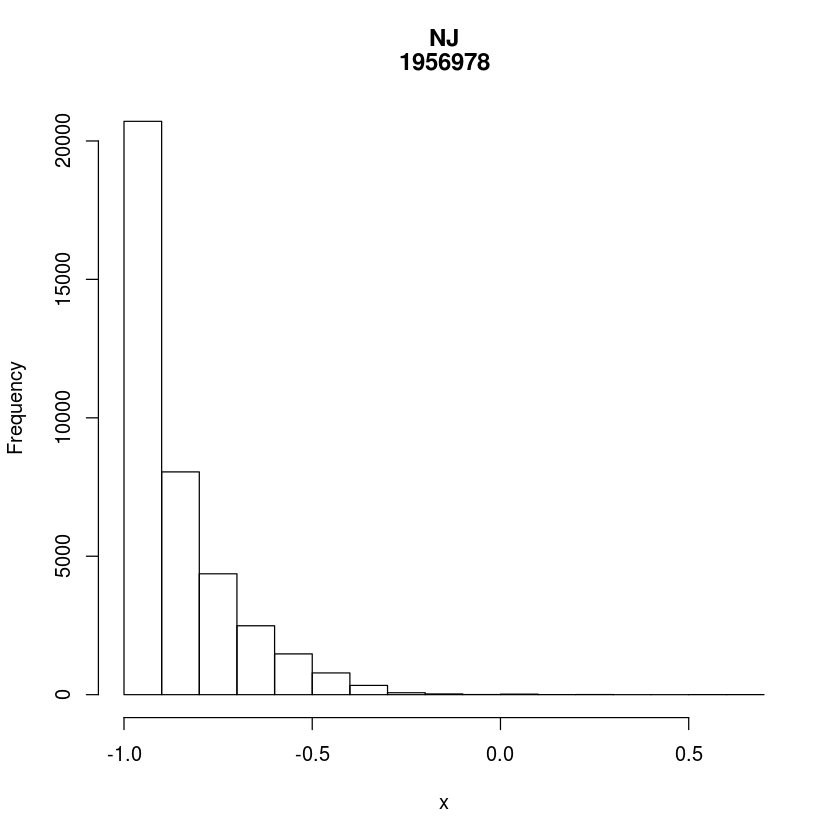

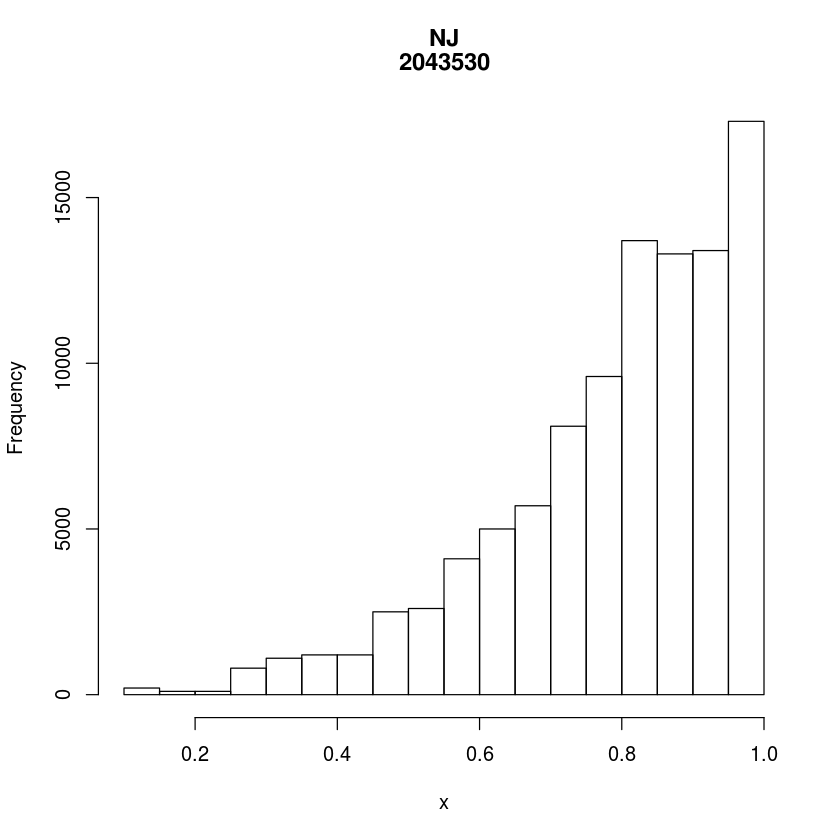

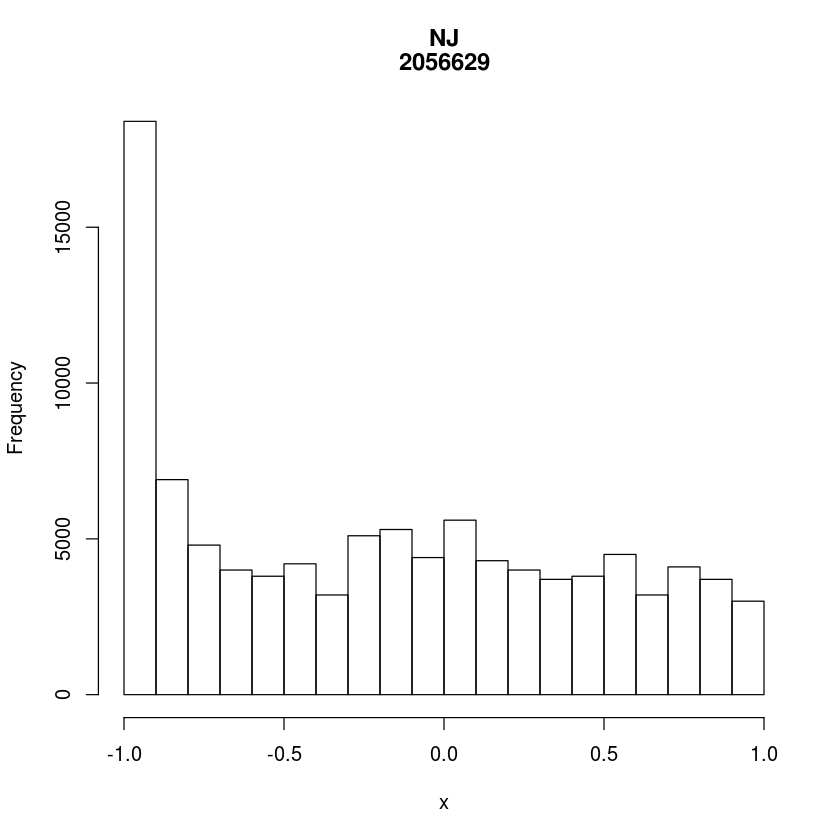

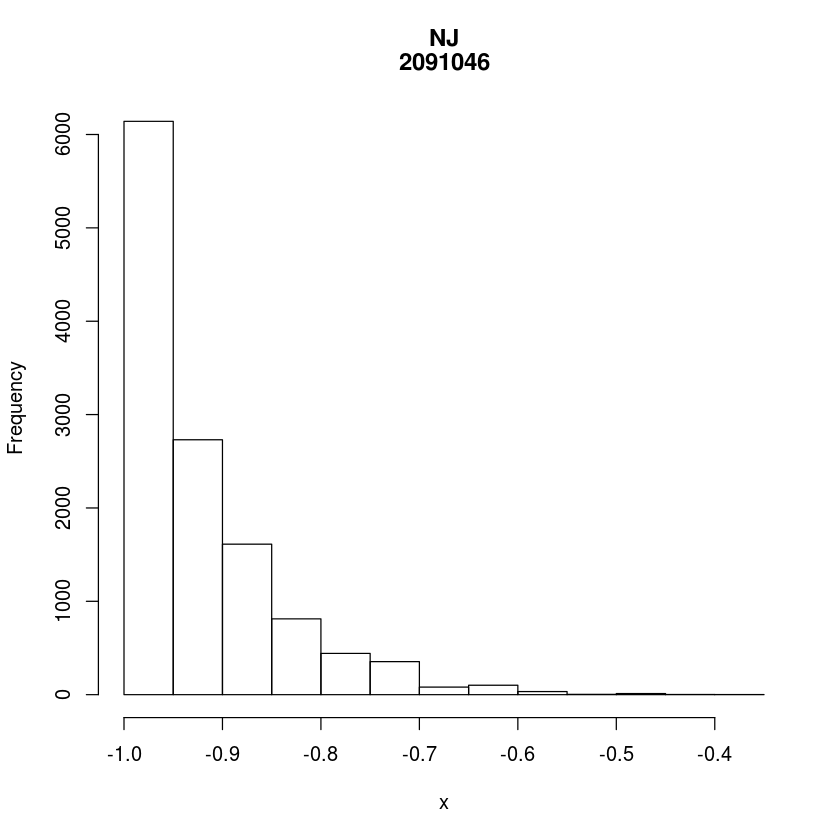

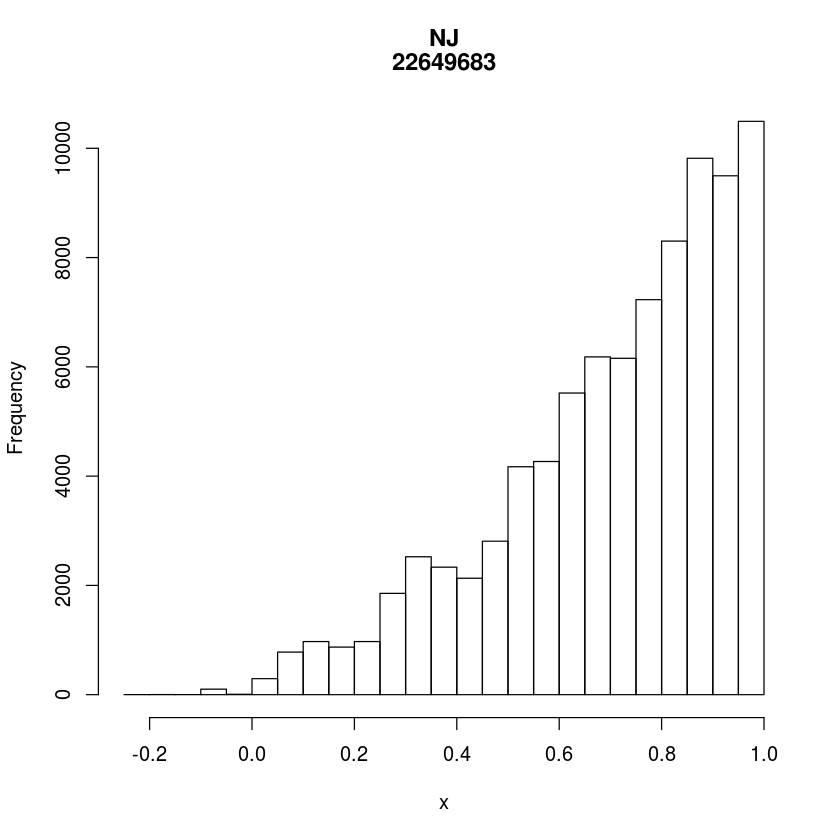

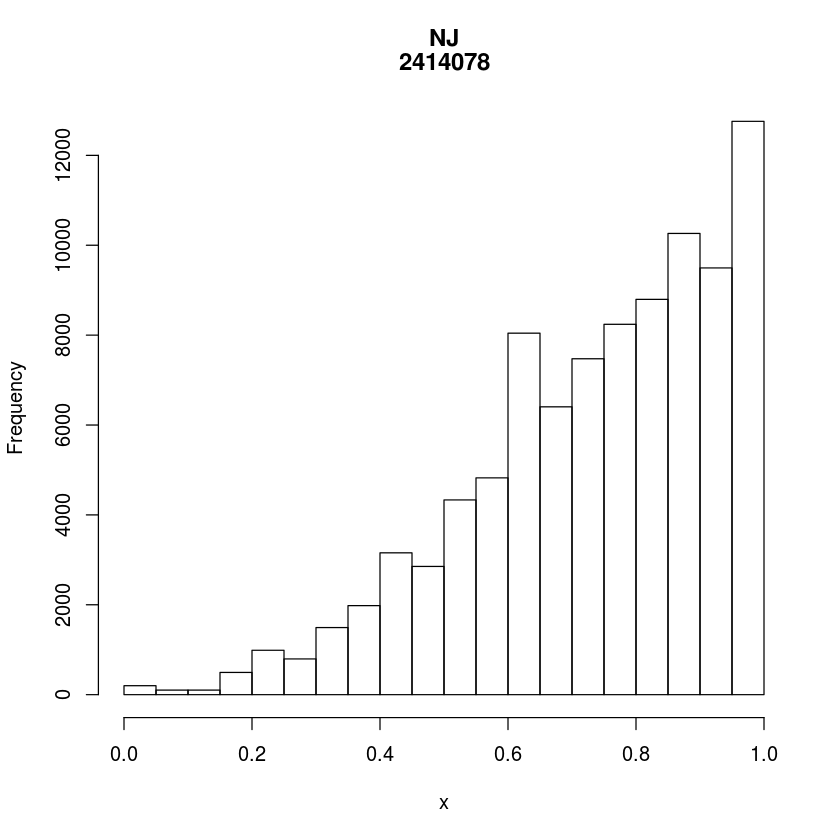

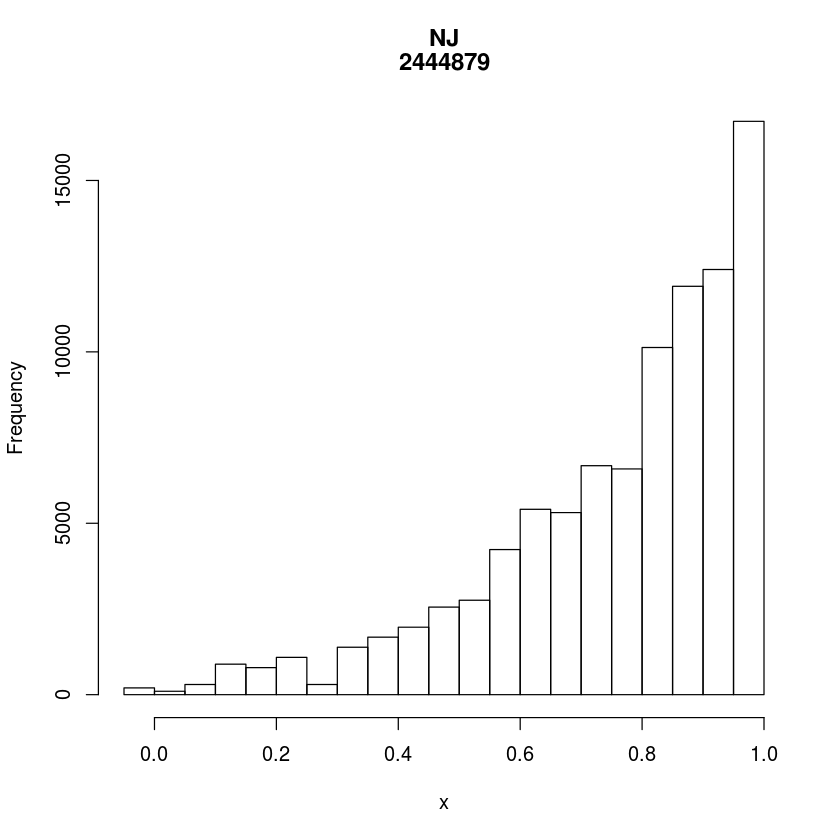

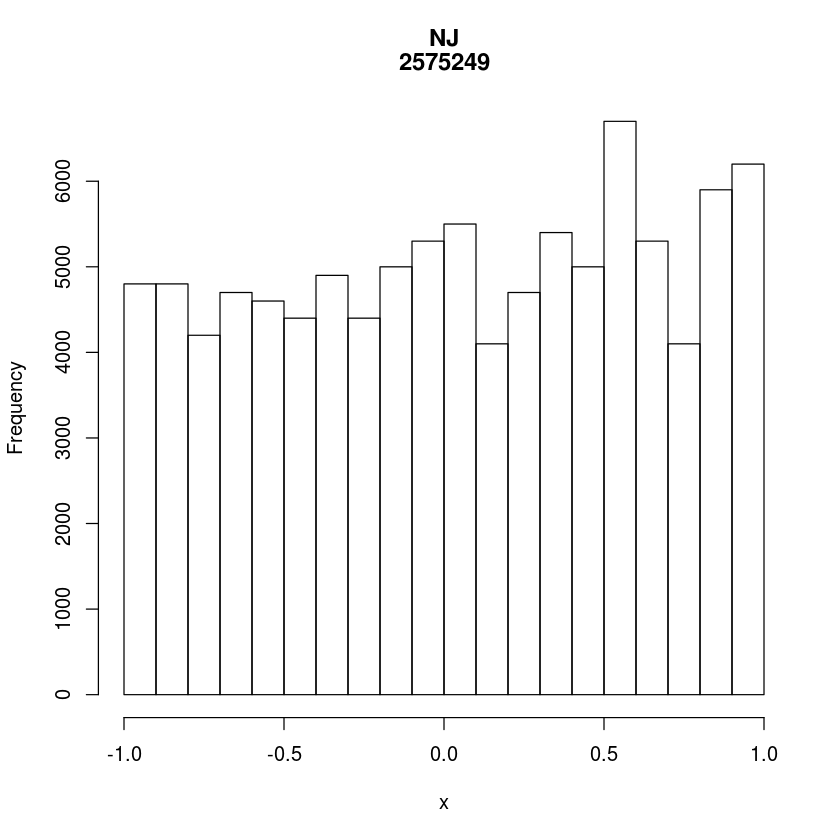

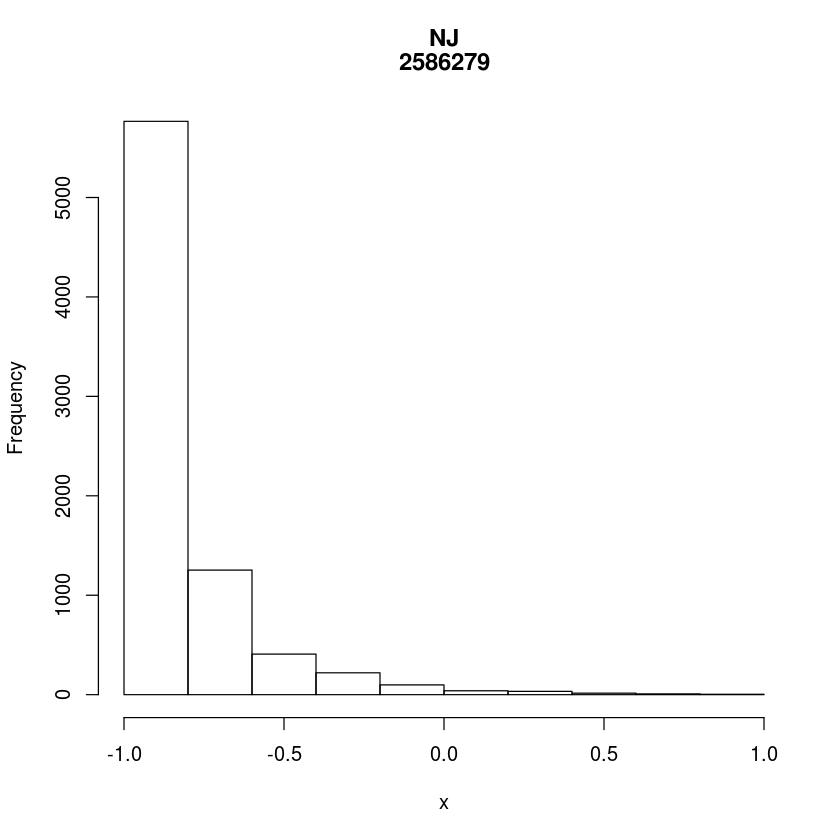

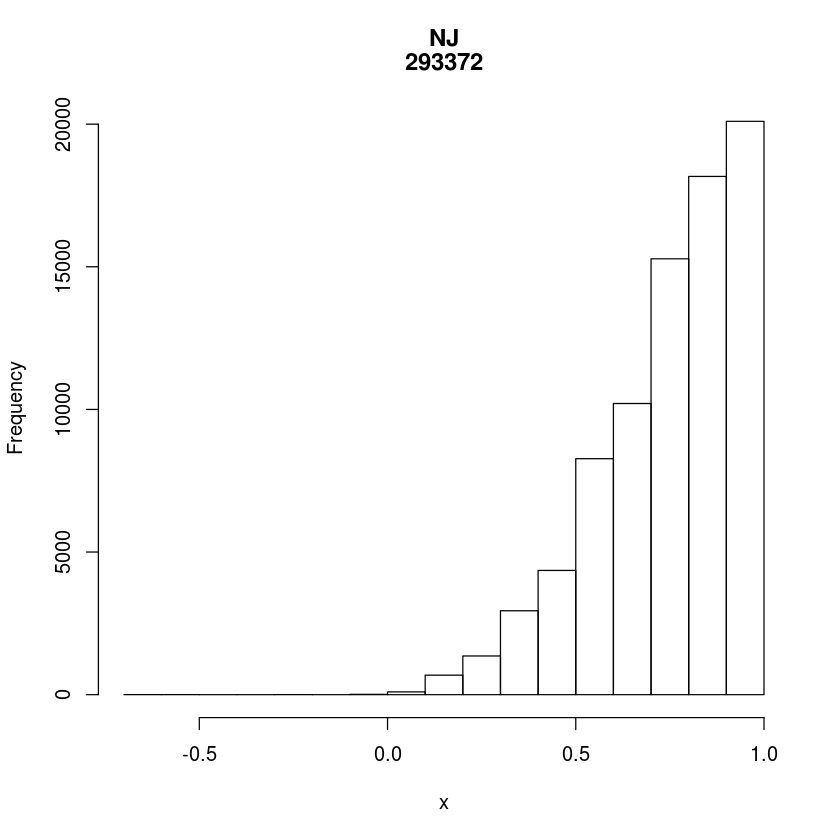

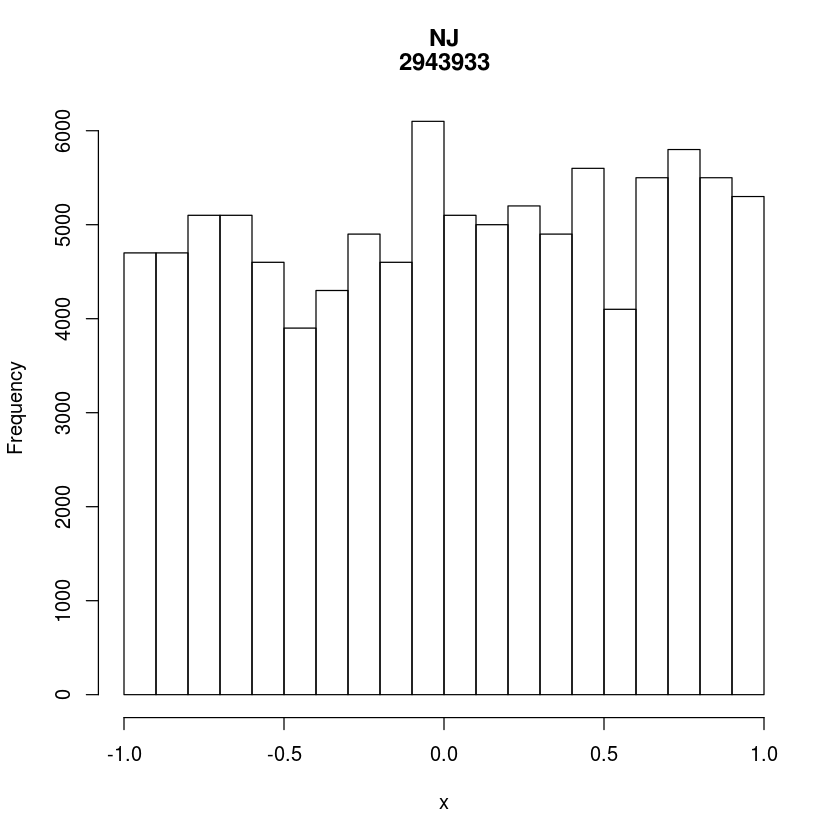

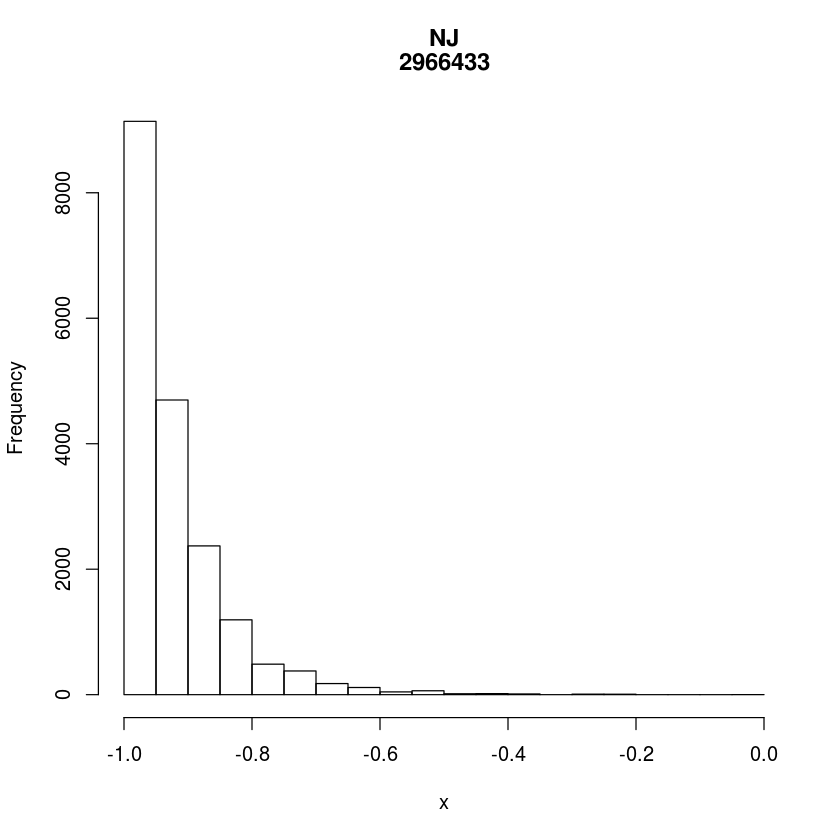

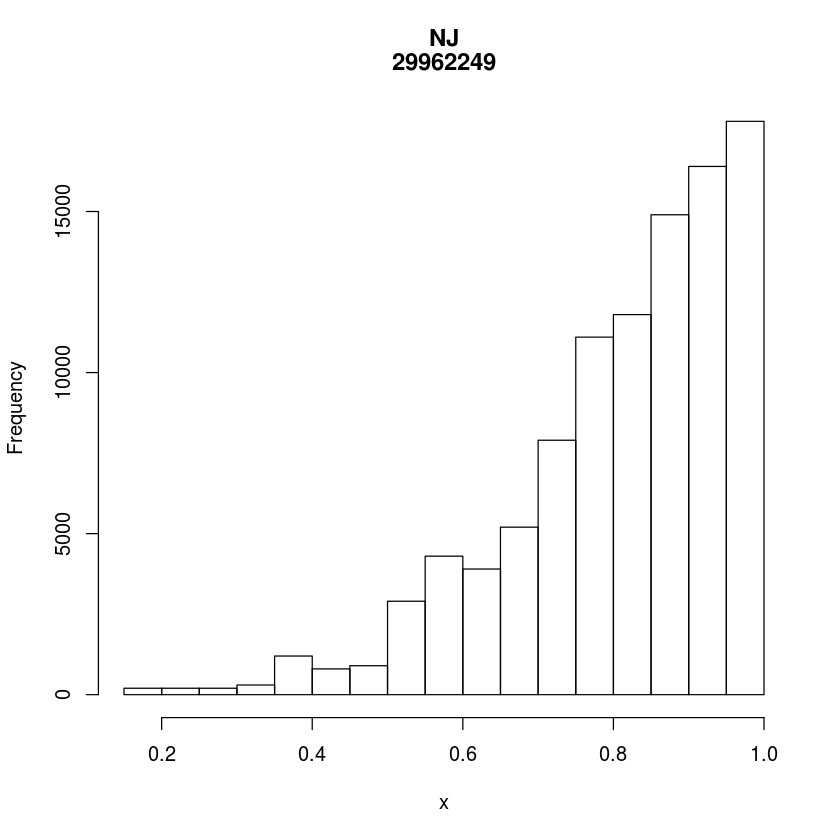

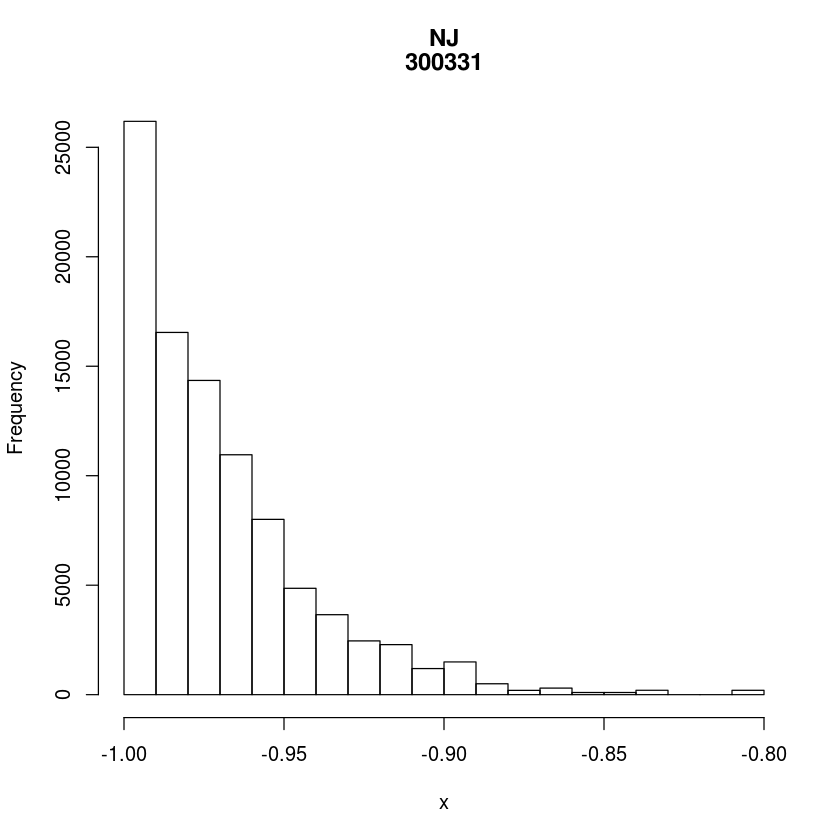

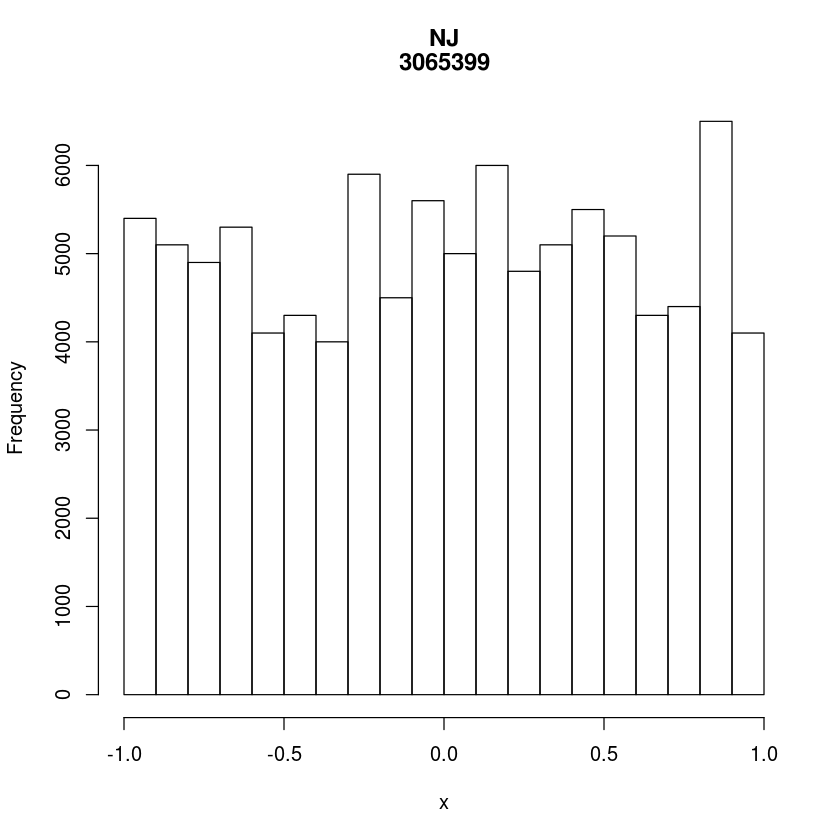

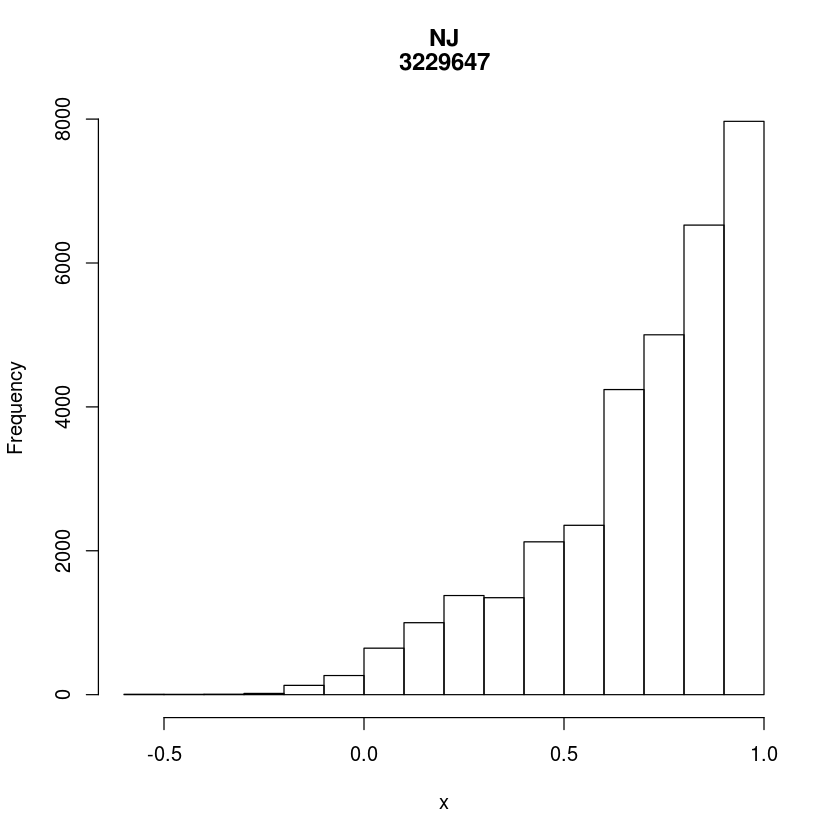

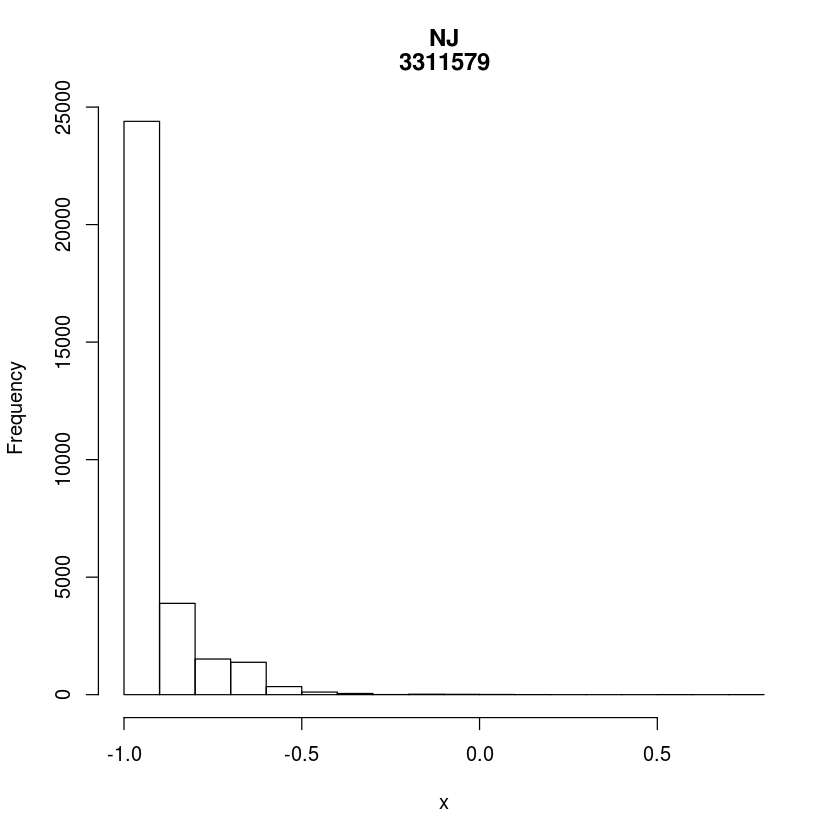

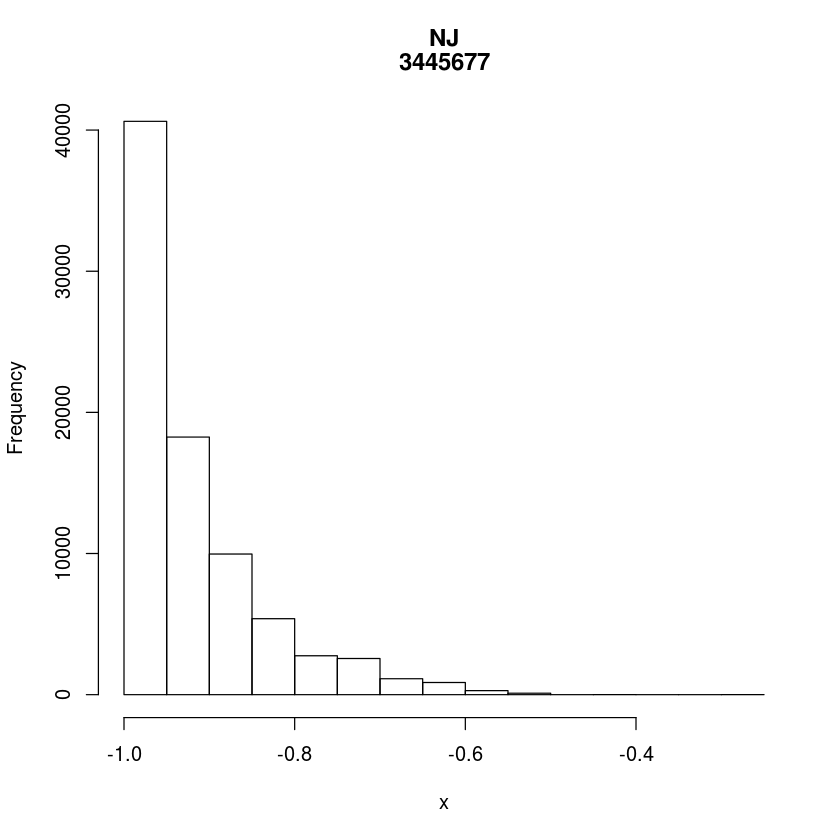

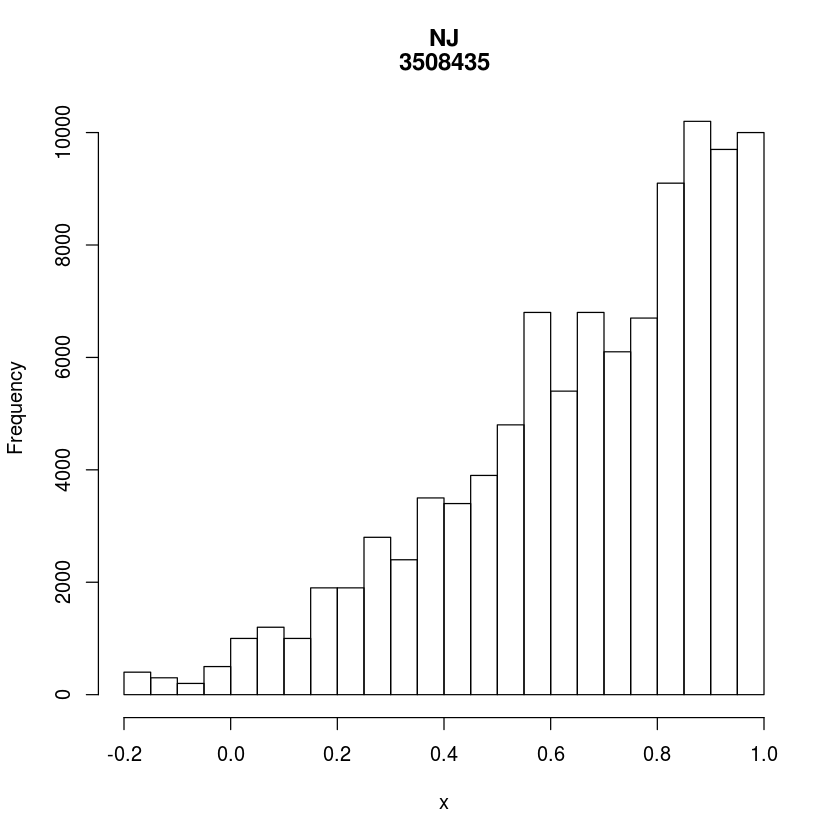

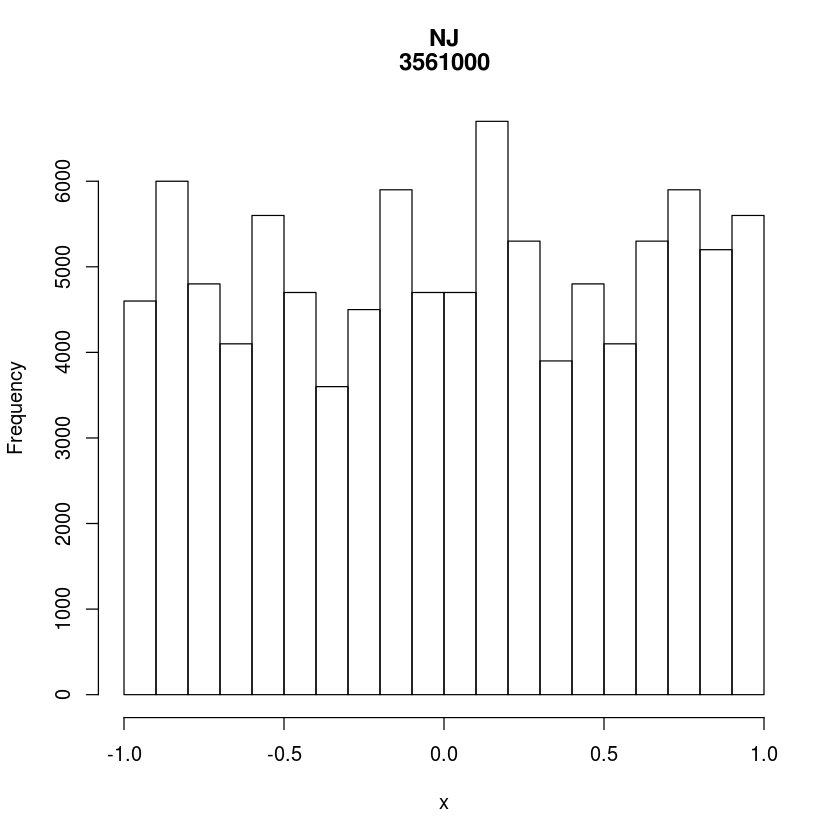

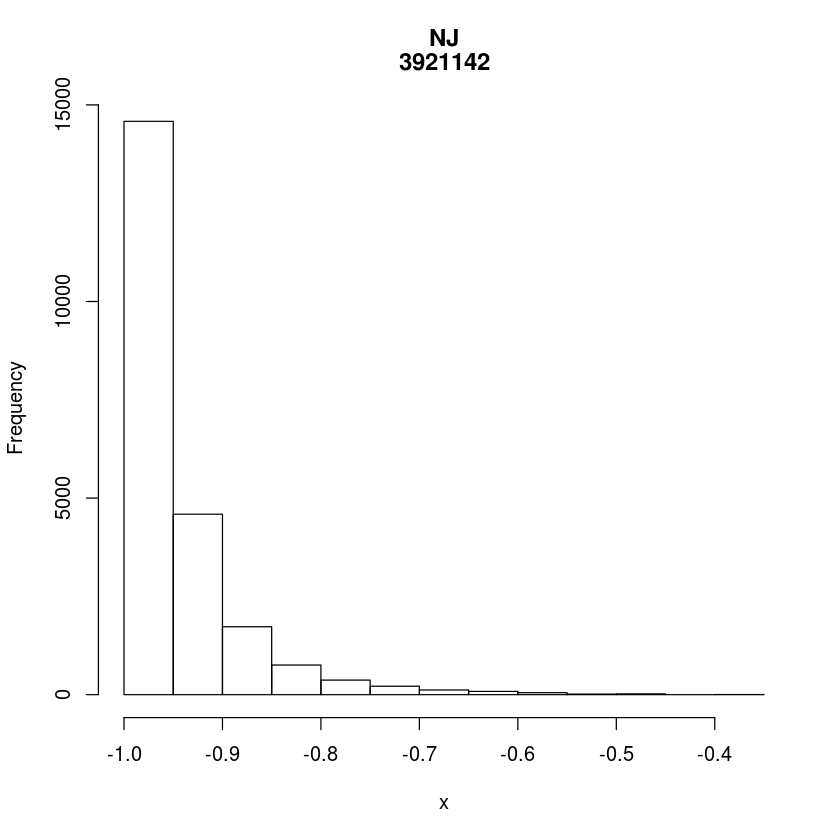

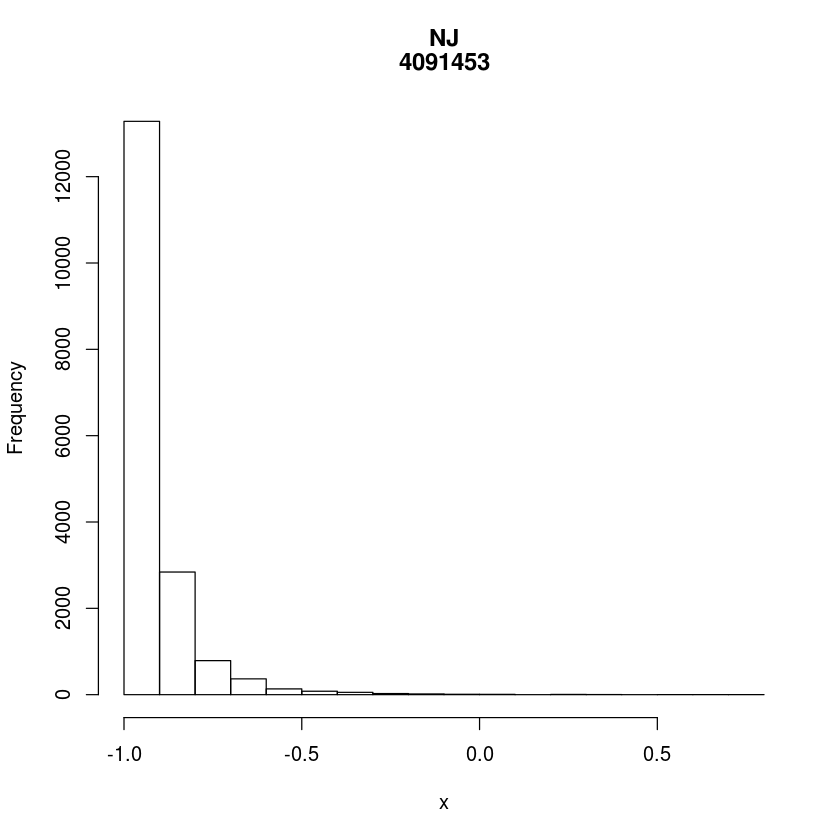

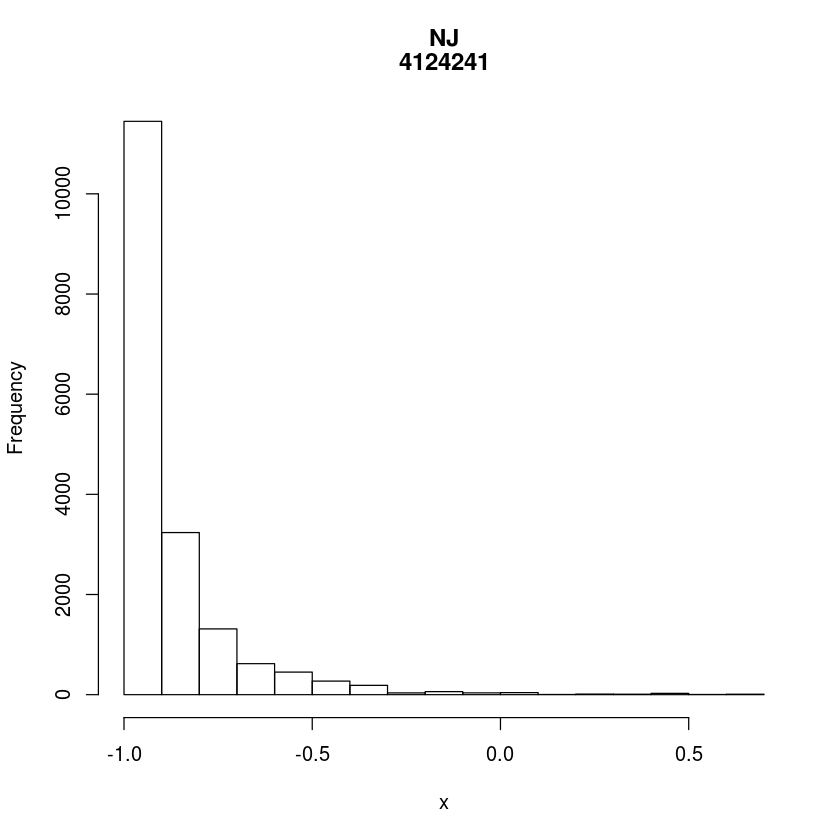

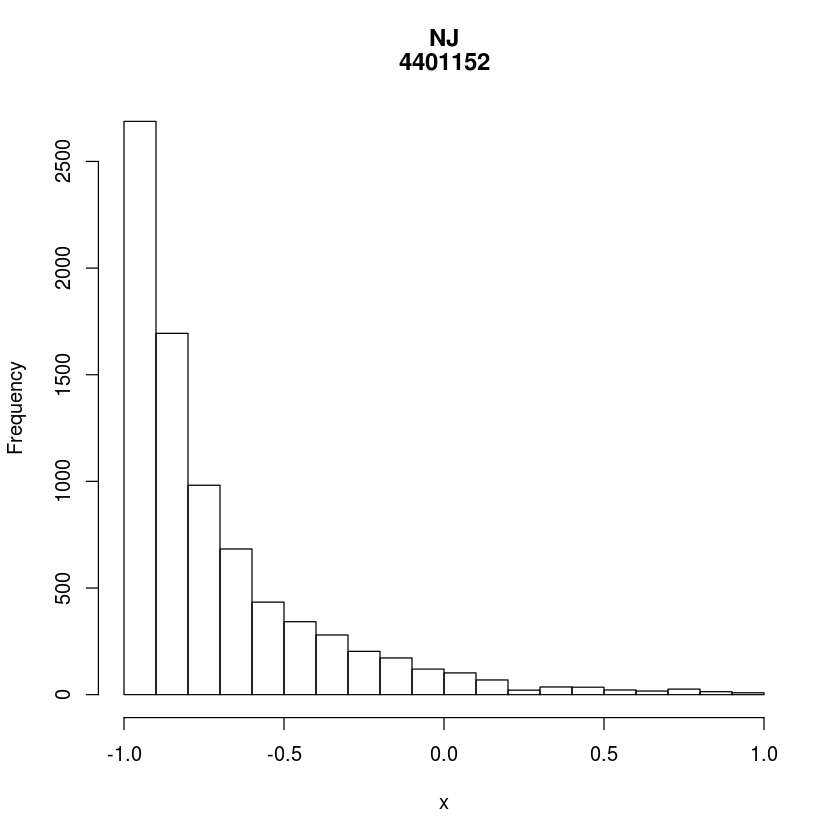

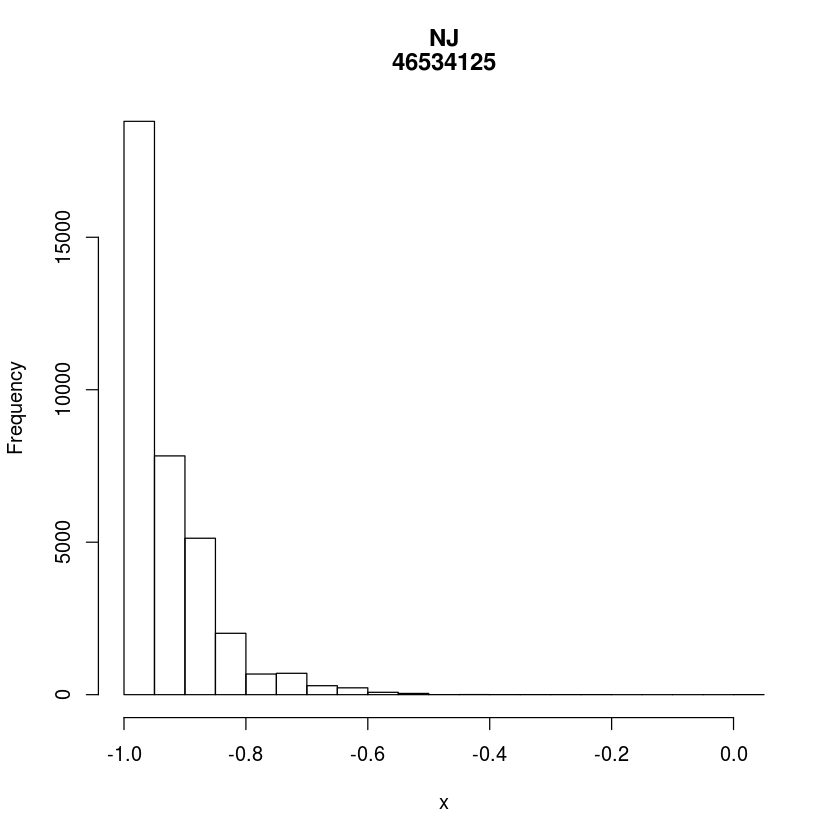

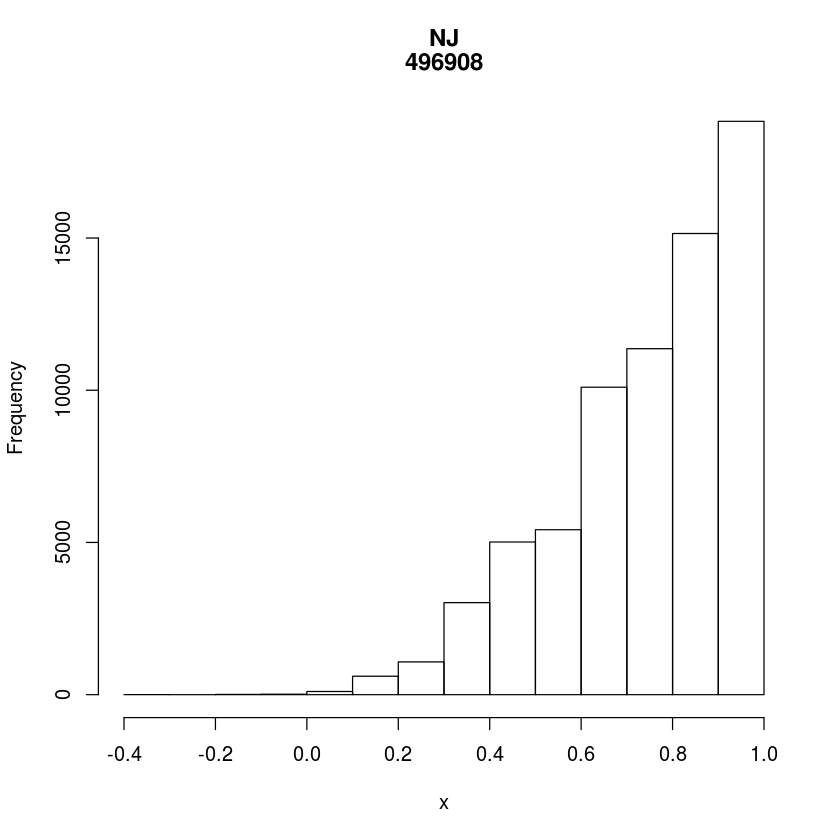

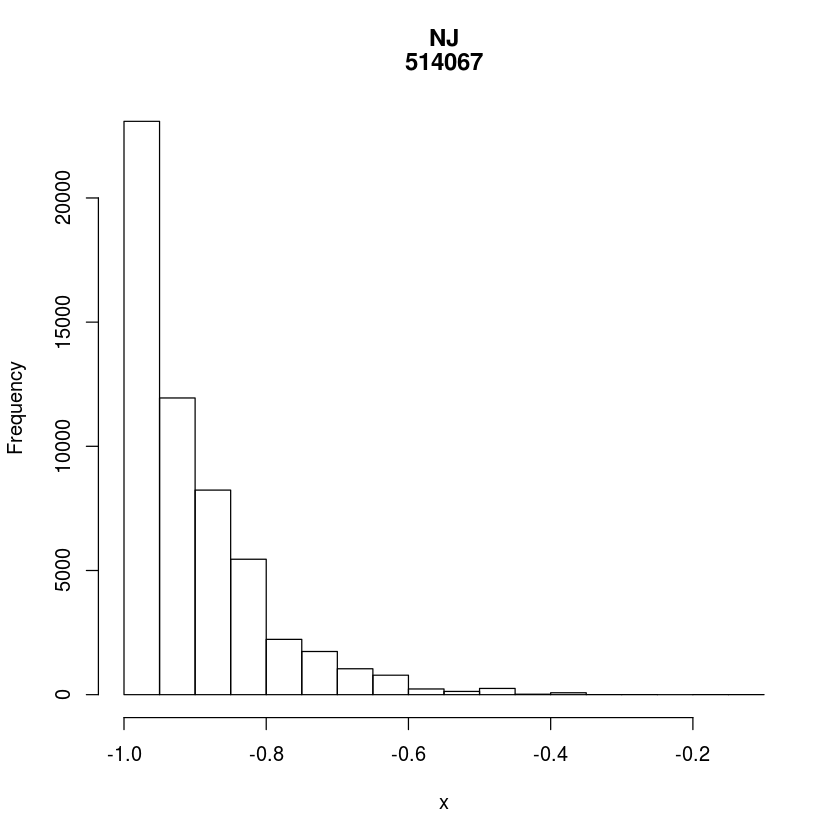

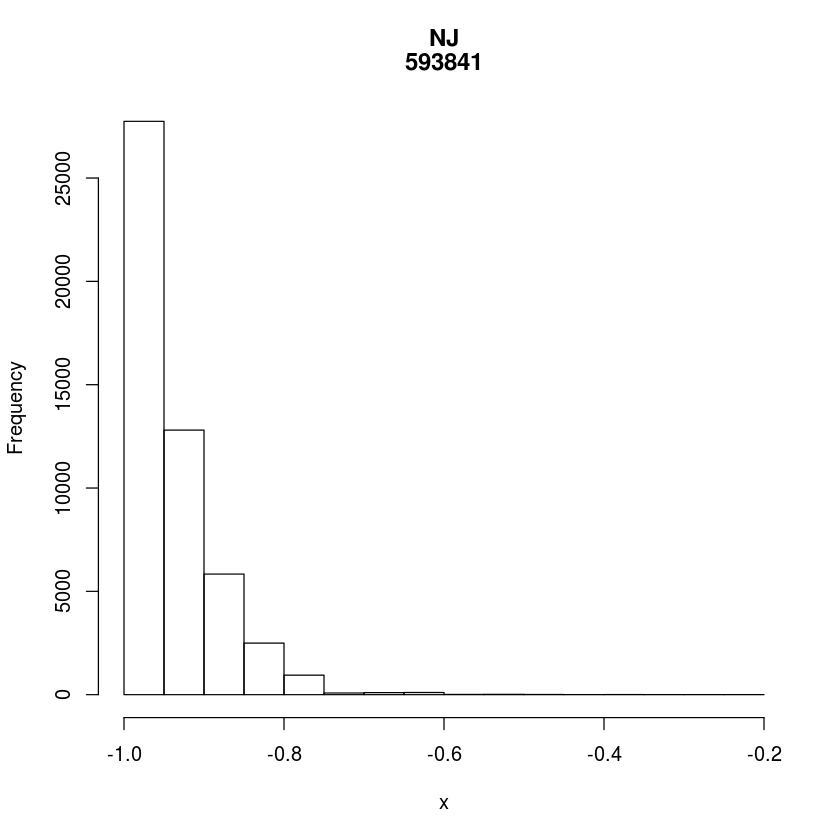

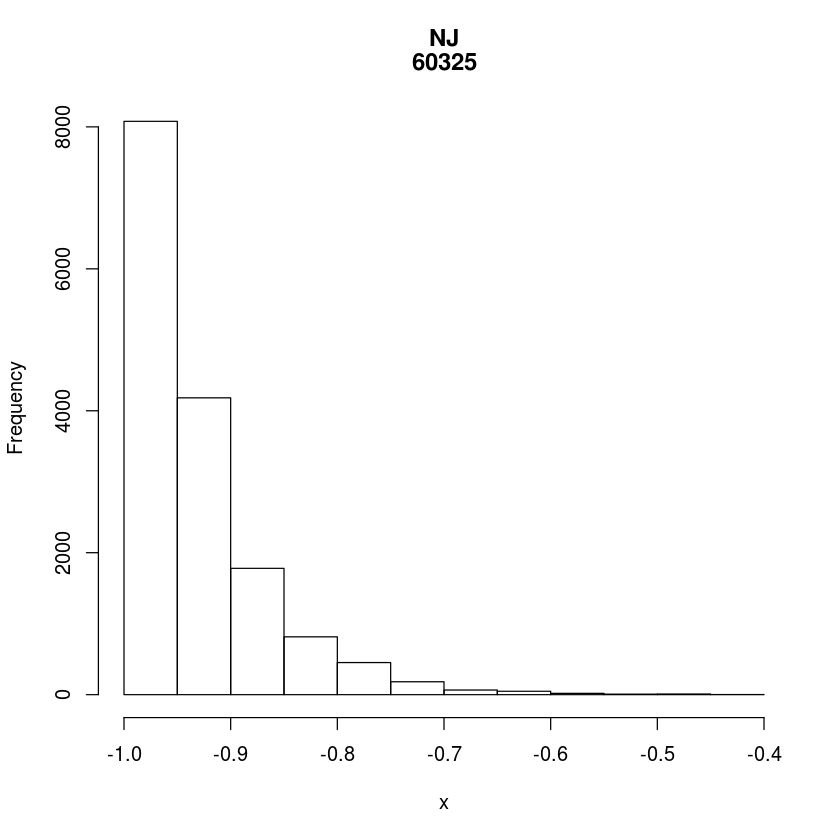

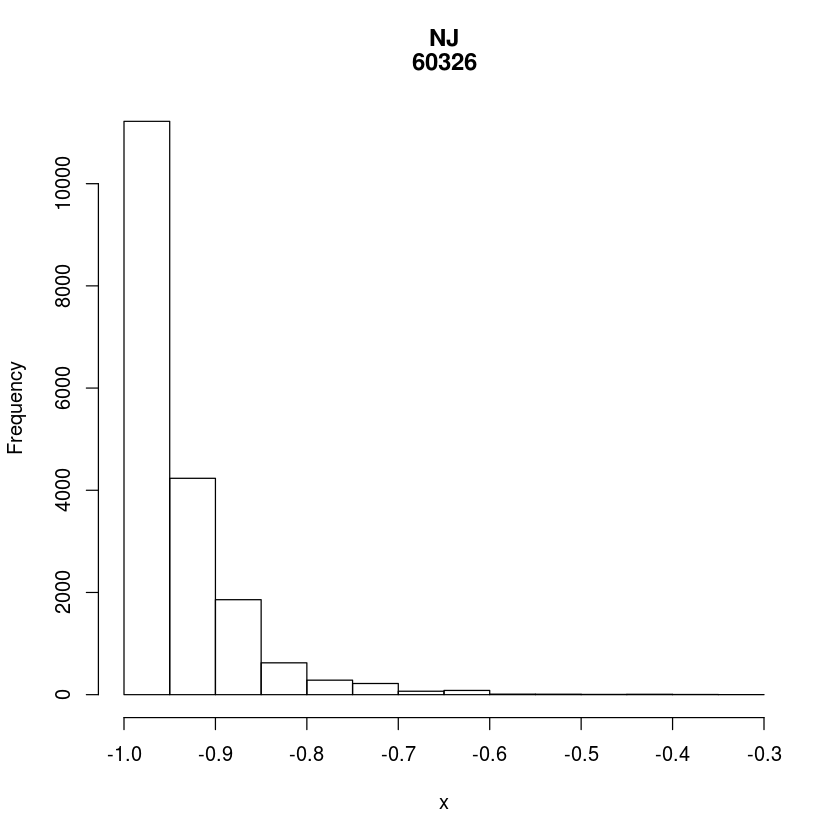

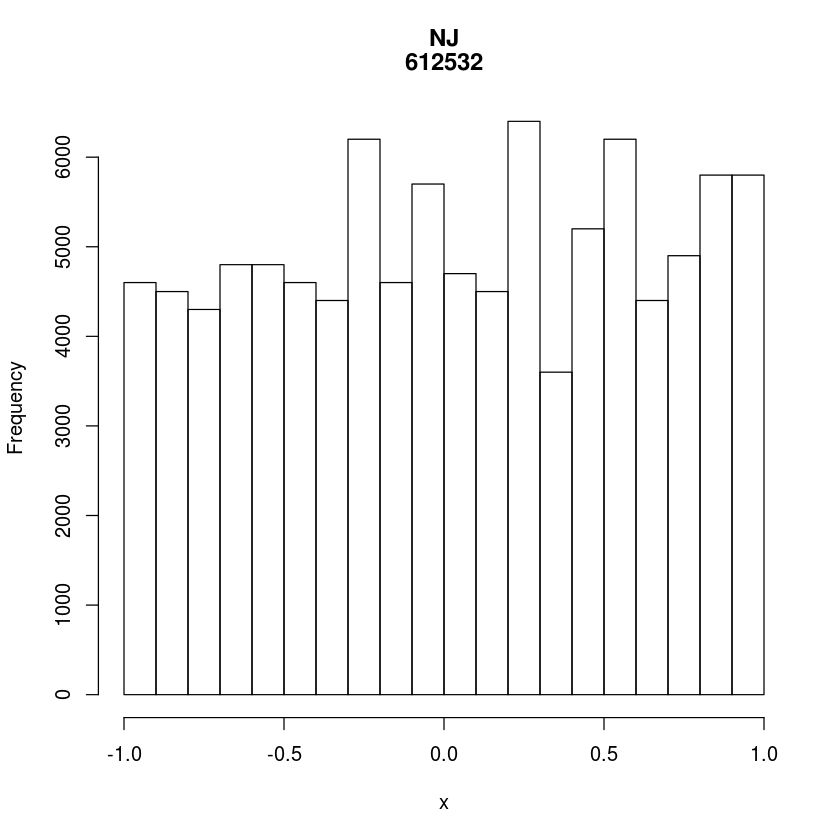

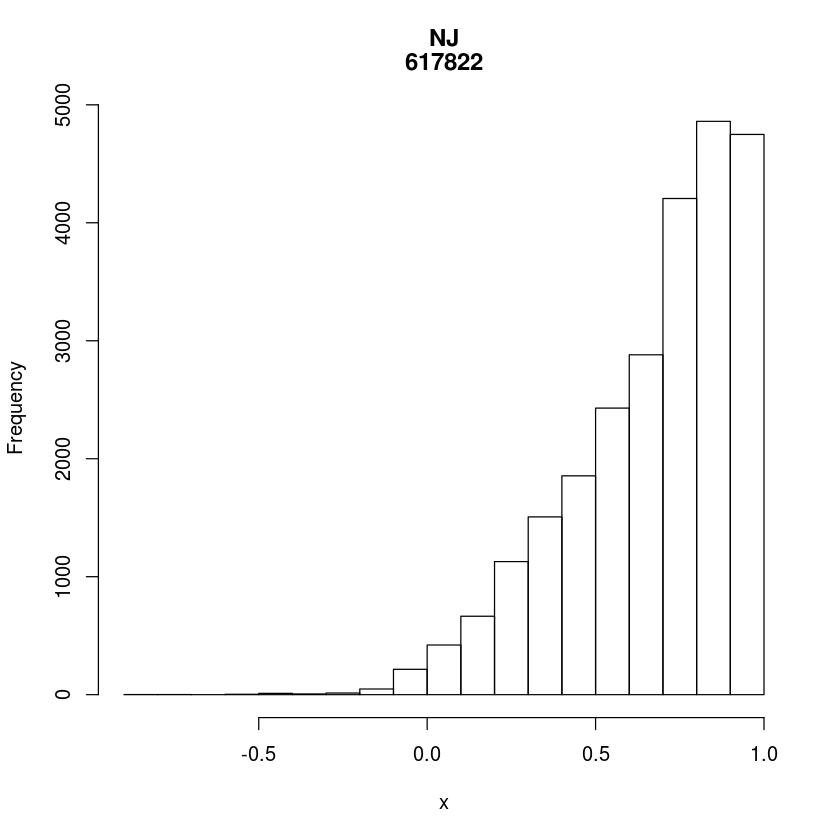

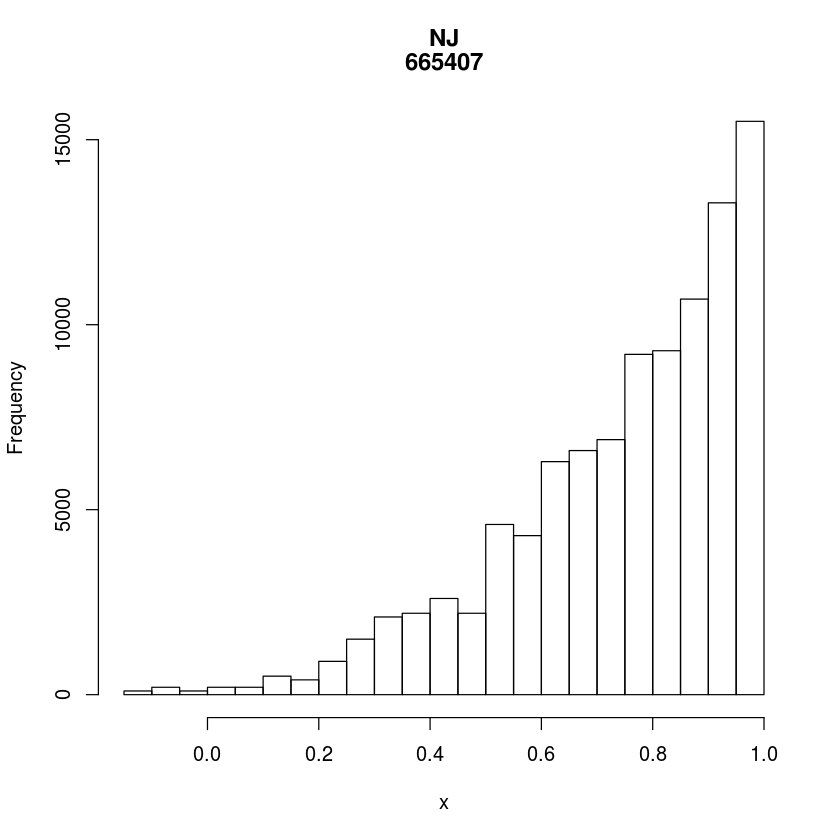

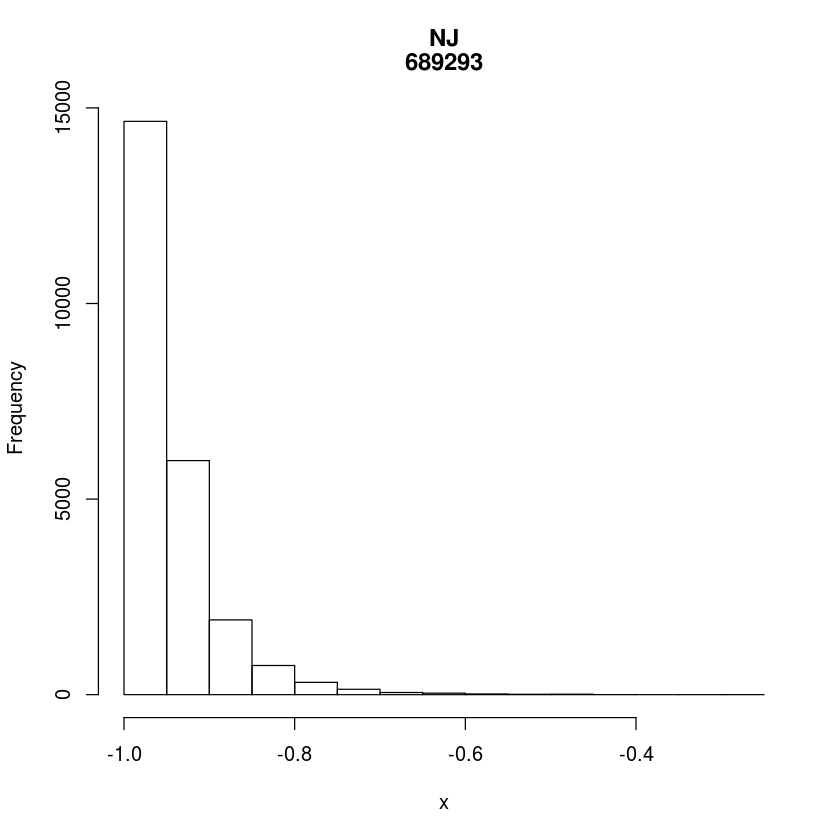

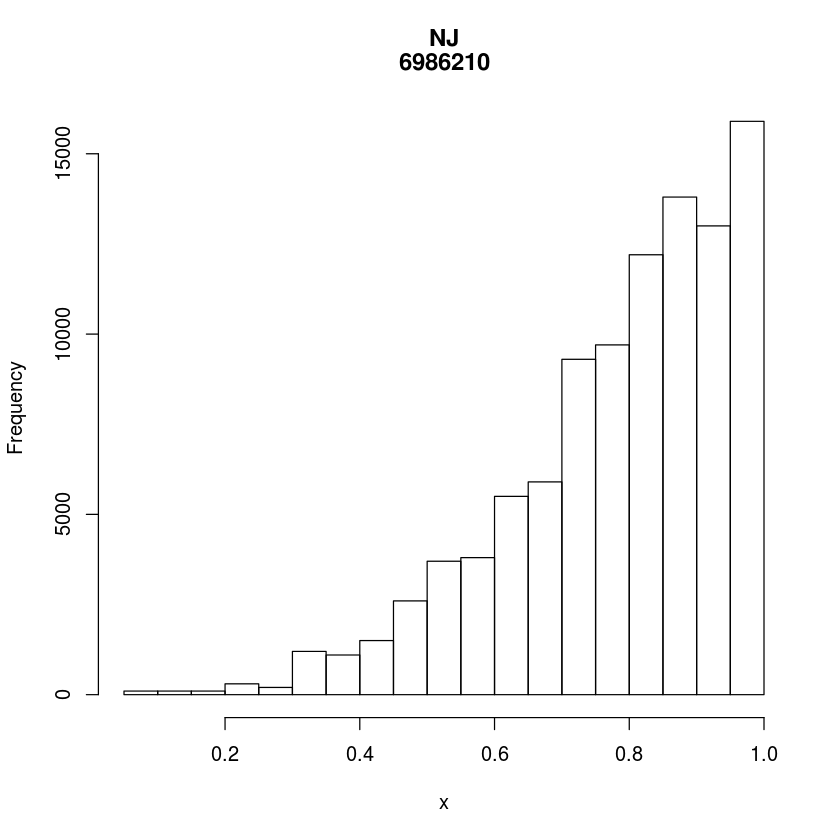

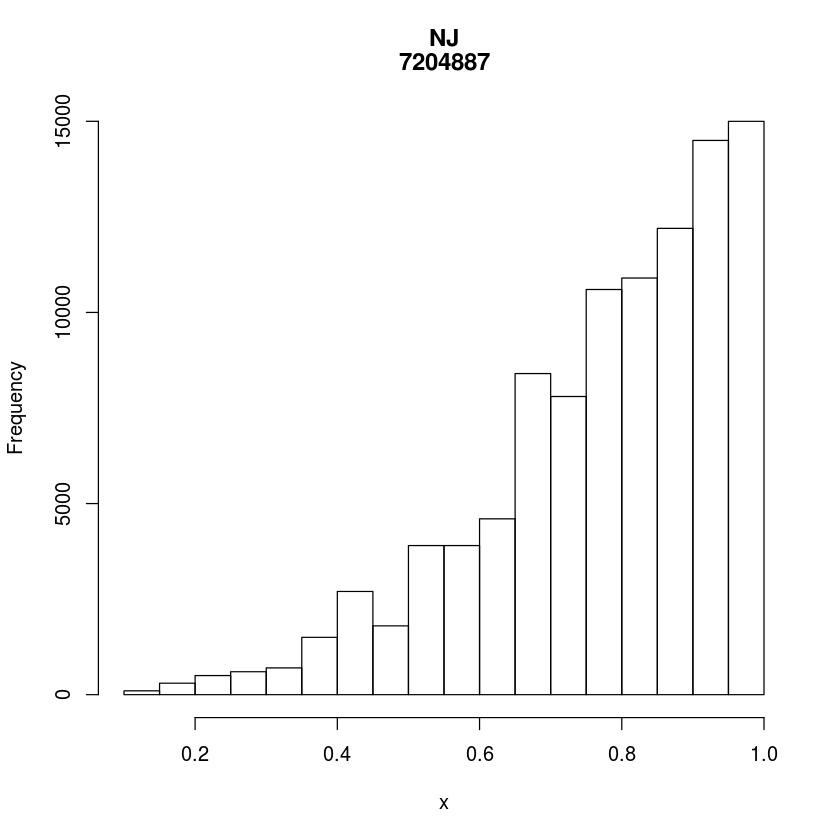

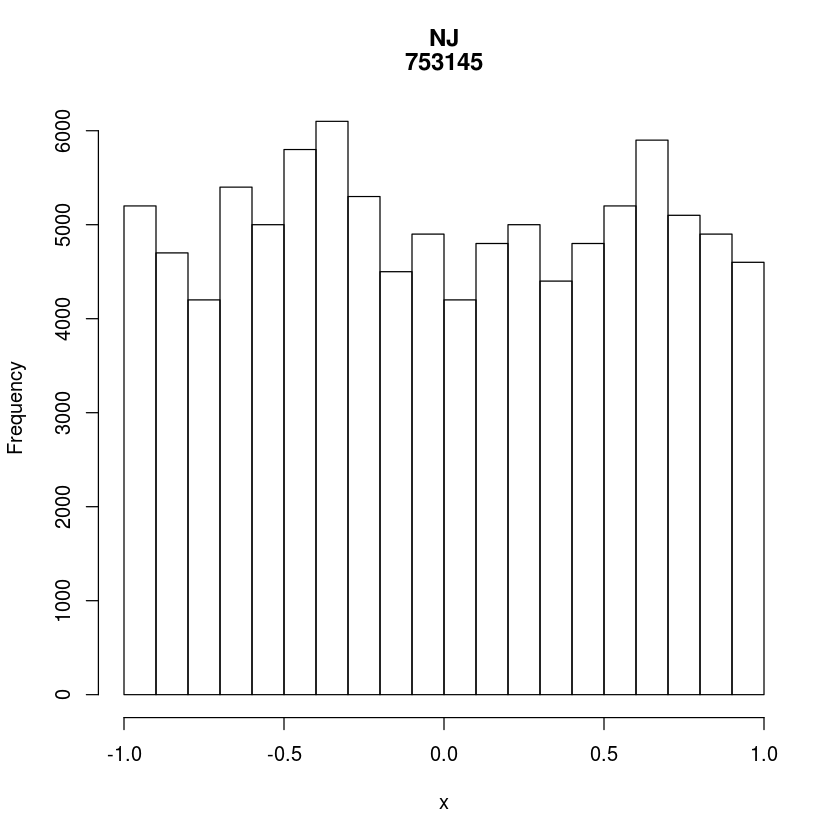

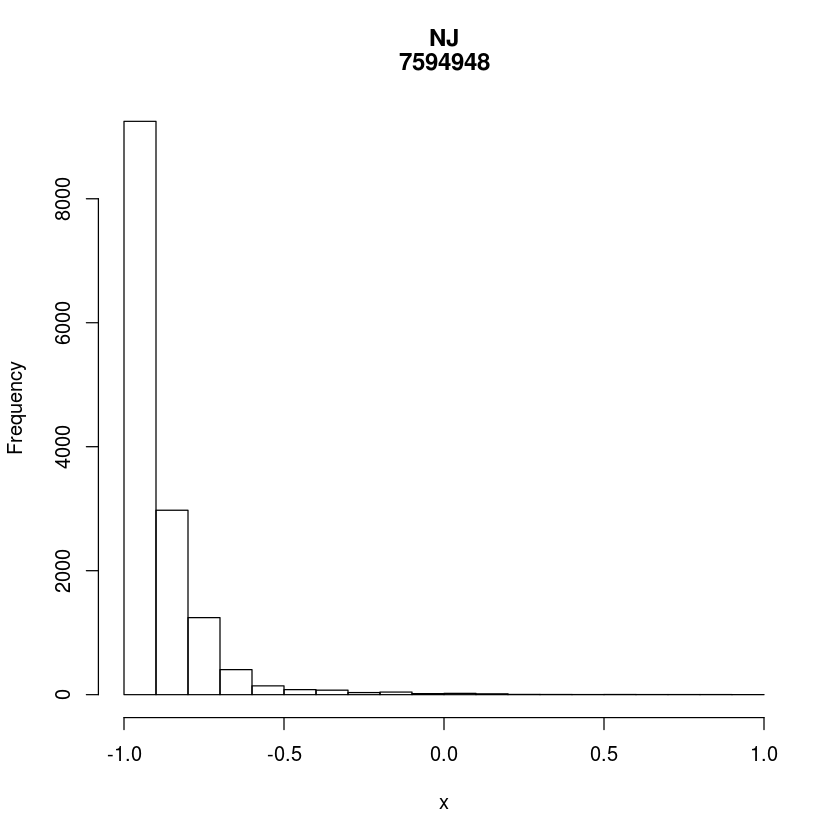

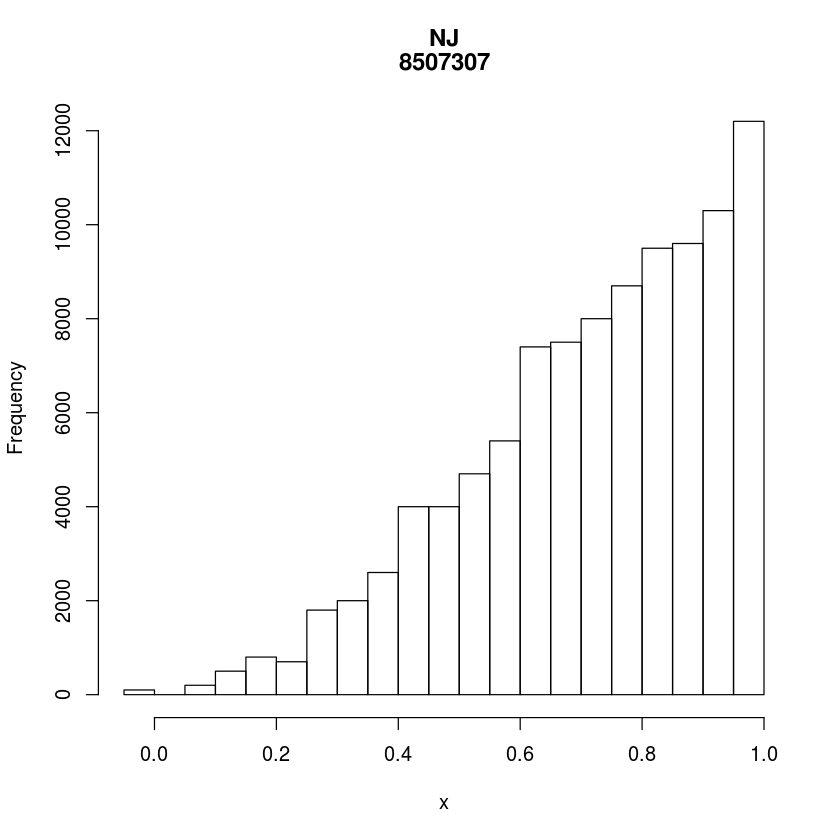

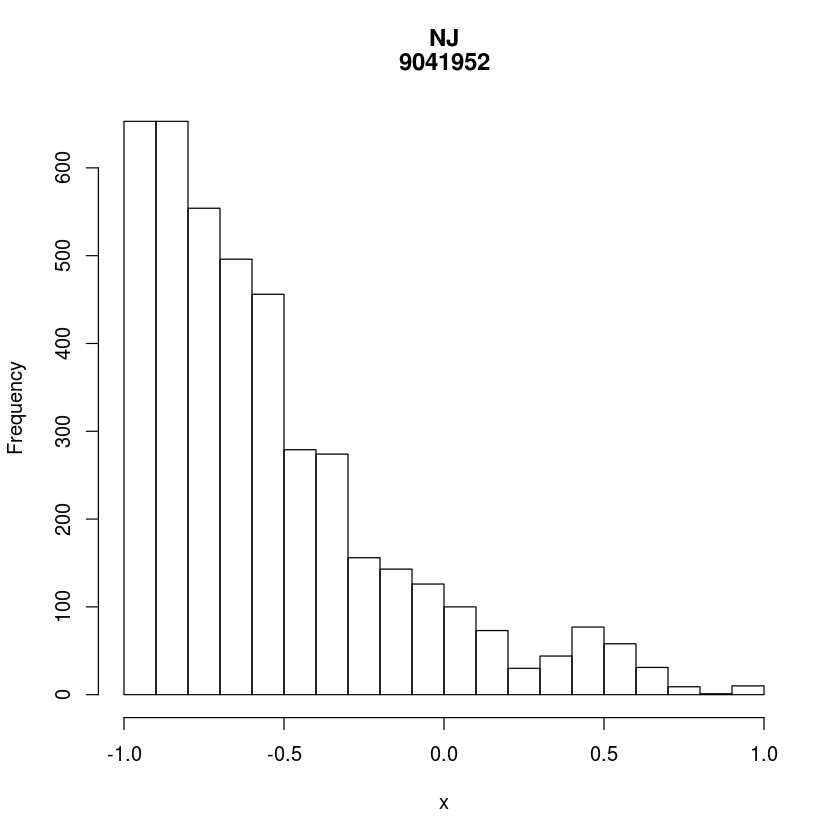

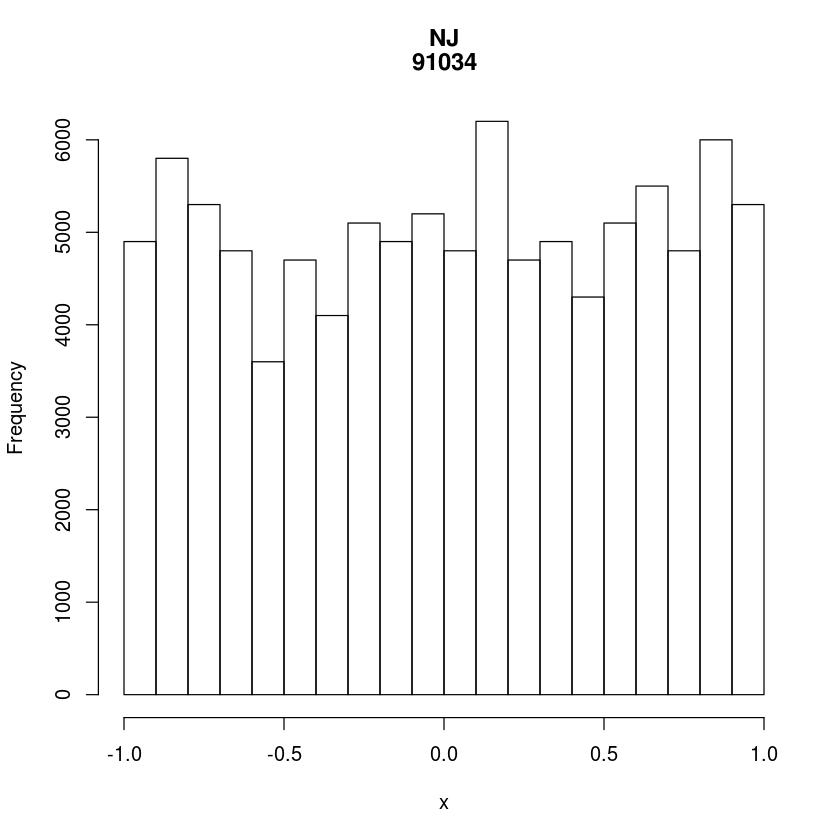

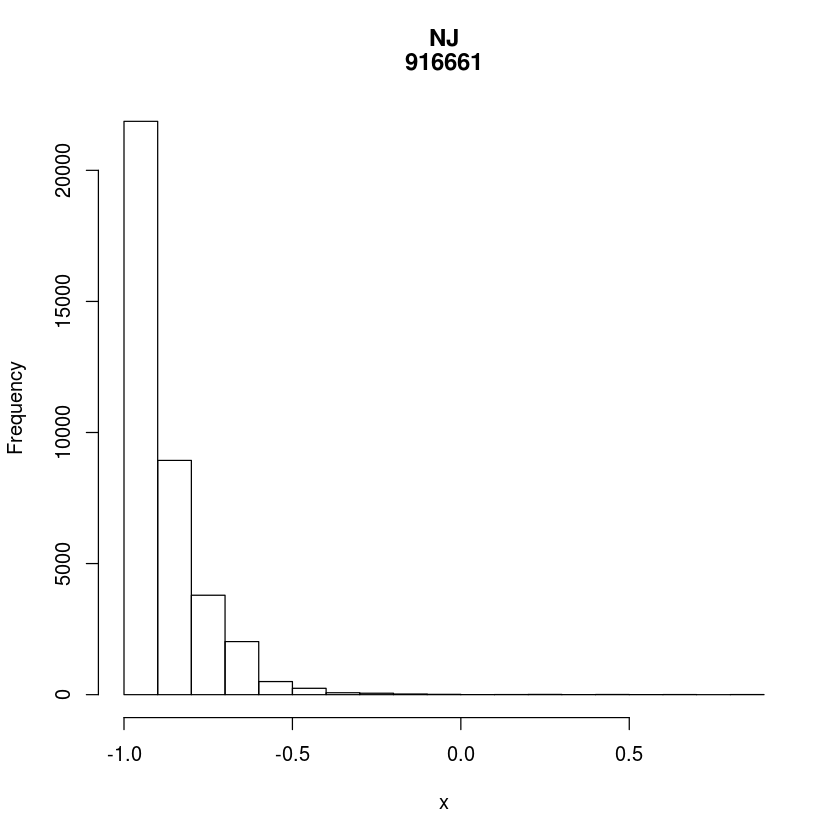

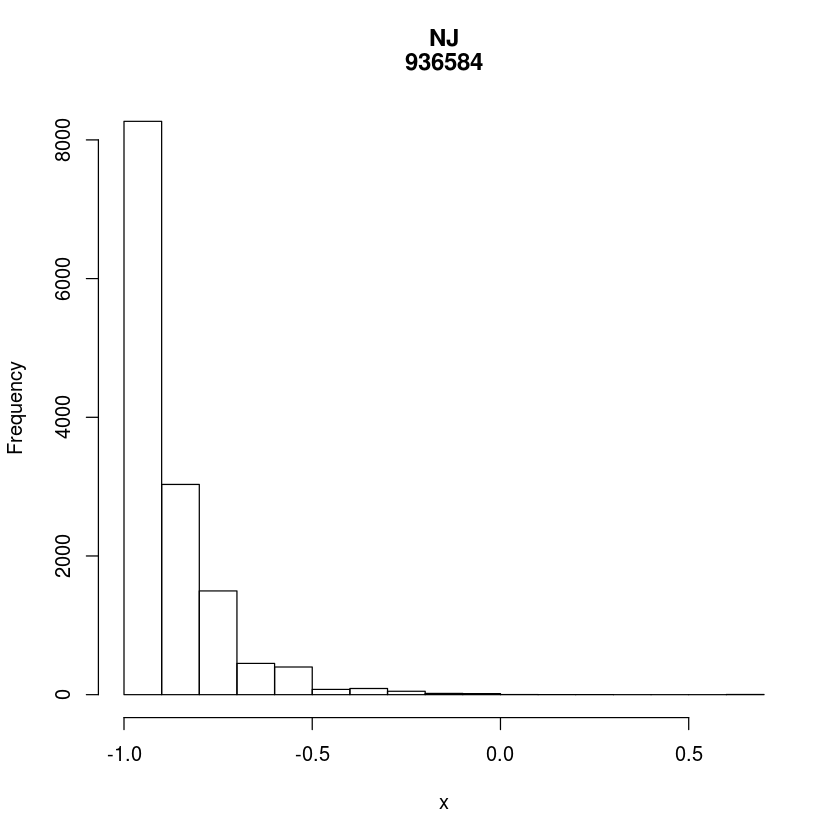

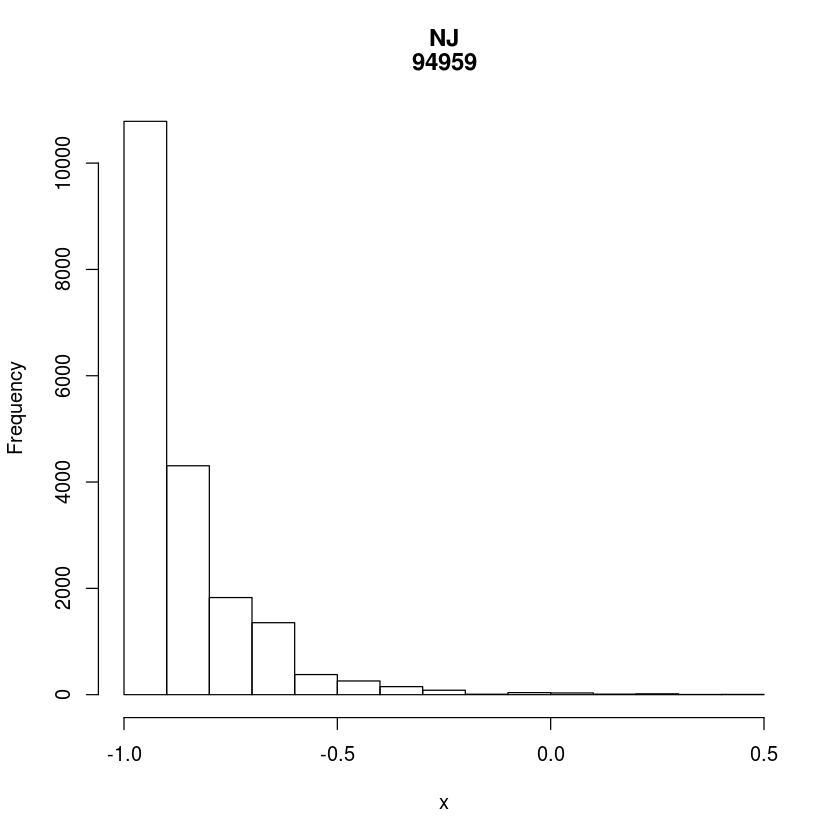

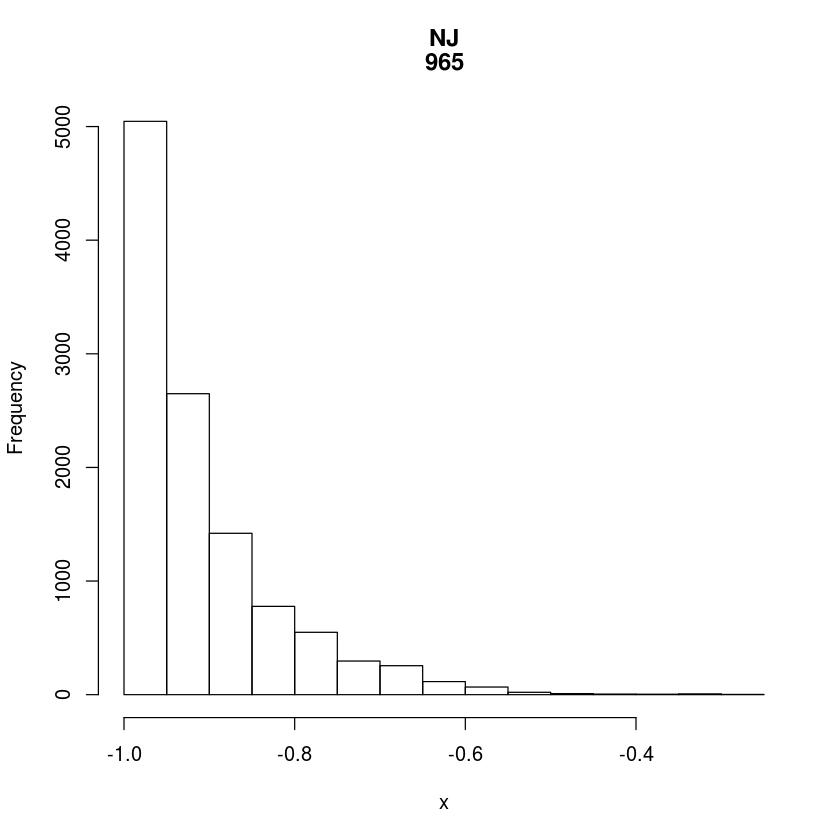

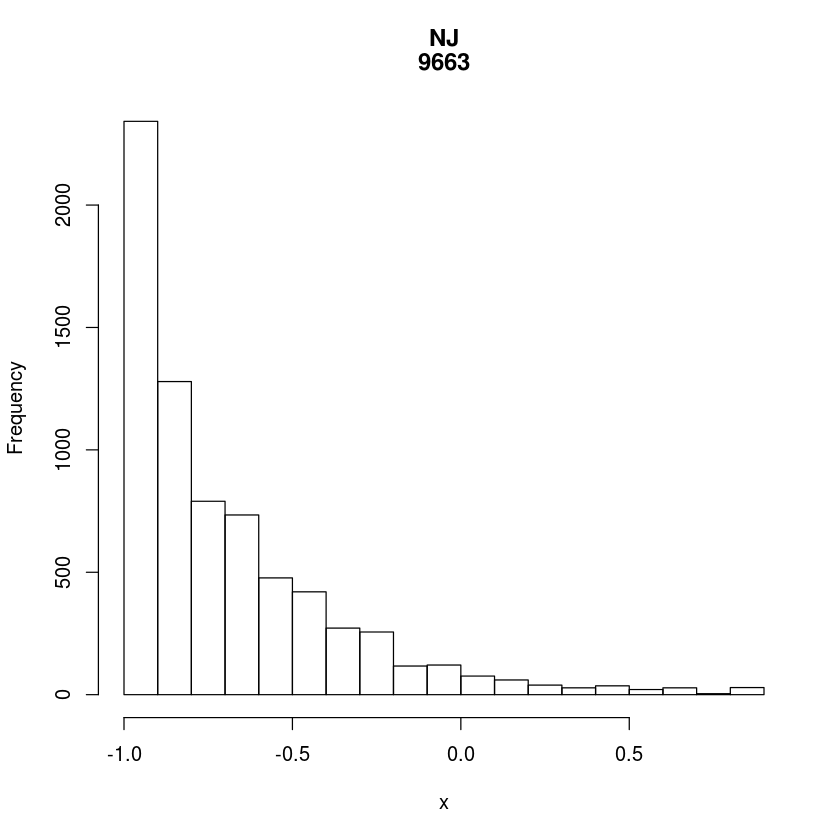

[,1]                                                                                                                            
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0               
counts   3500, 4100, 5300, 5700, 4800, 4500, 4800, 3500, 4900, 4900, 5200, 5000, 5100, 6200, 5600, 6000, 5400, 5400, 4800, 5300          
density  0.35, 0.41, 0.53, 0.57, 0.48, 0.45, 0.48, 0.35, 0.49, 0.49, 0.52, 0.50, 0.51, 0.62, 0.56, 0.60, 0.54, 0.54, 0.48, 0.53          
mids     -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95
xname    x                                                                                                                               
equidist TRUE                                                                                                                            
         [,2]                                                                                                                                                                                                                                                       
breaks   -0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00                                                                                                          
counts   100, 100, 0, 200, 500, 700, 900, 1400, 1300, 1900, 3200, 3200, 2900, 5400, 5900, 5600, 4900, 7600, 7200, 9900, 11900, 11199, 14000                                                                                                                         
density  0.0200002, 0.0200002, 0.0000000, 0.0400004, 0.1000010, 0.1400014, 0.1800018, 0.2800028, 0.2600026, 0.3800038, 0.6400064, 0.6400064, 0.5800058, 1.0800108, 1.1800118, 1.1200112, 0.9800098, 1.5200152, 1.4400144, 1.9800198, 2.3800238, 2.2398224, 2.8000280
mids     -0.125, -0.075, -0.025, 0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925, 0.975                                                                                         
xname    x                                                                                                                                                                                                                                                          
equidist TRUE                                                                                                                                                                                                                                                       
         [,3]                                                                                                                                                                                                                          
breaks   -1.00, -0.95, -0.90, -0.85, -0.80, -0.75, -0.70, -0.65, -0.60, -0.55, -0.50, -0.45, -0.40, -0.35, -0.30, -0.25, -0.20                                                                                                         
counts   33539, 14211, 7021, 3305, 1768, 457, 270, 4, 5, 1, 1, 2, 0, 1, 0, 1                                                                                                                                                           
density  1.107153e+01, 4.691183e+00, 2.317697e+00, 1.091011e+00, 5.836332e-01, 1.508599e-01, 8.912950e-02, 1.320437e-03, 1.650546e-03, 3.301093e-04, 3.301093e-04, 6.602185e-04, 0.000000e+00, 3.301093e-04, 0.000000e+00, 3.301093e-04
mids     -0.975, -0.925, -0.875, -0.825, -0.775, -0.725, -0.675, -0.625, -0.575, -0.525, -0.475, -0.425, -0.375, -0.325, -0.275, -0.225                                                                                                
xname    x                                              

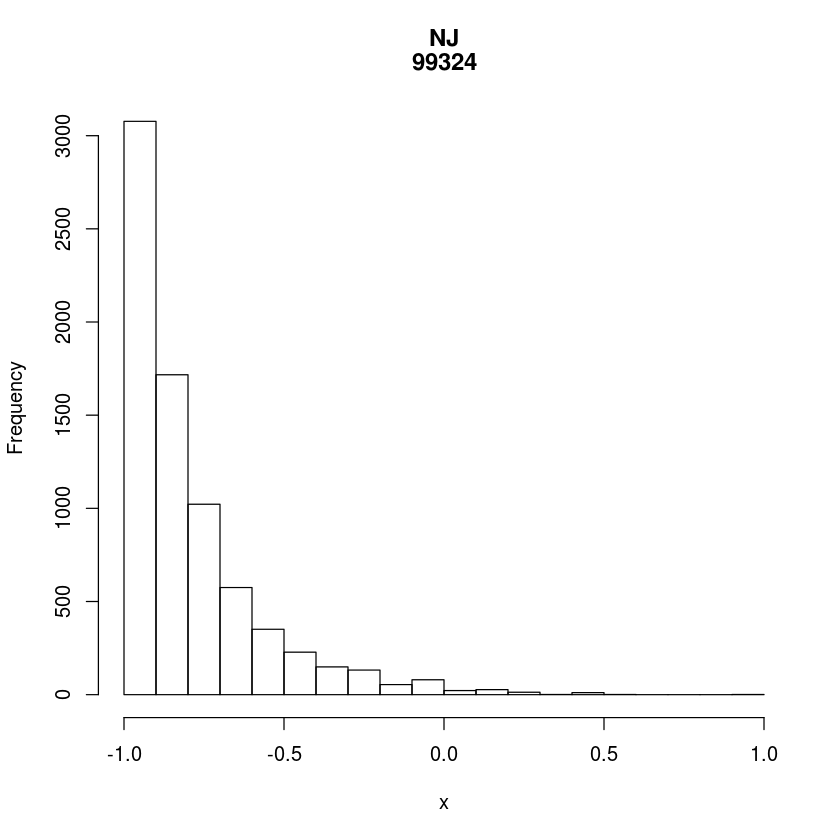

In [53]:
mapply(function(x, y) {
hist(x, main=c("NJ", y[1,4]))}, sNJ, tNJ_f2s)

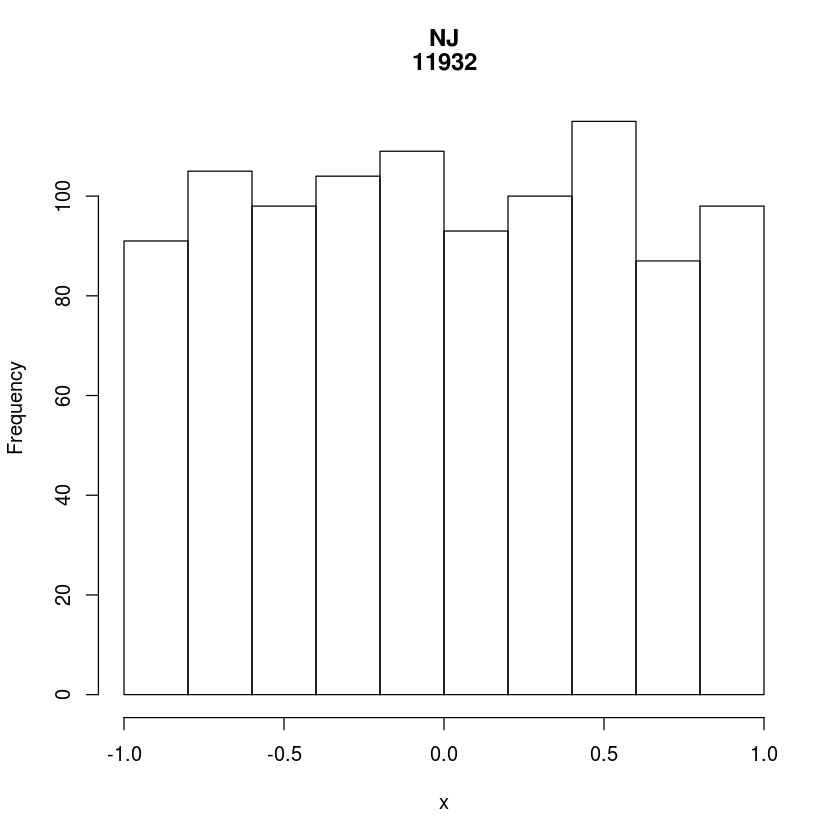

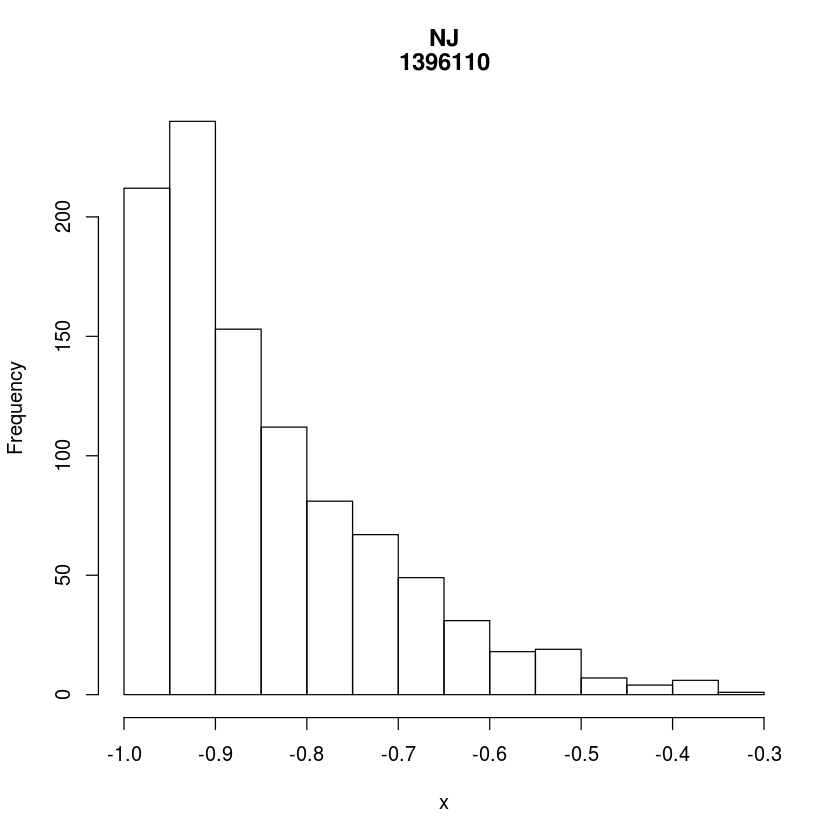

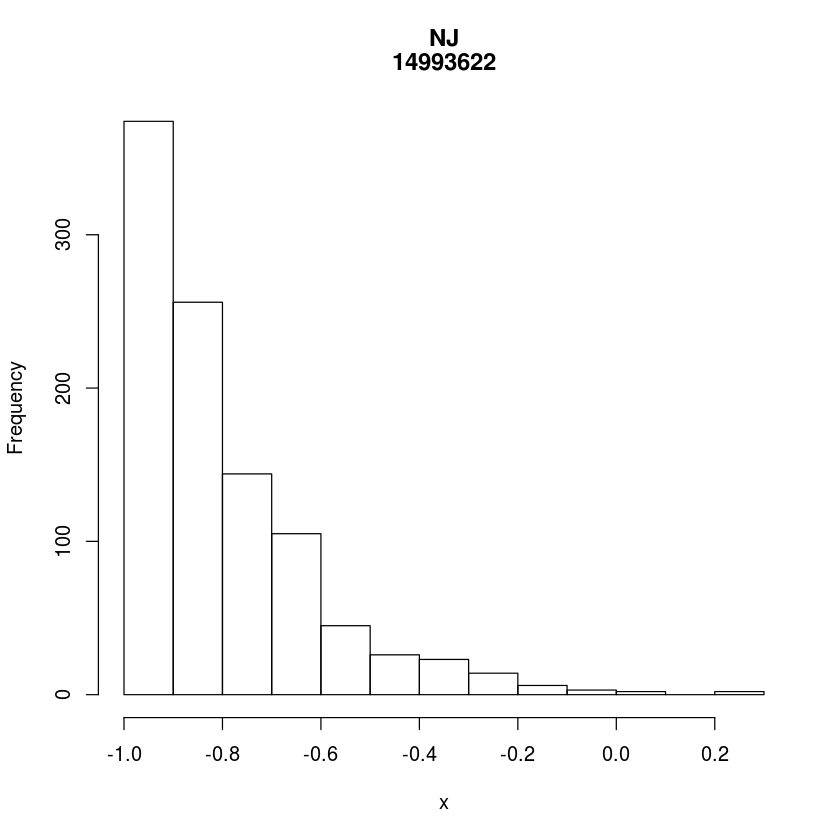

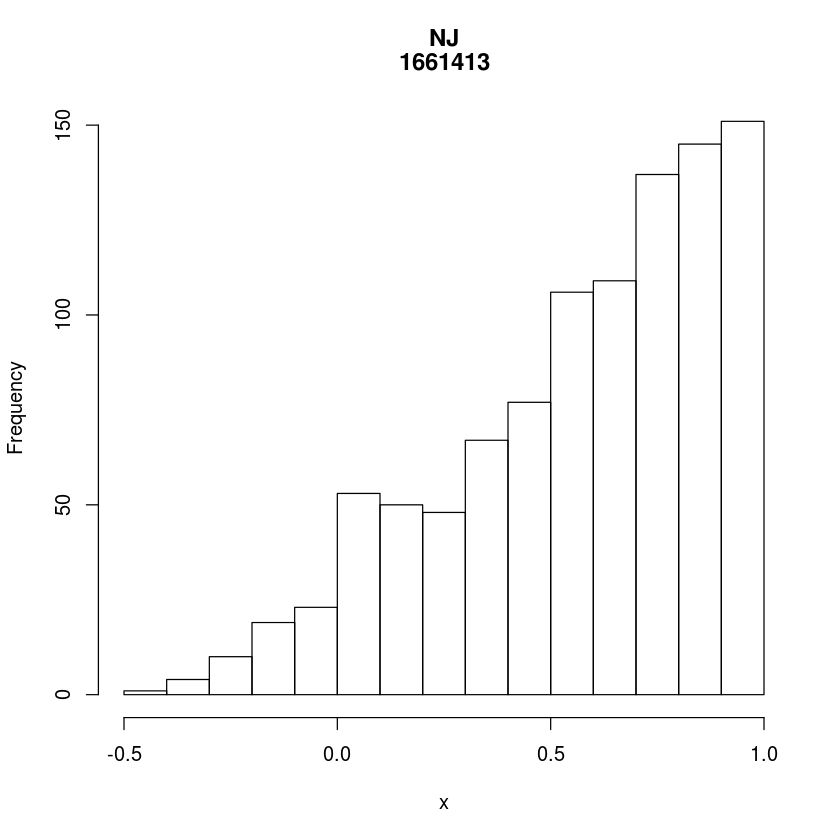

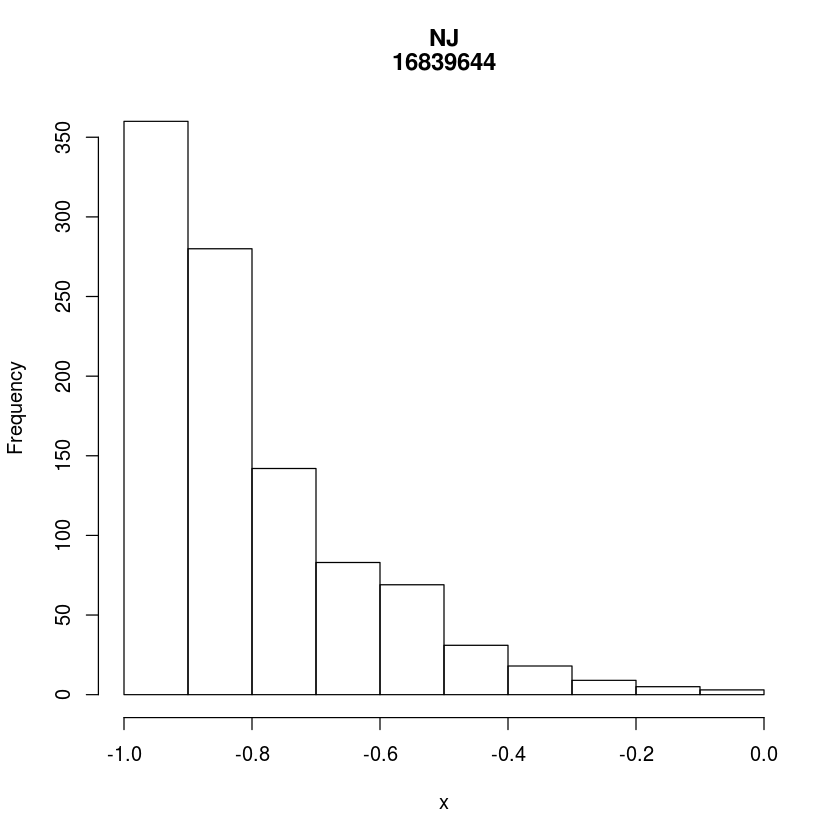

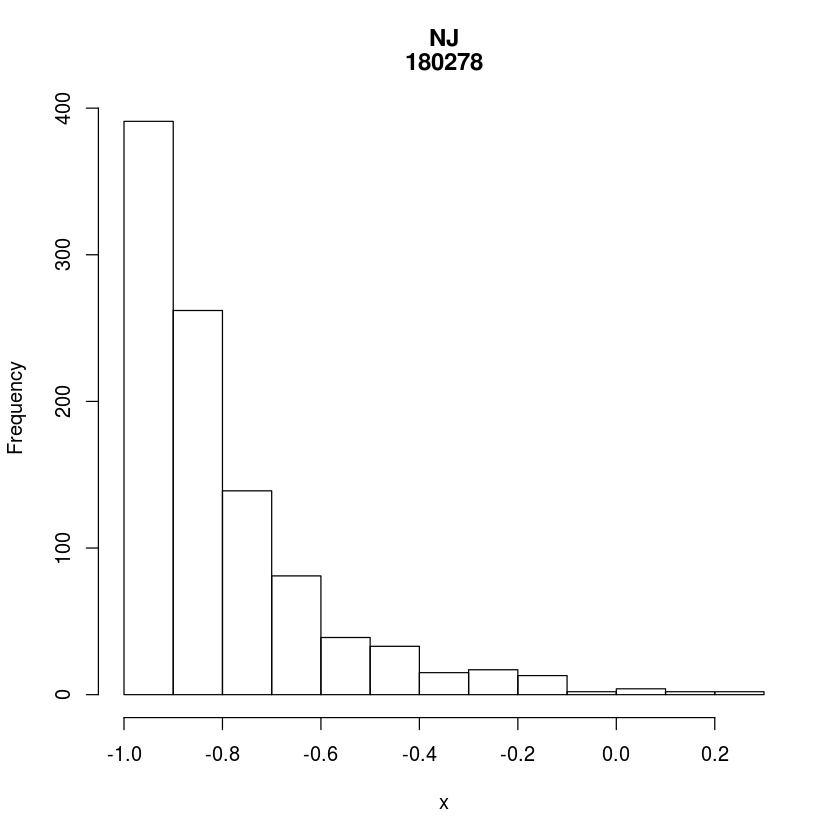

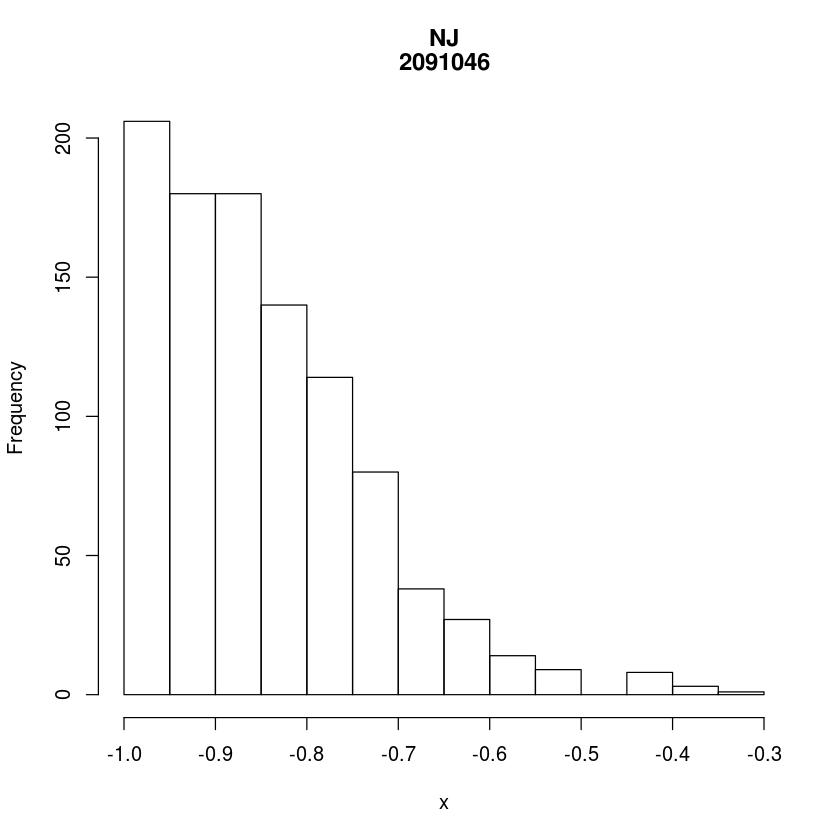

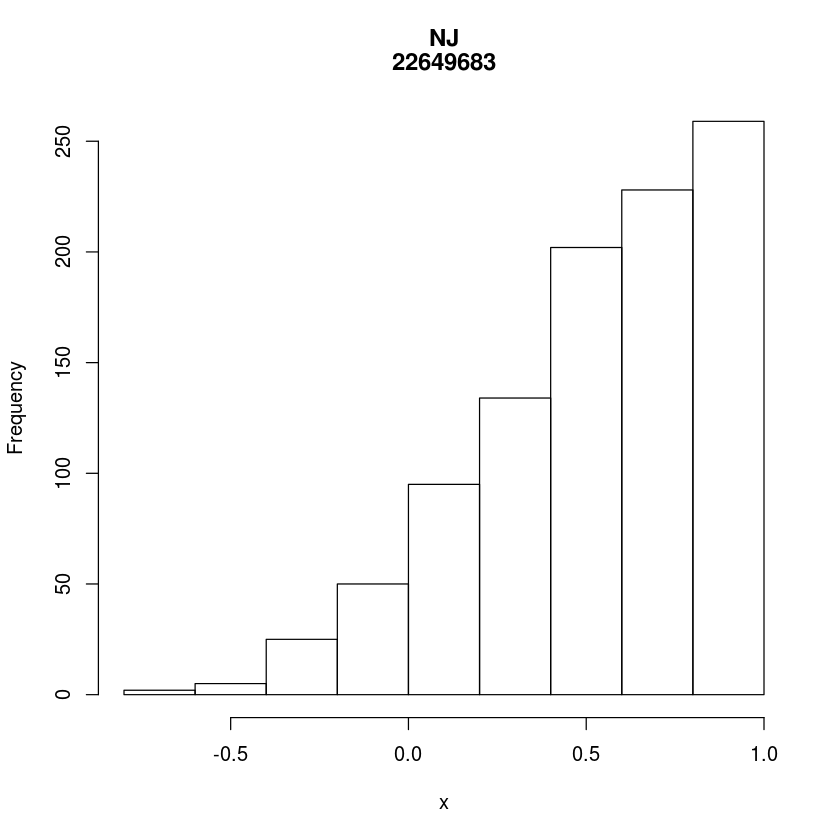

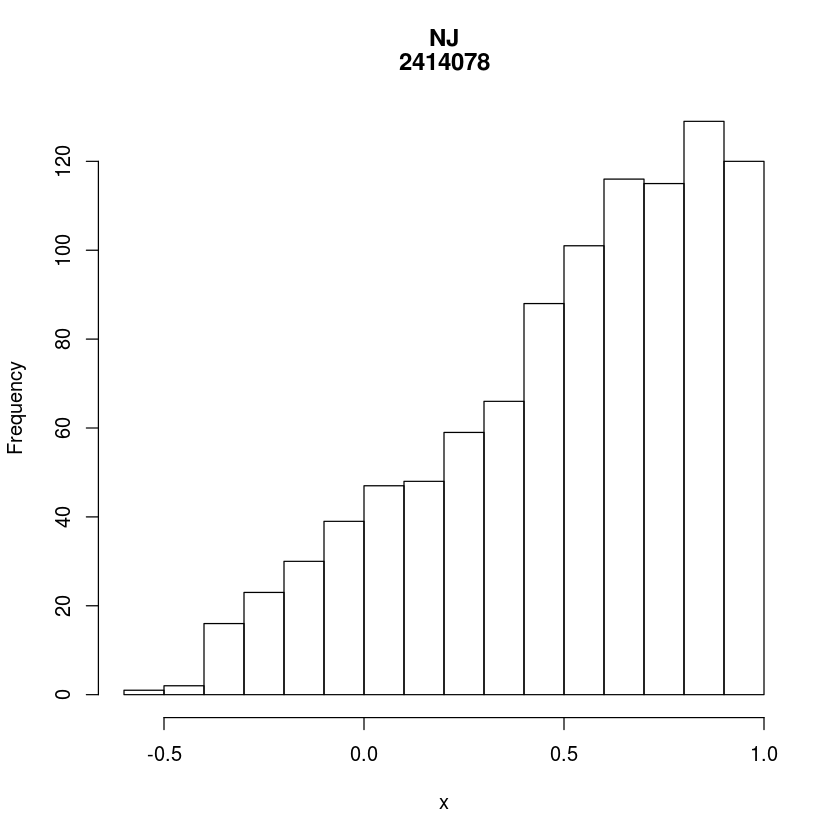

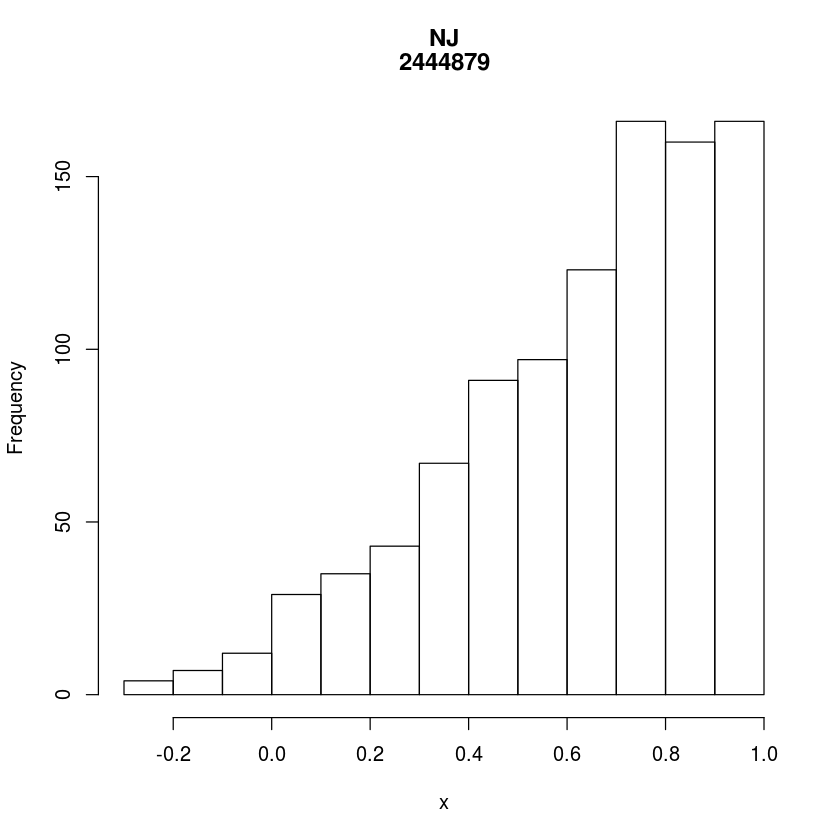

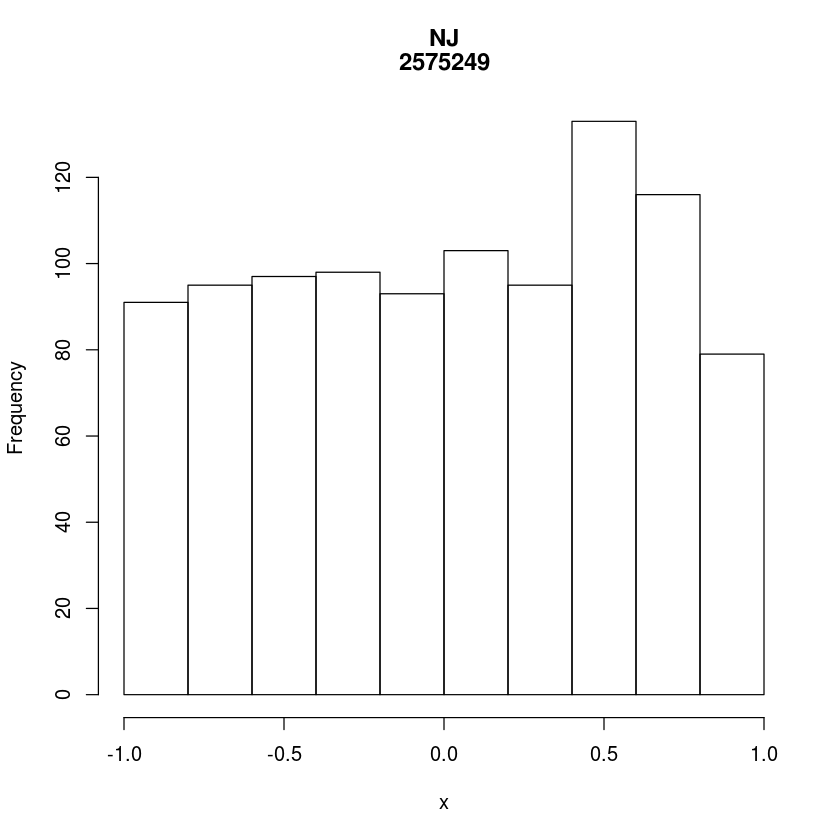

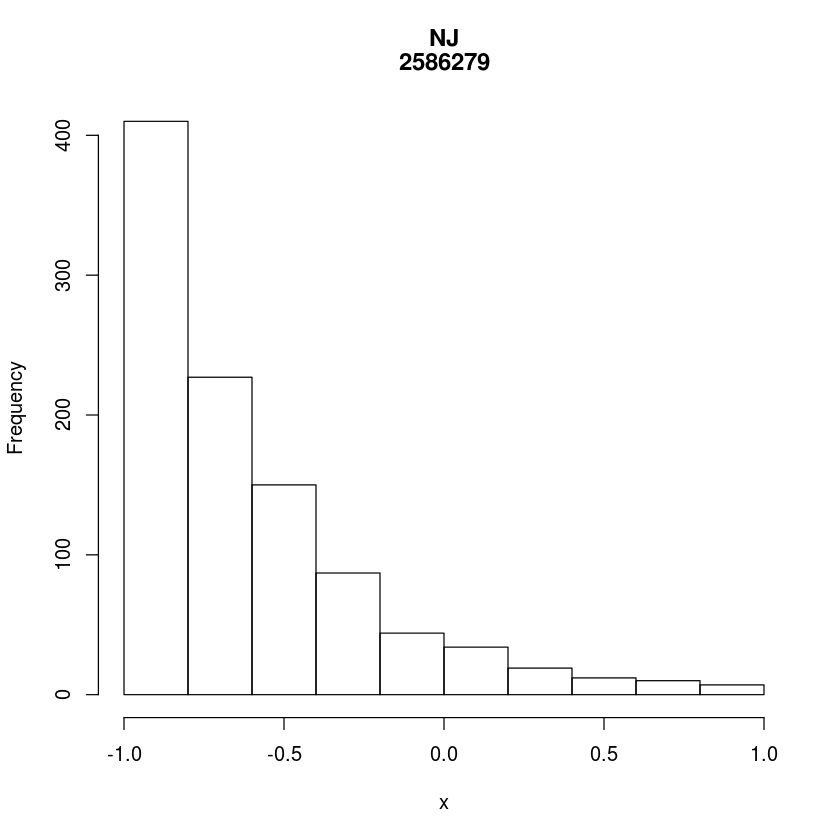

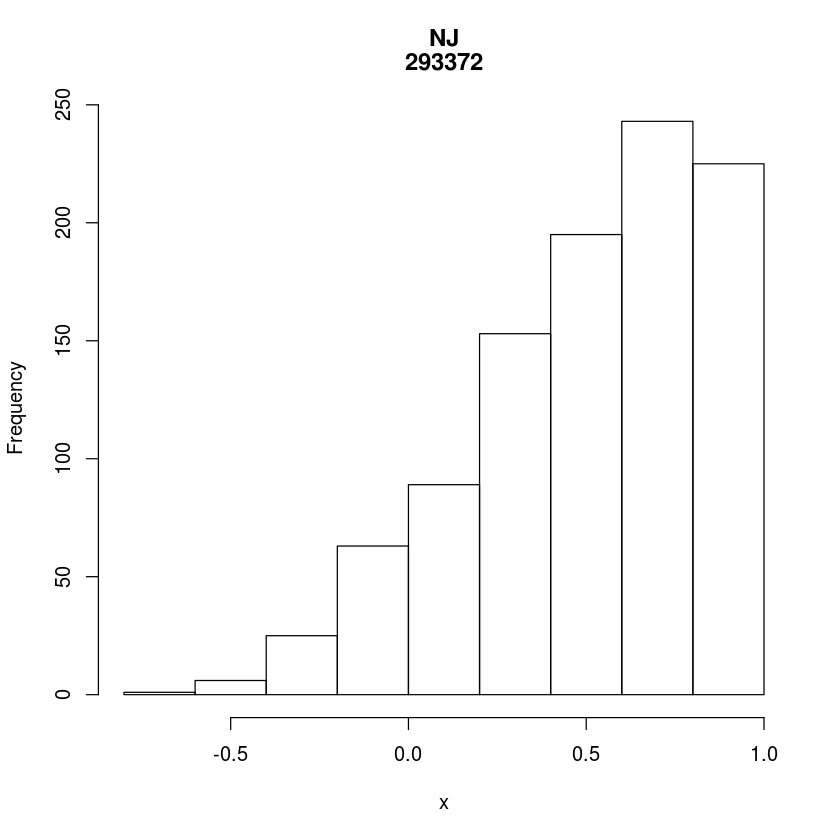

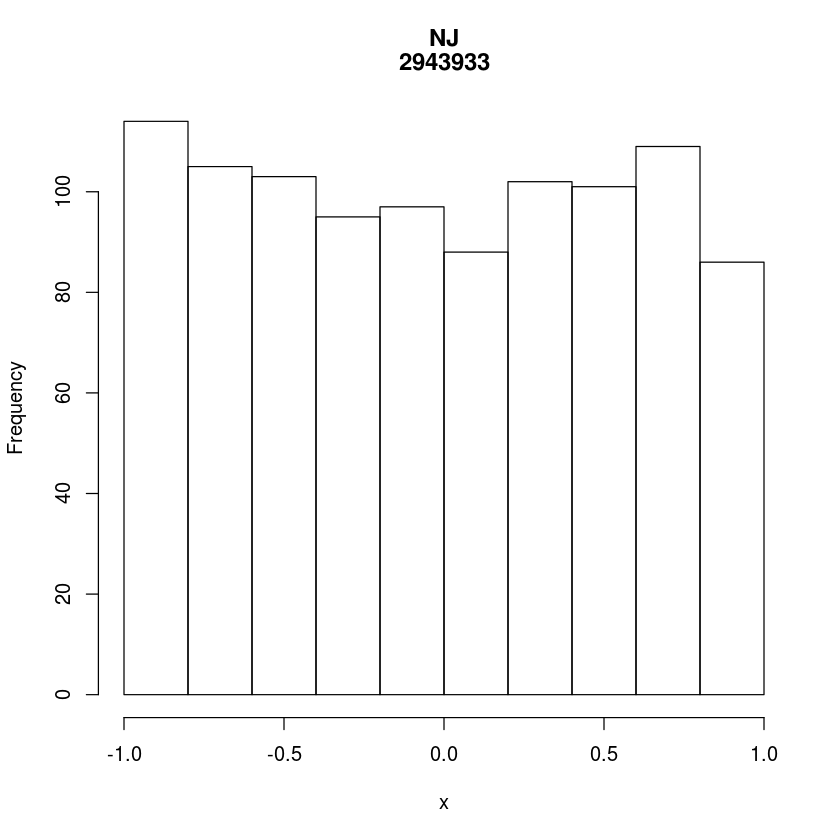

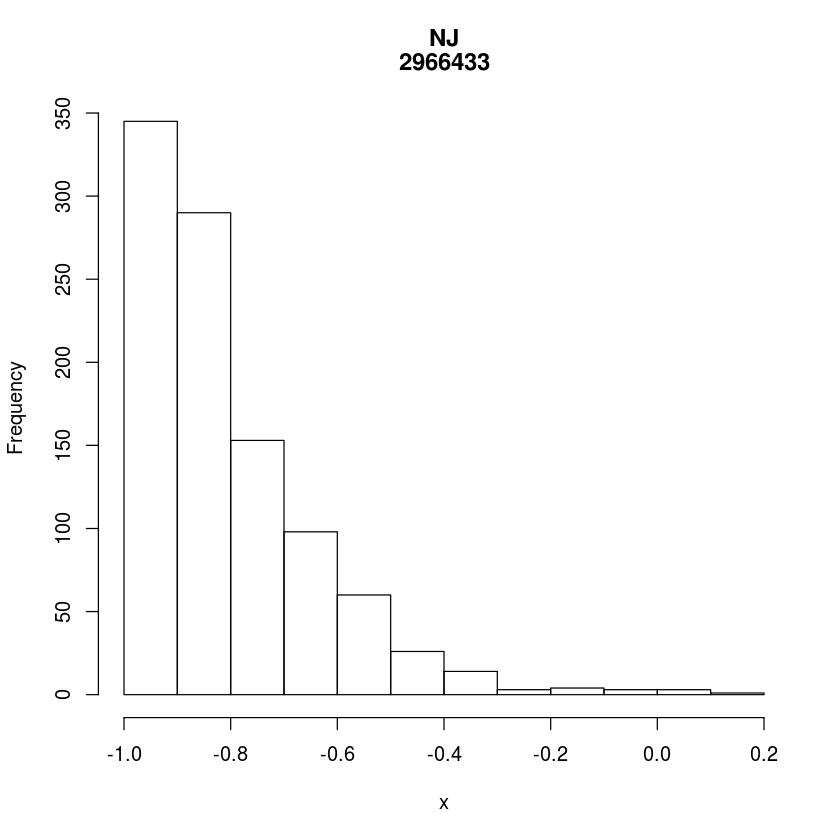

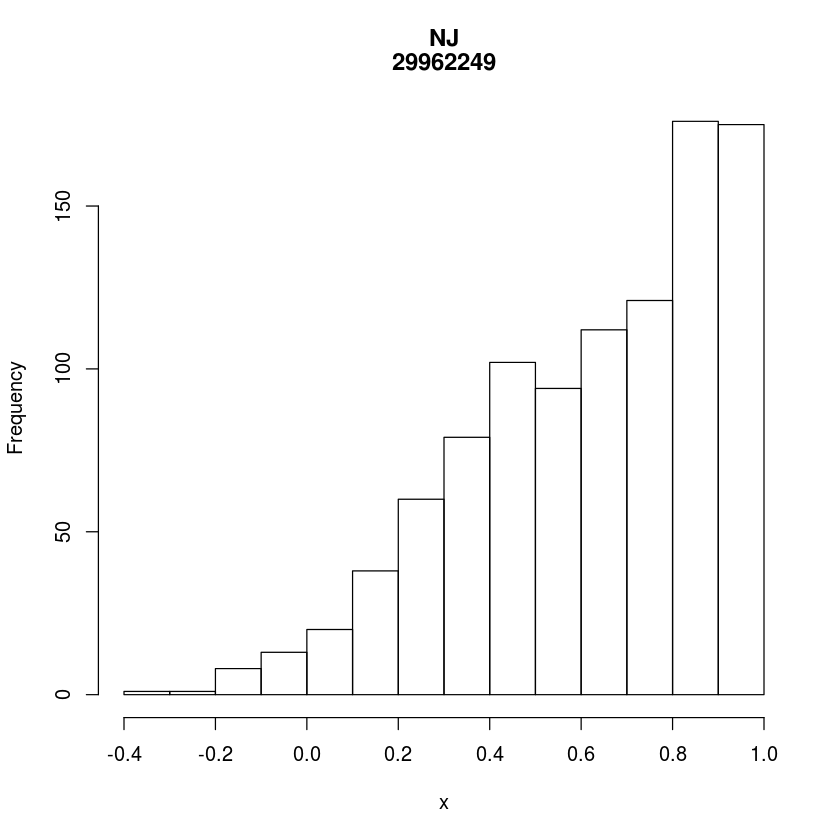

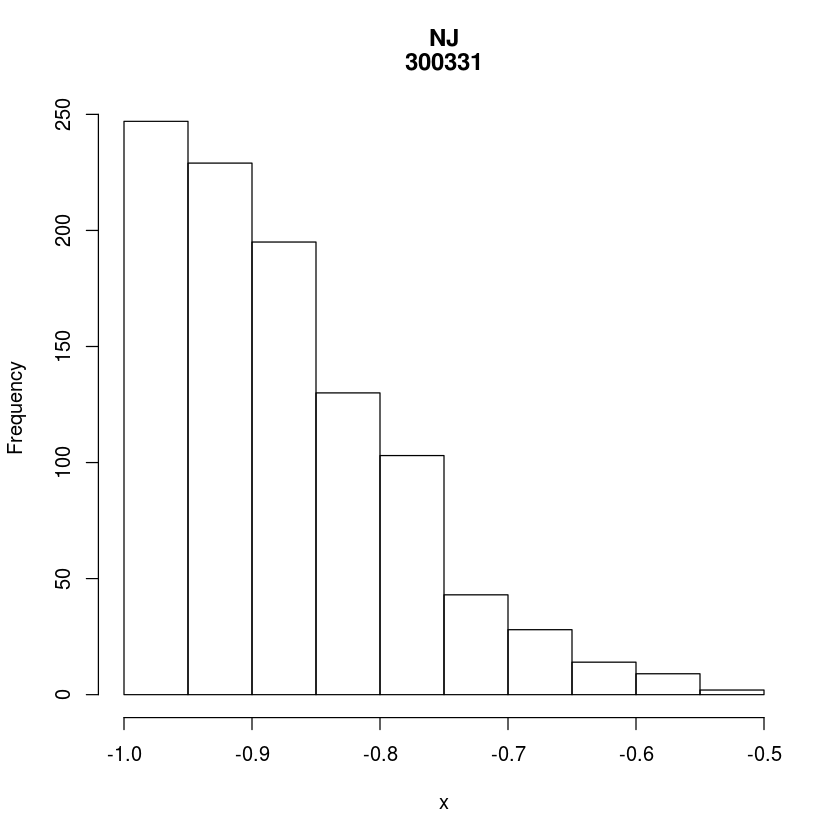

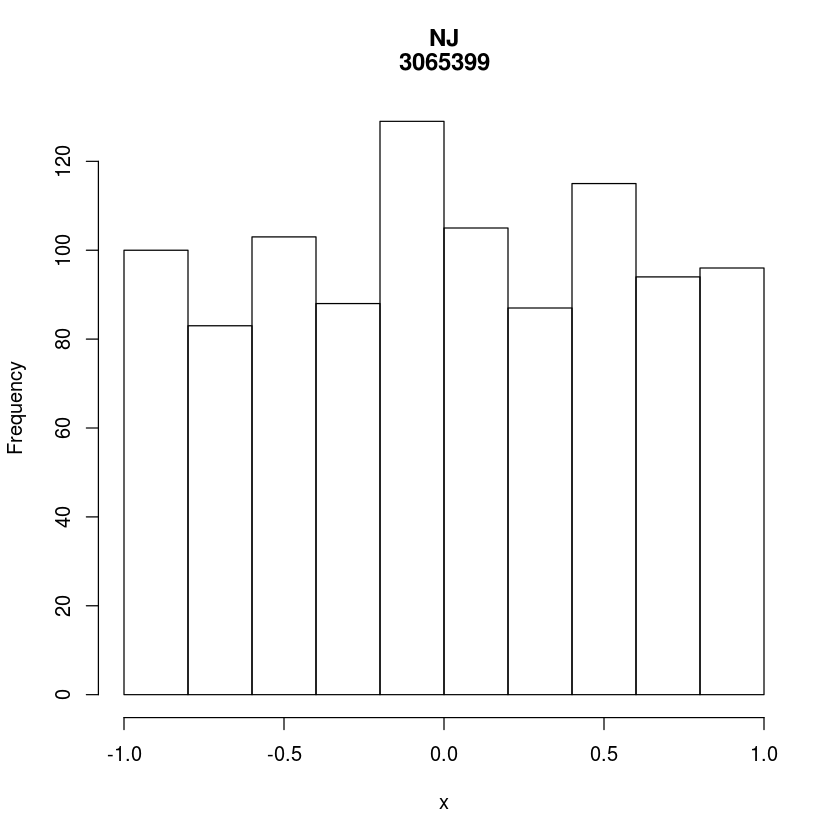

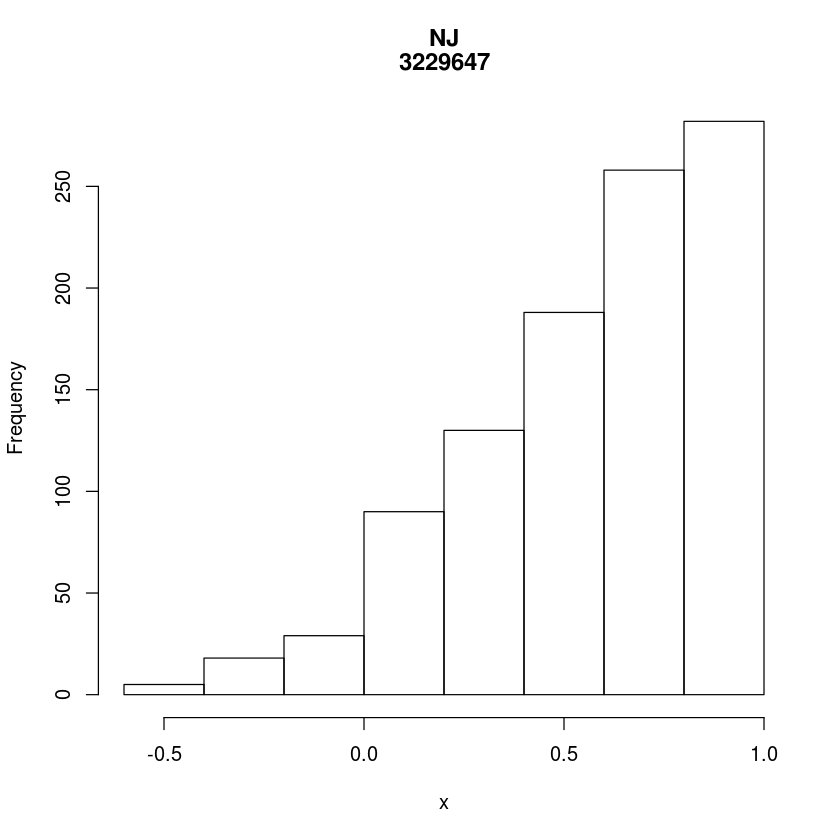

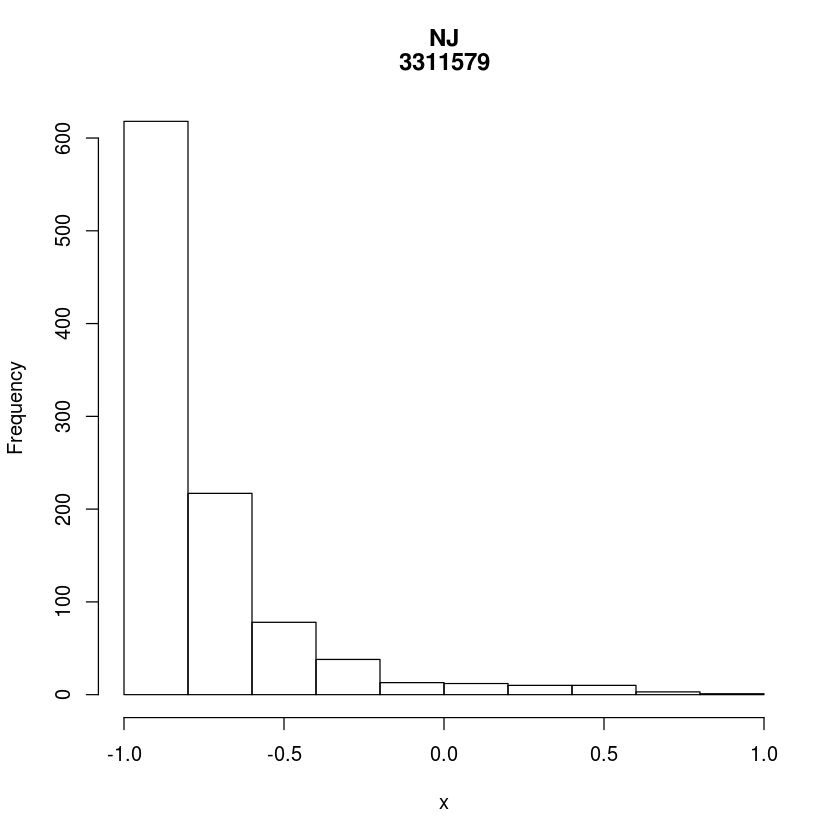

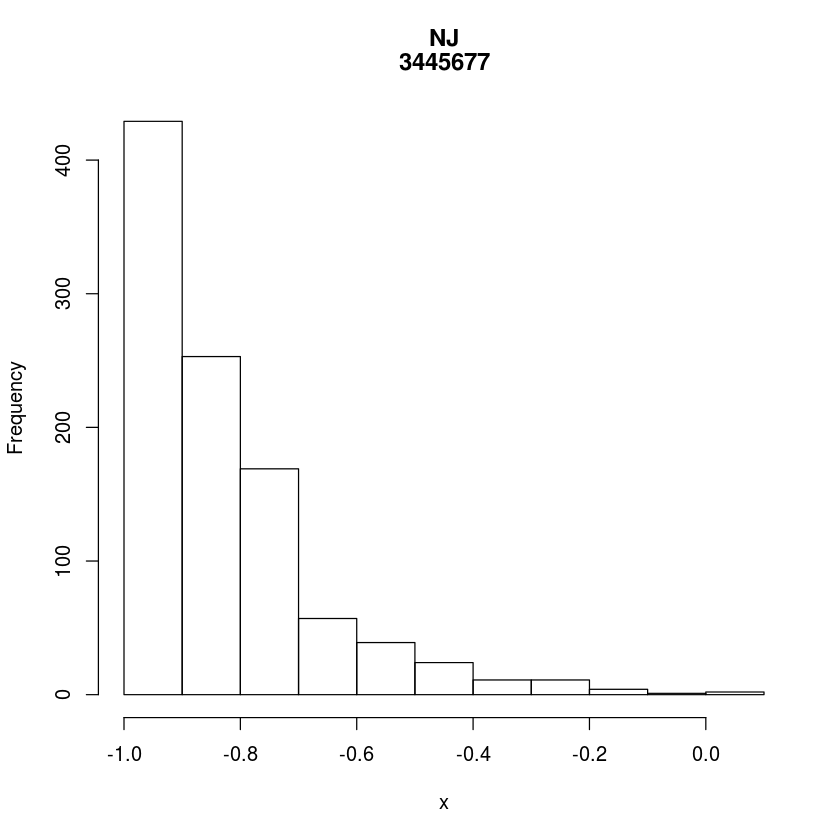

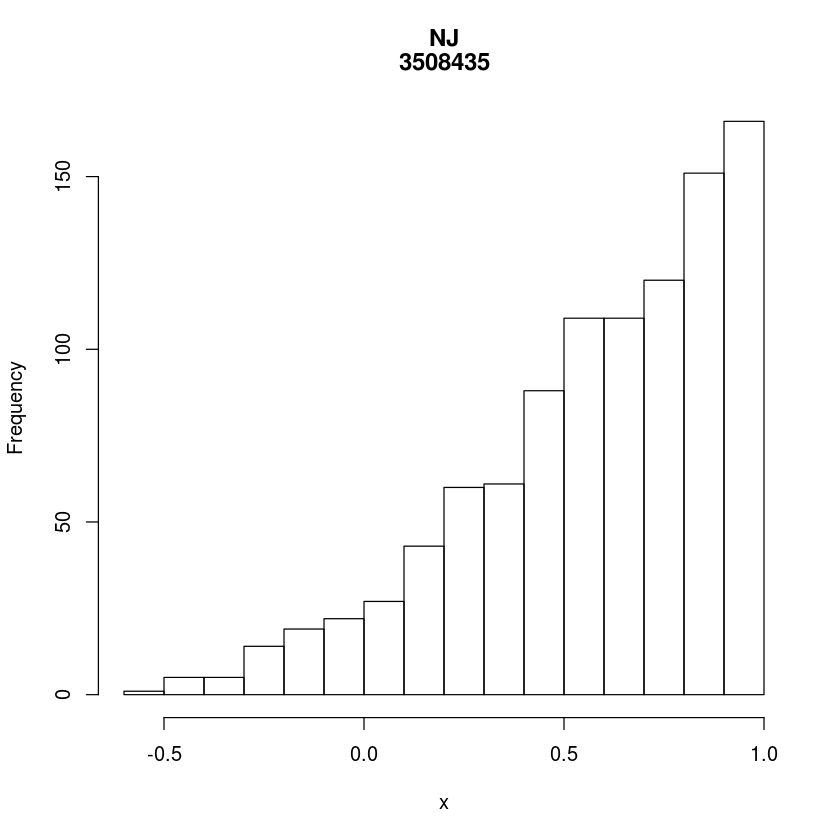

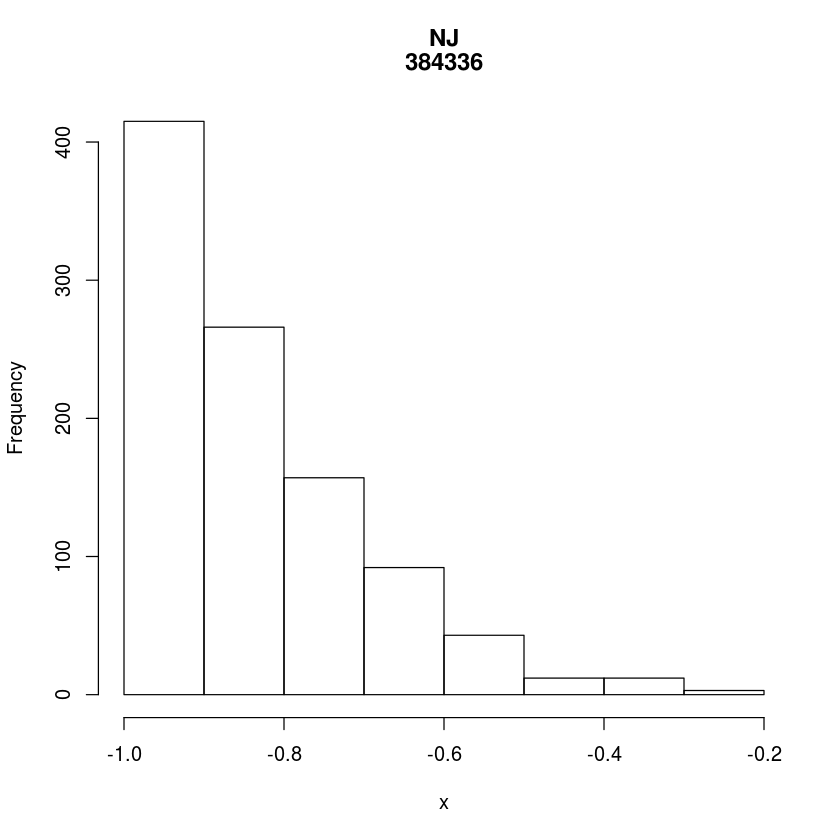

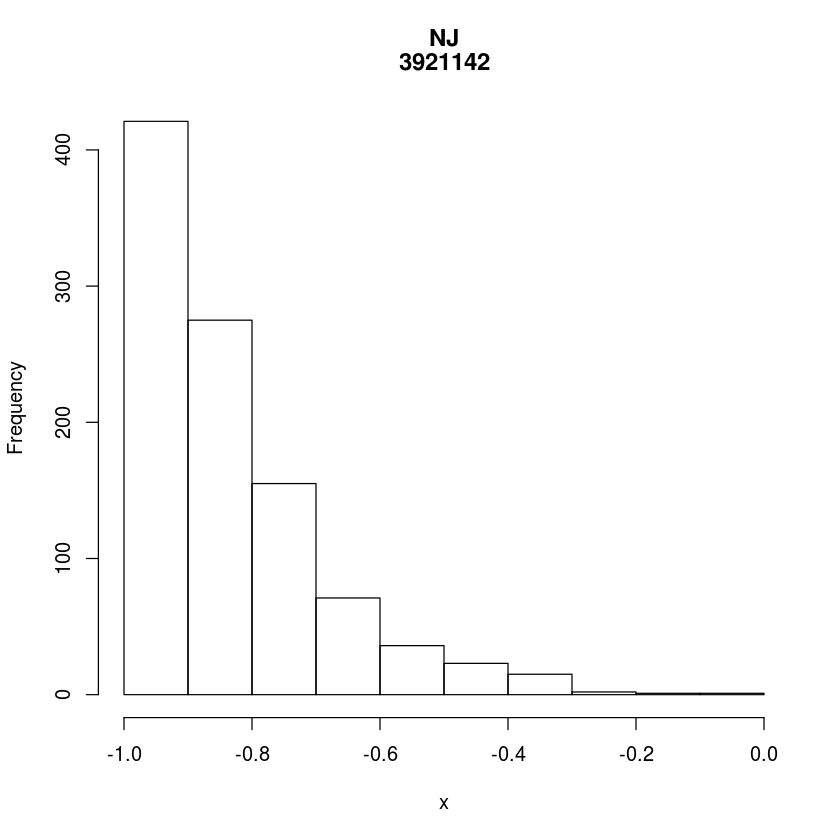

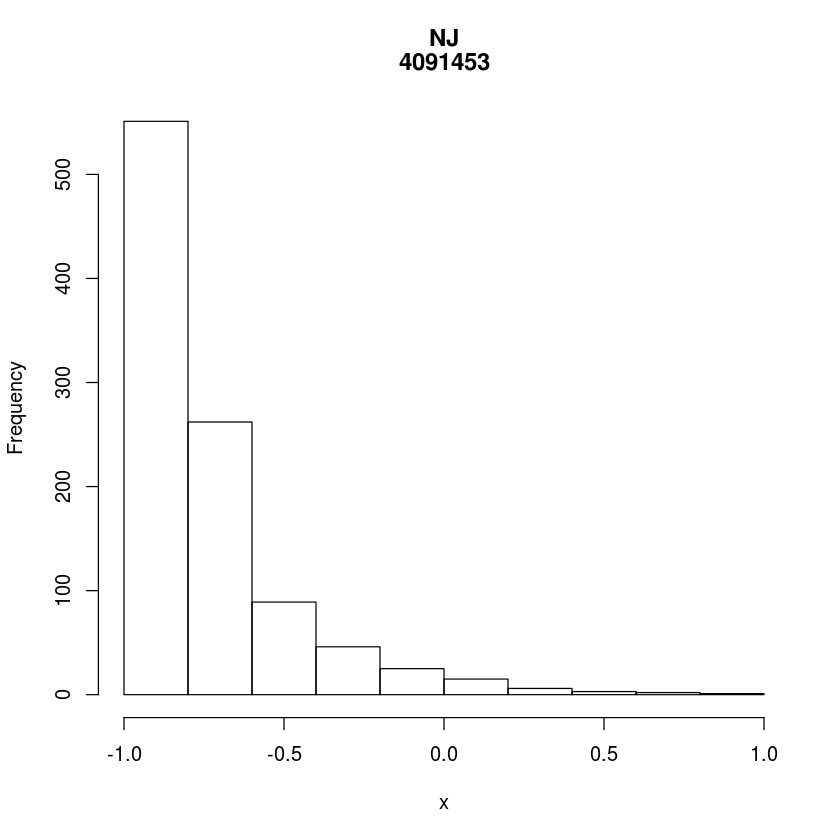

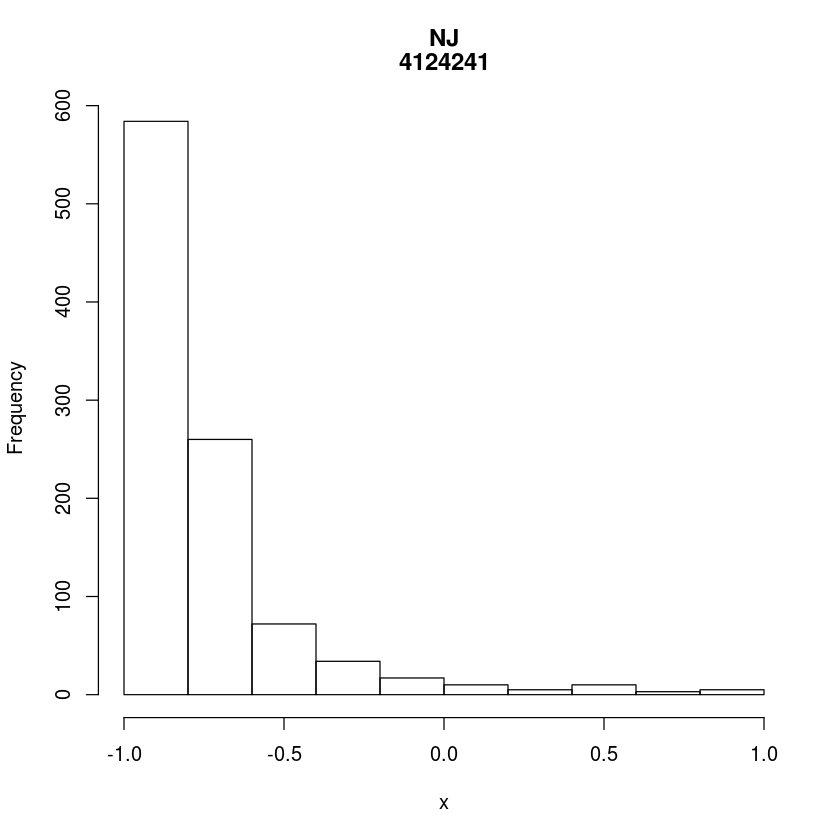

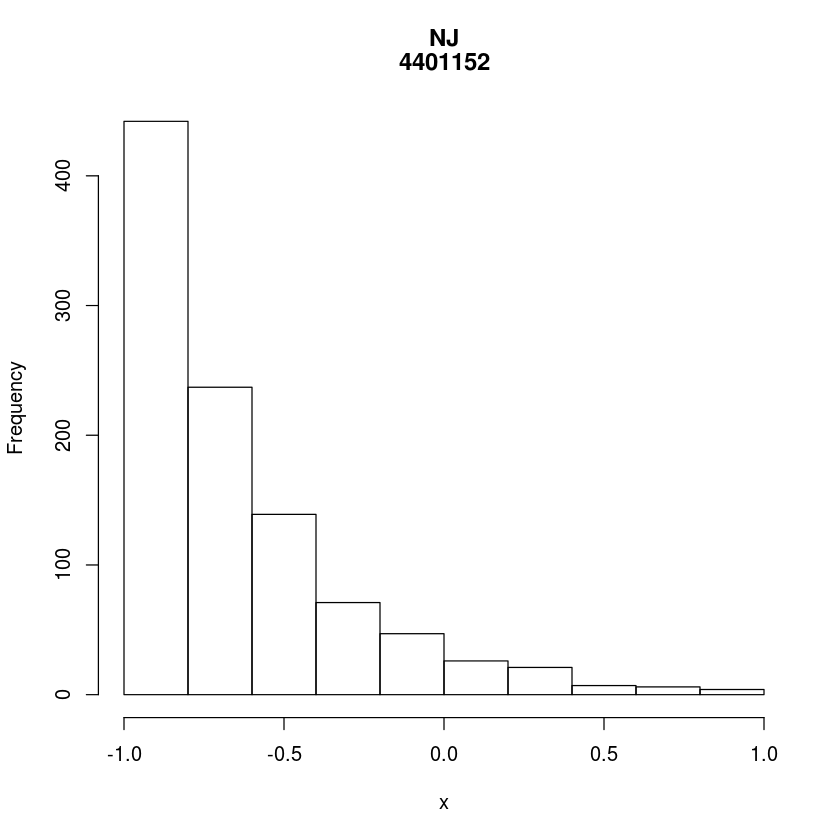

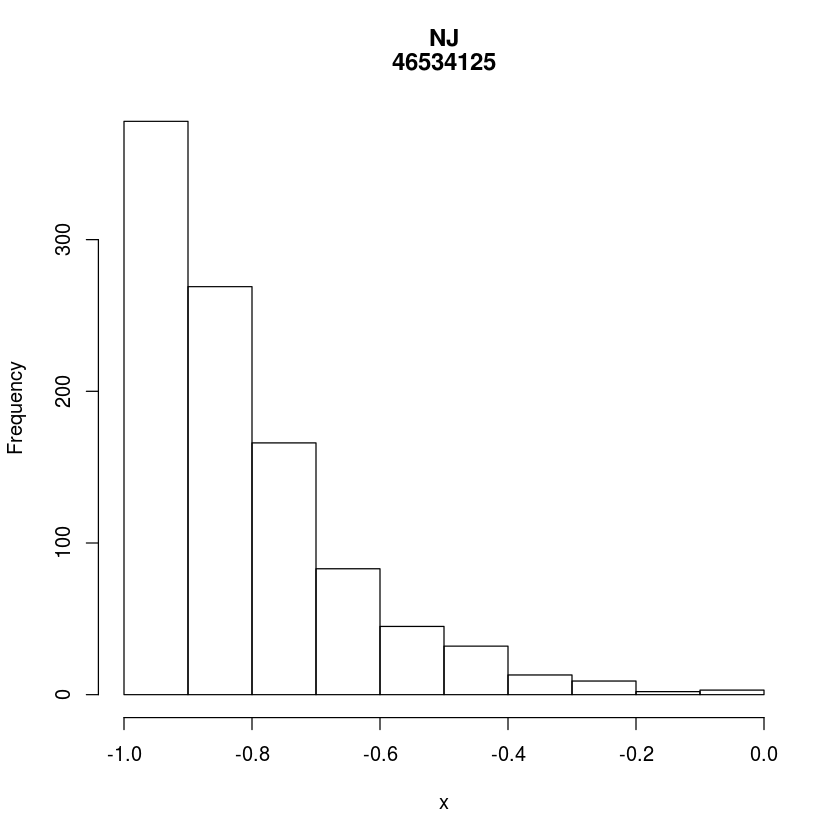

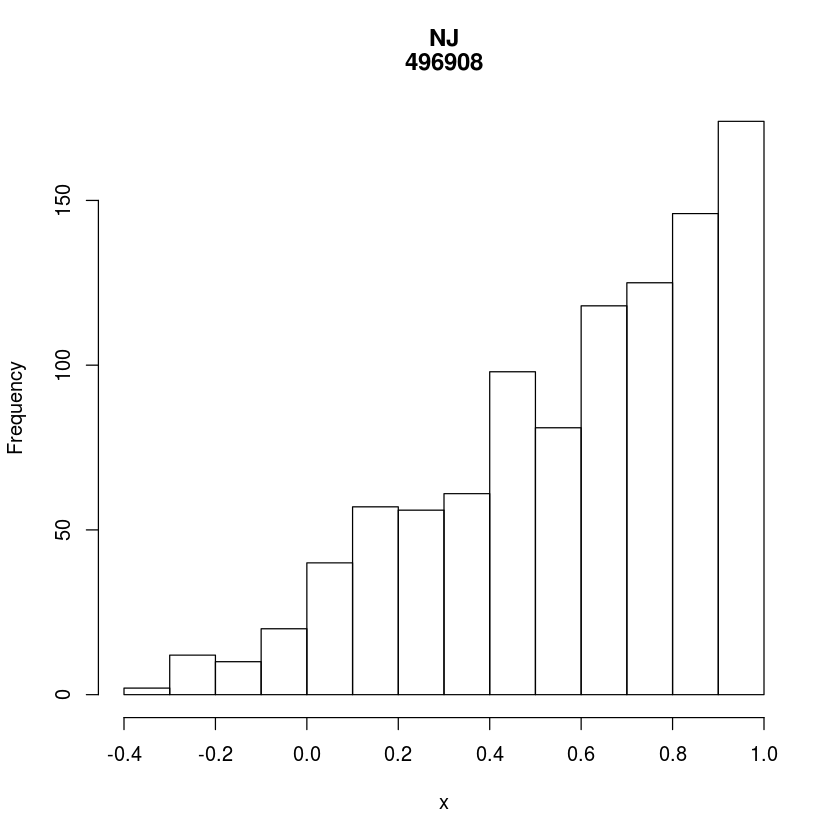

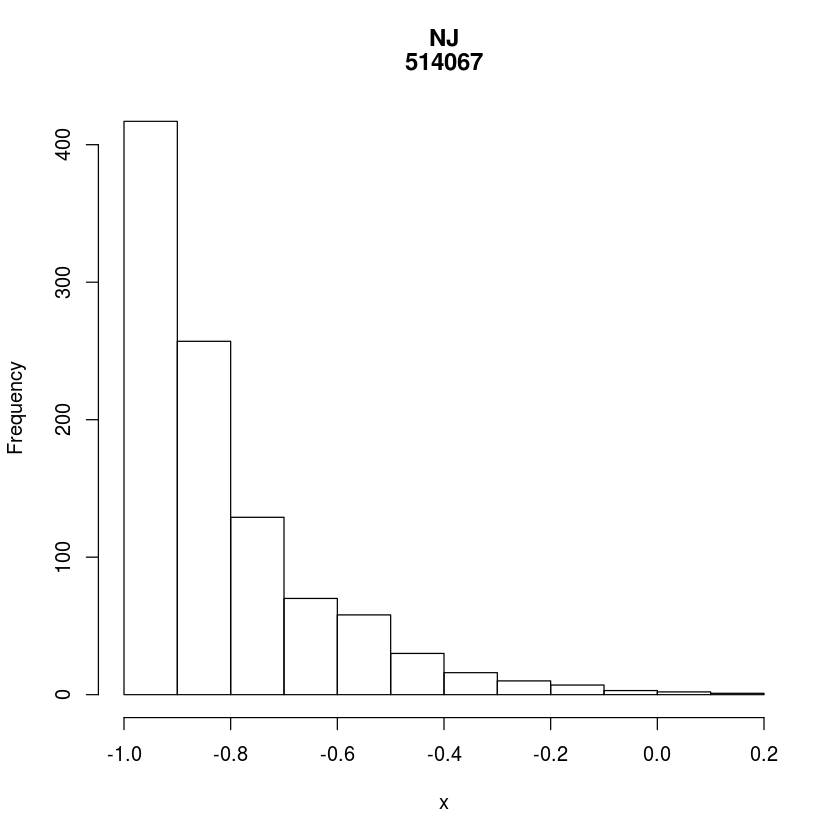

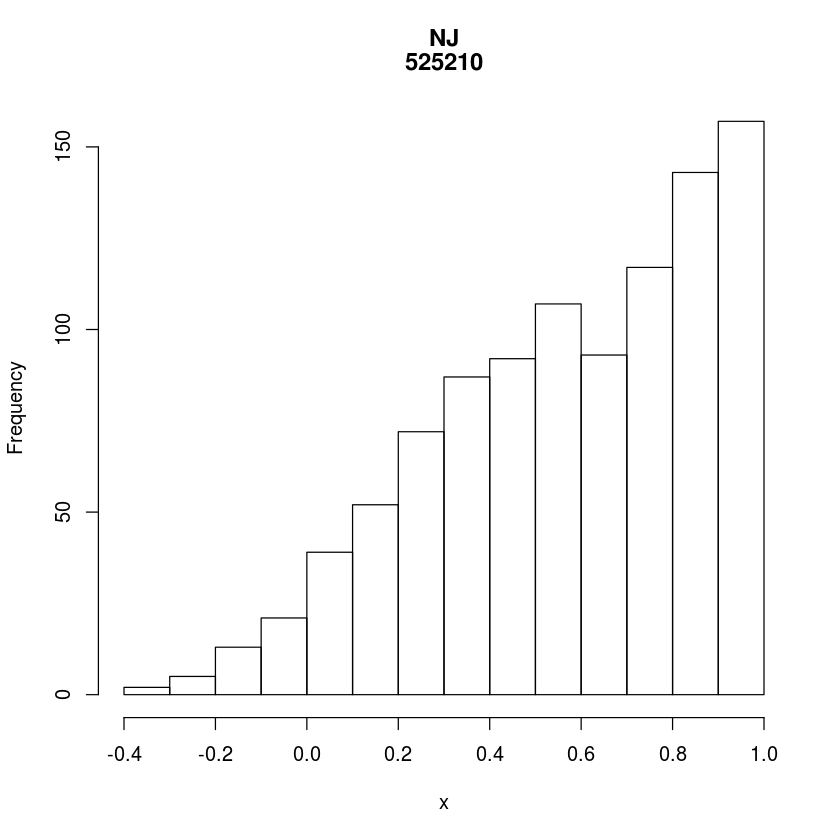

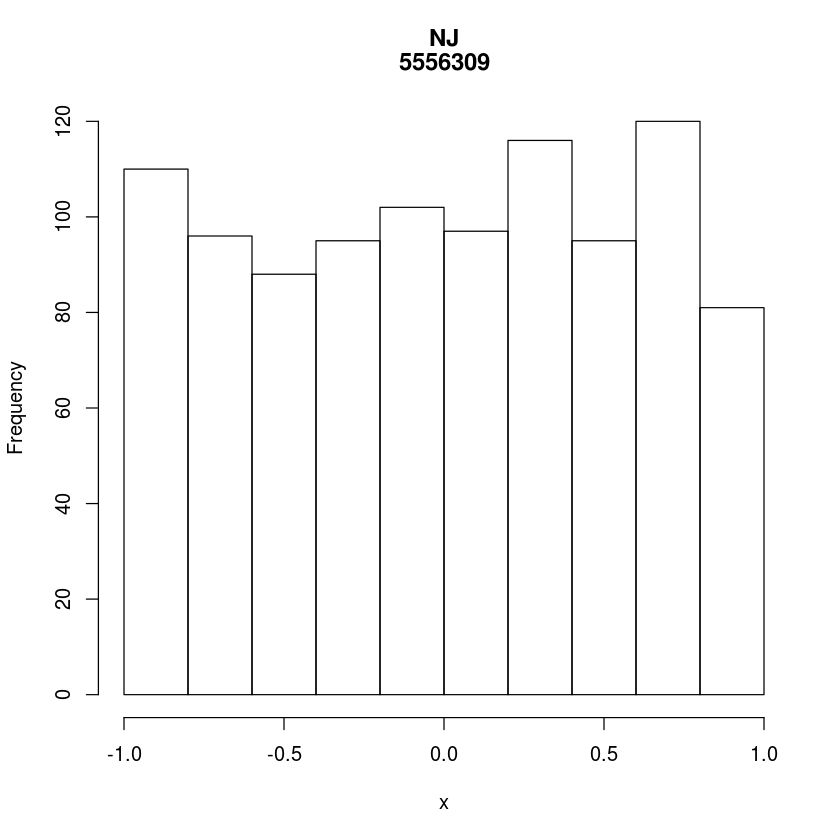

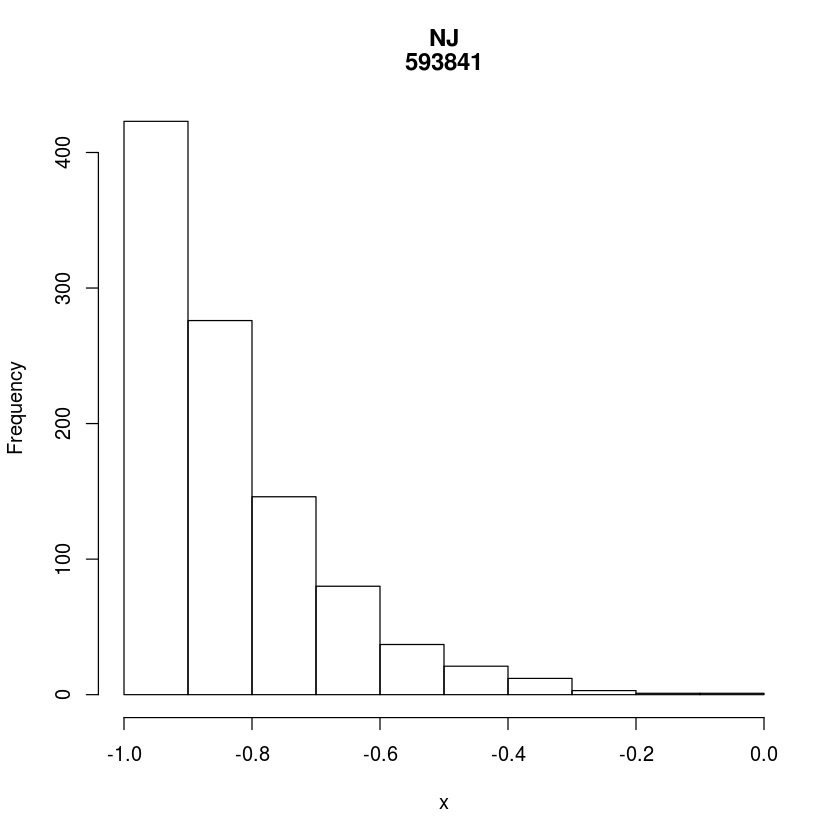

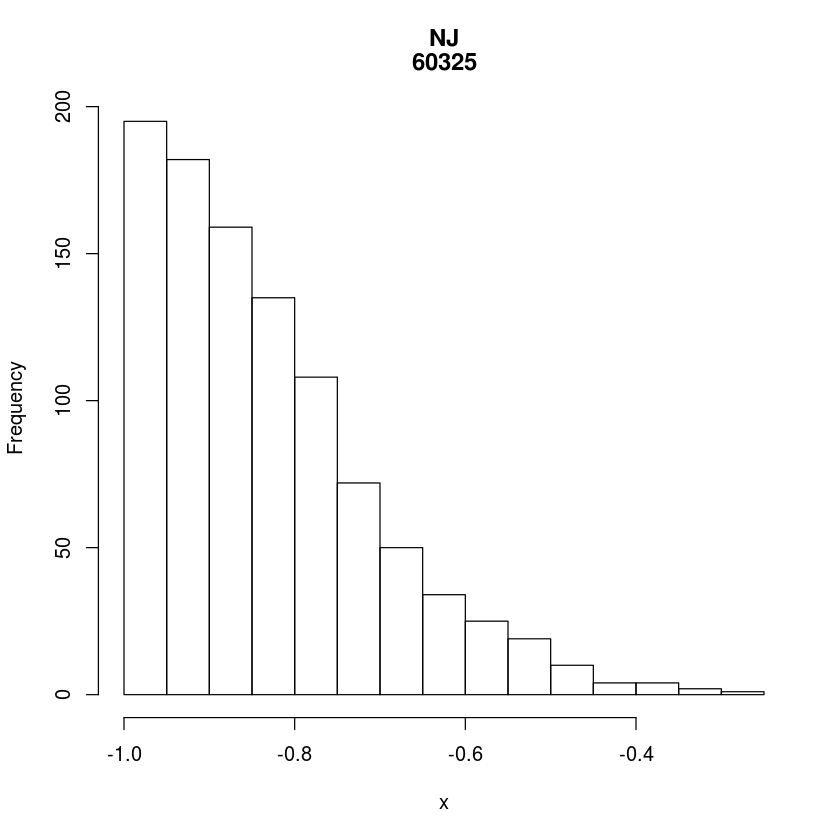

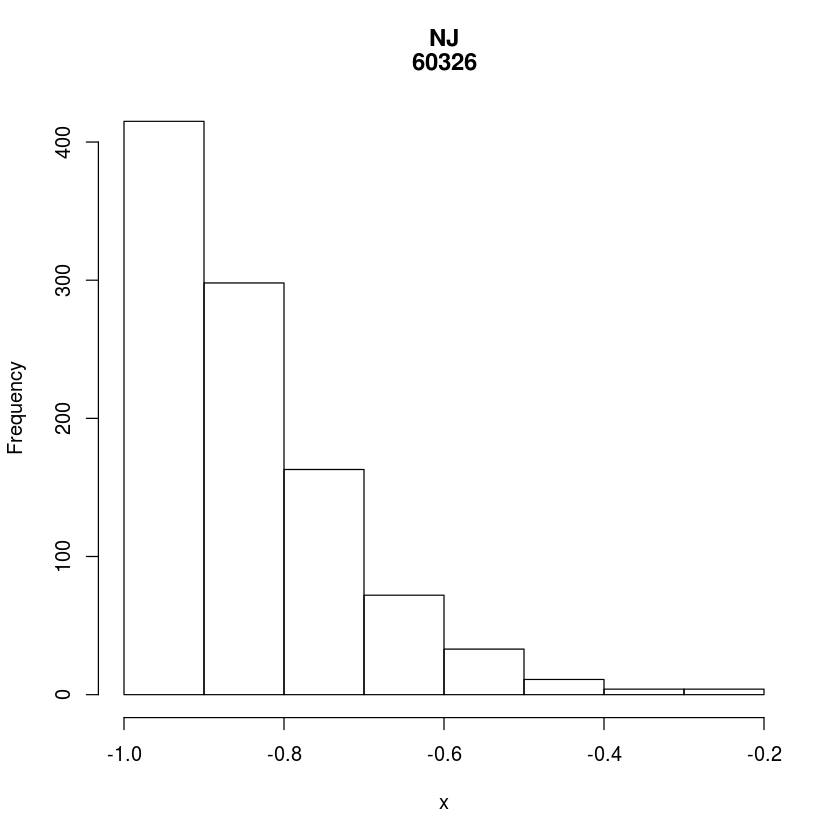

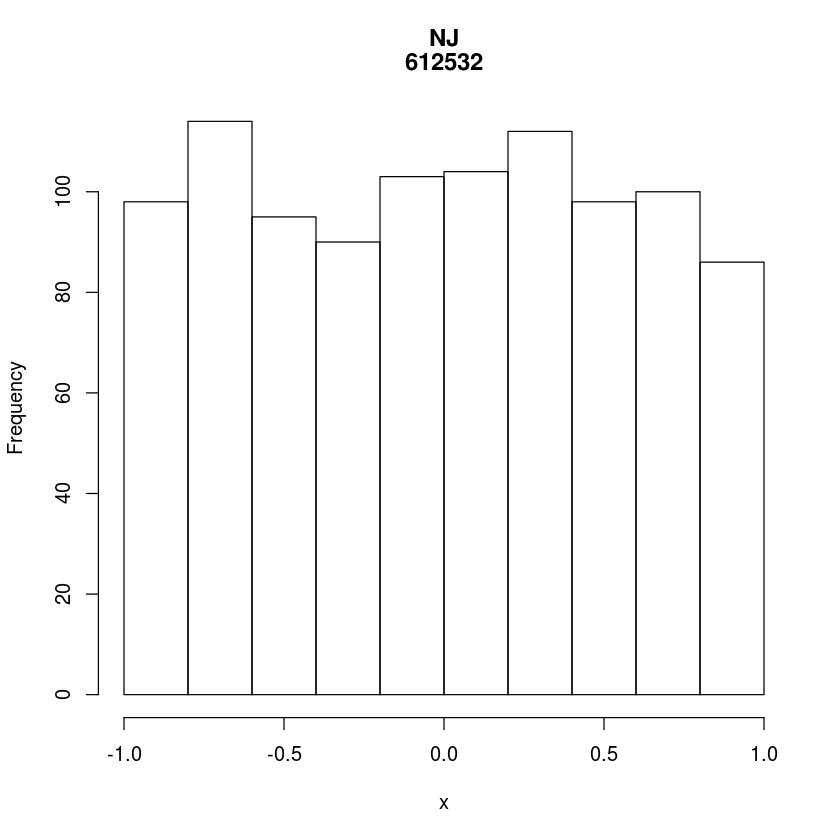

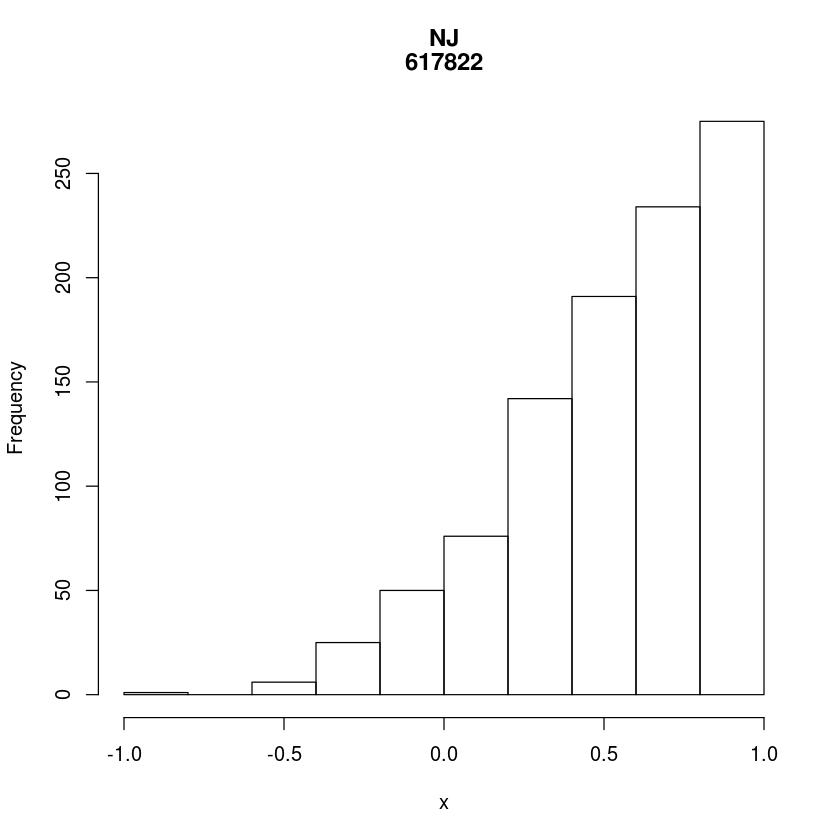

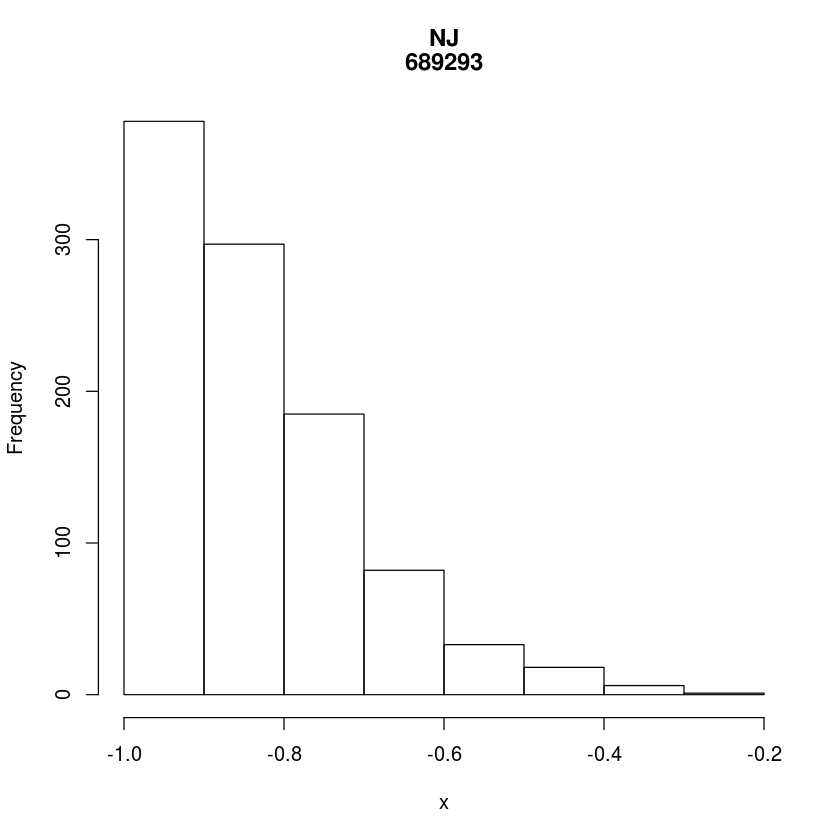

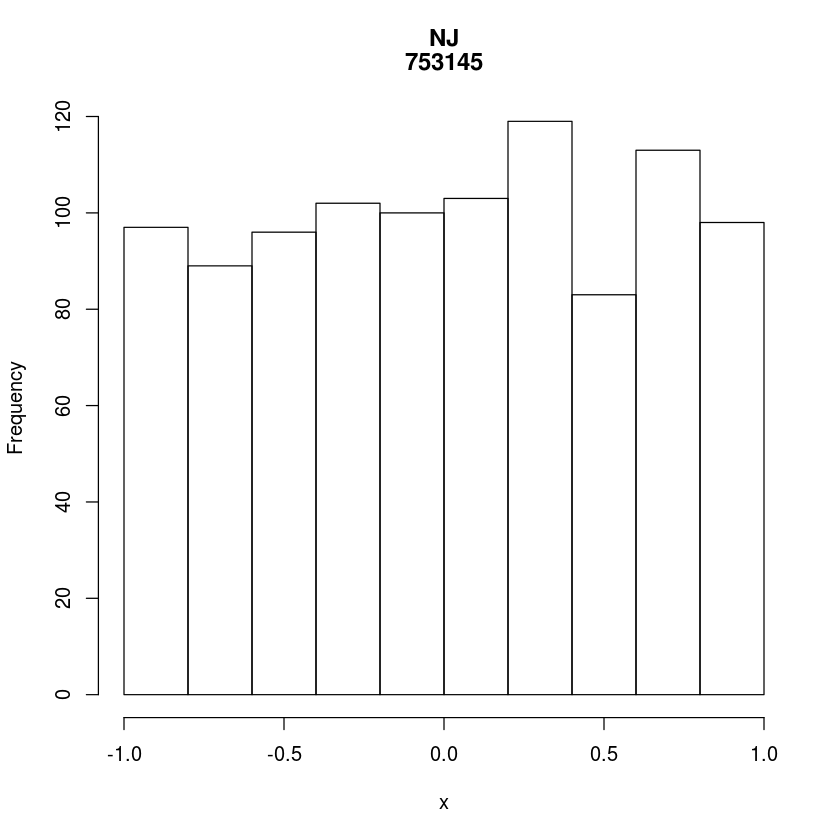

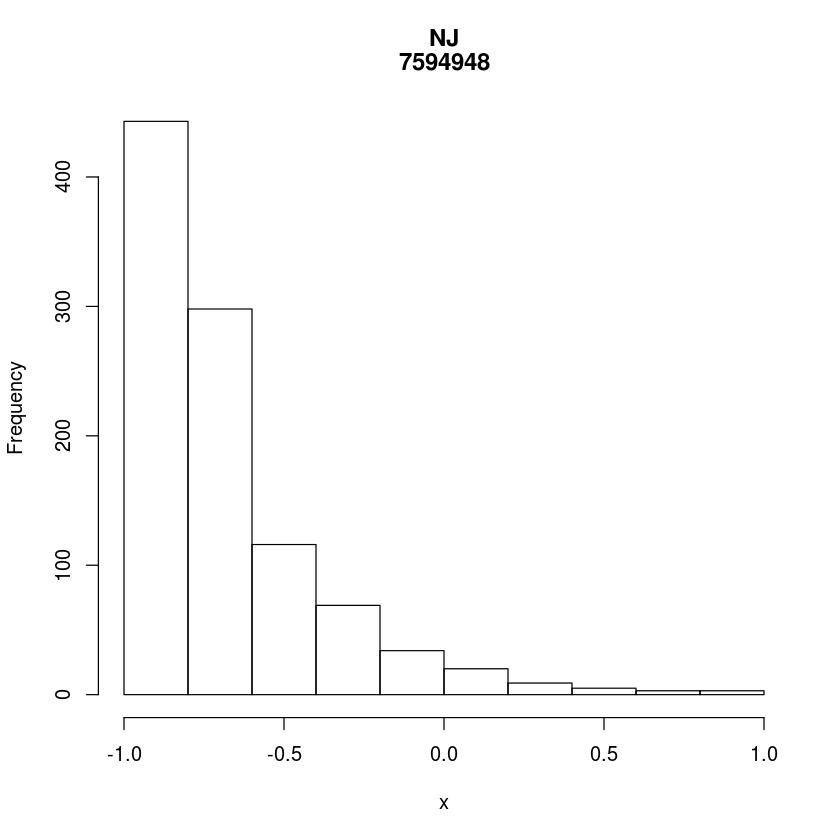

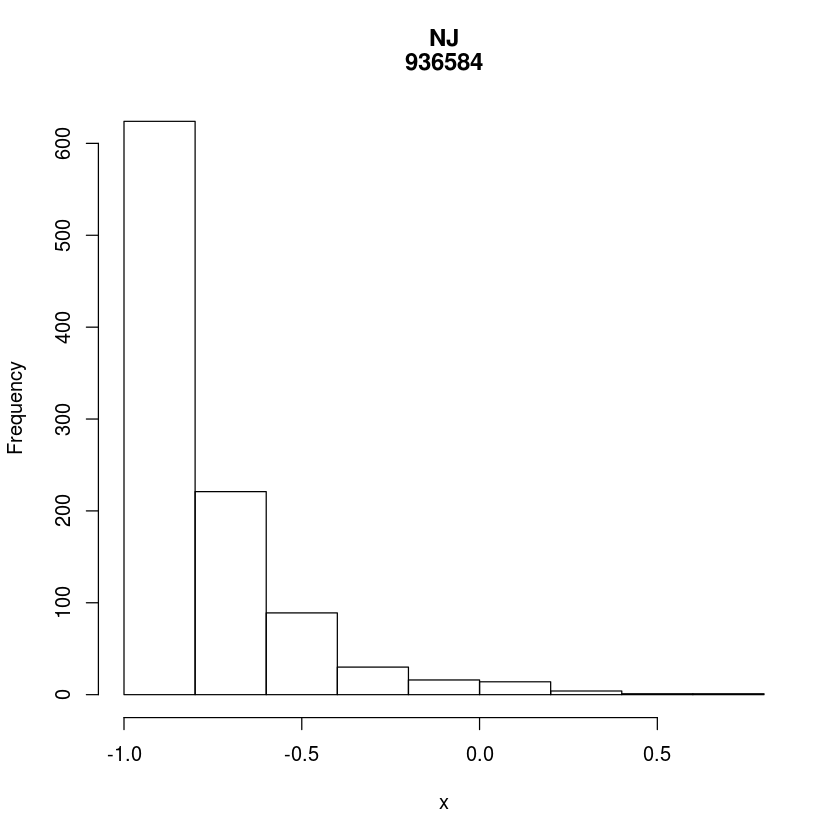

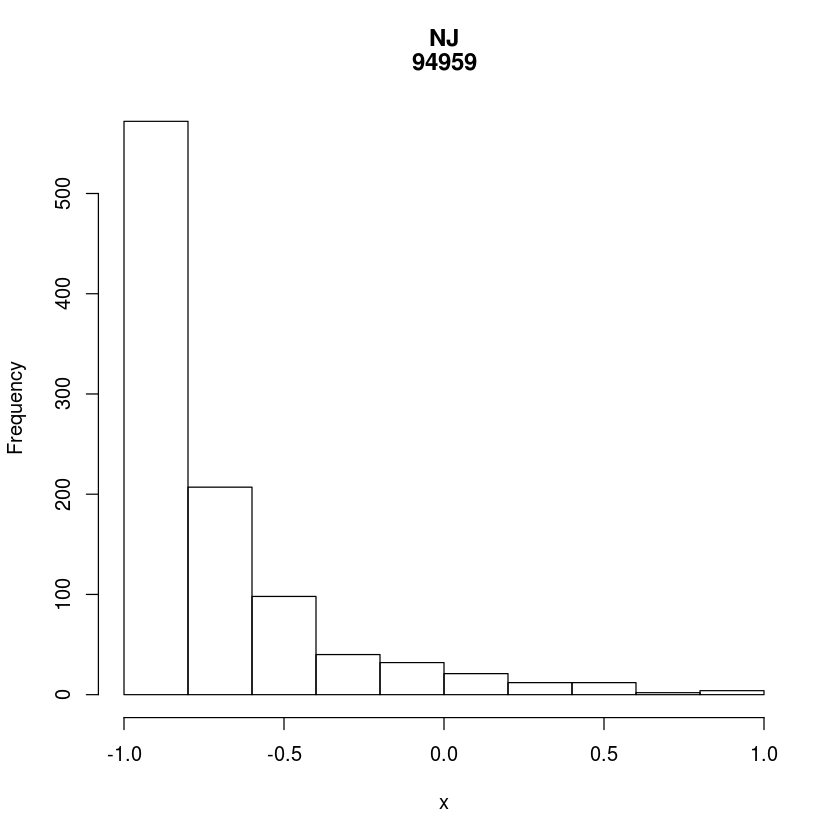

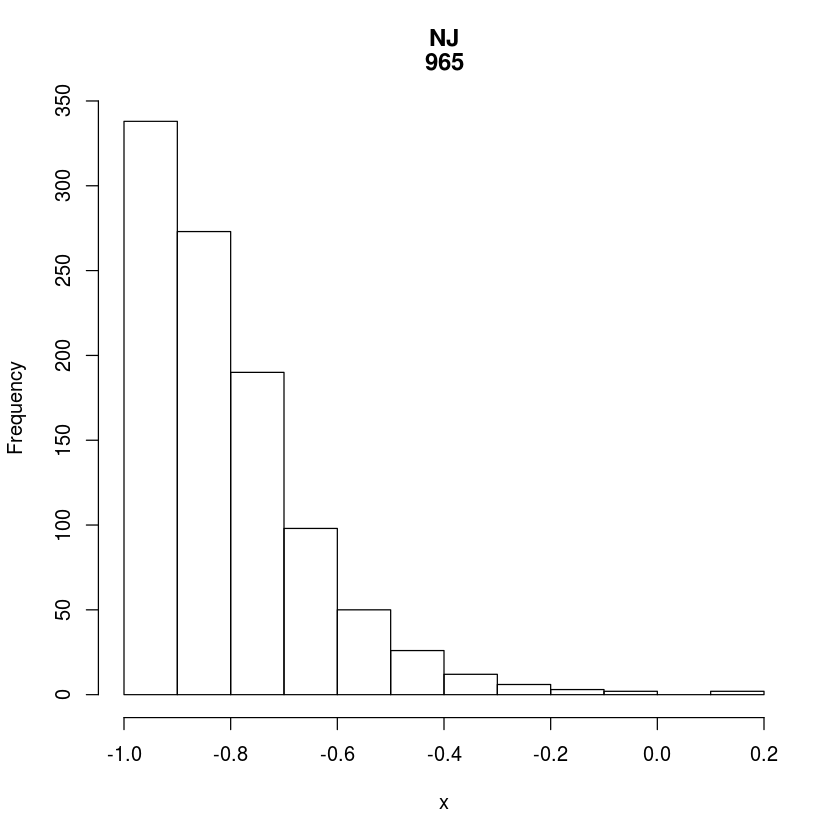

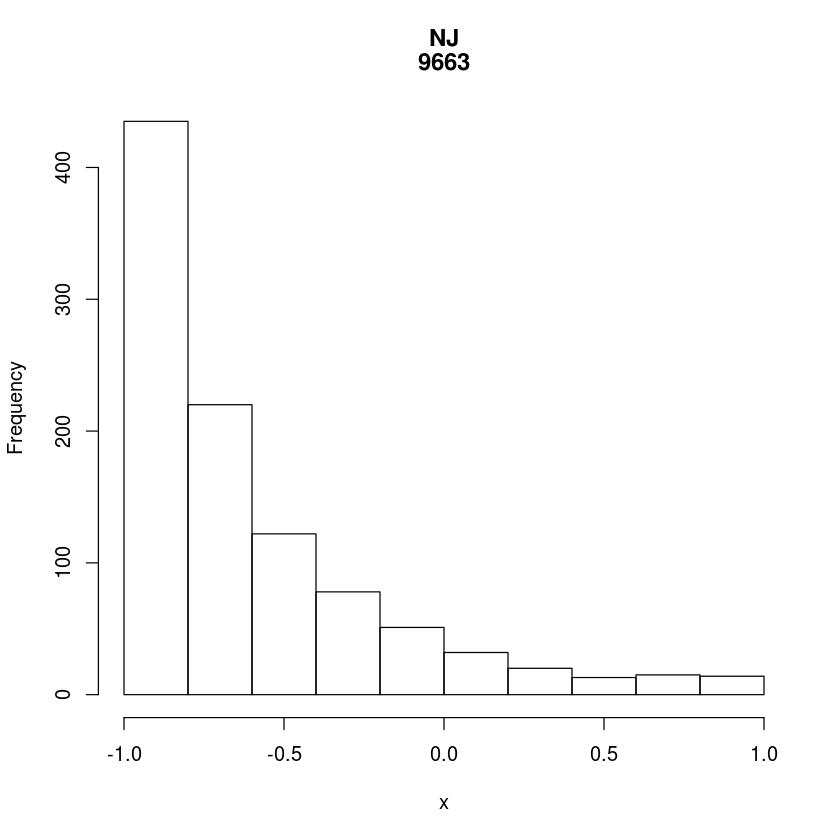

[,1]                                                                
breaks   -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0          
counts   91, 105, 98, 104, 109, 93, 100, 115, 87, 98                         
density  0.455, 0.525, 0.490, 0.520, 0.545, 0.465, 0.500, 0.575, 0.435, 0.490
mids     -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9               
xname    x                                                                   
equidist TRUE                                                                
         [,2]                                                                                         
breaks   -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0          
counts   1, 4, 9, 17, 24, 32, 40, 56, 71, 82, 107, 123, 140, 145, 149                                 
density  0.01, 0.04, 0.09, 0.17, 0.24, 0.32, 0.40, 0.56, 0.71, 0.82, 1.07, 1.23, 1.40, 1.45, 1.49     
mids     -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95
xname    x                                                                                            
equidist TRUE                                                                                         
         [,3]                                                                                                          
breaks   -1.00, -0.95, -0.90, -0.85, -0.80, -0.75, -0.70, -0.65, -0.60, -0.55, -0.50, -0.45, -0.40, -0.35, -0.30       
counts   212, 240, 153, 112, 81, 67, 49, 31, 18, 19, 7, 4, 6, 1                                                        
density  4.24, 4.80, 3.06, 2.24, 1.62, 1.34, 0.98, 0.62, 0.36, 0.38, 0.14, 0.08, 0.12, 0.02                            
mids     -0.975, -0.925, -0.875, -0.825, -0.775, -0.725, -0.675, -0.625, -0.575, -0.525, -0.475, -0.425, -0.375, -0.325
xname    x                                                                                                             
equidist TRUE                                                                                                          
         [,4]                                                                
breaks   -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0          
counts   573, 245, 96, 43, 19, 12, 4, 3, 3, 2                                
density  2.865, 1.225, 0.480, 0.215, 0.095, 0.060, 0.020, 0.015, 0.015, 0.010
mids     -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9               
xname    x                                                                   
equidist TRUE                                                                
         [,5]                                                                                  
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3        
counts   374, 256, 144, 105, 45, 26, 23, 14, 6, 3, 2, 0, 2                                     
density  3.74, 2.56, 1.44, 1.05, 0.45, 0.26, 0.23, 0.14, 0.06, 0.03, 0.02, 0.00, 0.02          
mids     -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25
xname    x                                                                                     
equidist TRUE                                                                                  
         [,6]                                                                                         
breaks   -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0          
counts   1, 4, 10, 19, 23, 53, 50, 48, 67, 77, 106, 109, 137, 145, 151                                
density  0.01, 0.04, 0.10, 0.19, 0.23, 0.53, 0.50, 0.48, 0.67, 0.77, 1.06, 1.09, 1.37, 1.45, 1.51     
mids     -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95
xname    x                                                                                            
equidist TRUE                                                     

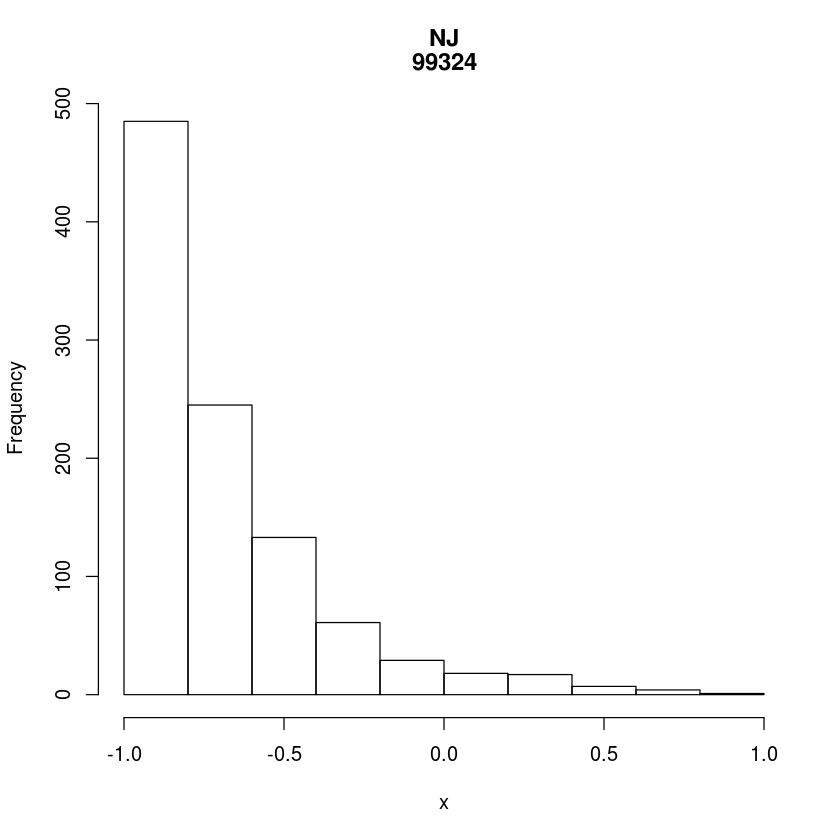

In [237]:
mapply(function(x, y) {
hist(x, main=c("NJ", y[1,4]))}, sNJ, tNJ_f2s)

A biplot of median or mean s vs. the change in allele frequency would be helpful. I’d expect higher s estimates for larger frequency changes, though this is also somewhat dependent on initial allele frequencies (perhaps color the dots by initial allele freq?). 



In [21]:
#calculate mean s value and quantile
meansNJ=t(as.data.frame(mapply(function(x, y) {
cbind(mean(x), quantile(x, c(0.025, 0.975)), as.character(y[1,4]))}, sNJ, tNJ_f2s)))
row.names(meansNJ)=NULL
meansNJ=as.data.frame(meansNJ)
meansNJ=meansNJ[-c(1,5)]
colnames(meansNJ)=c("mean", "lower", "upper", "SNP")
head(meansNJ)


mean               lower              upper              SNP     
1 0.0280526365679689 -0.955936251359525 0.949203533516265  11932   
2 0.735212665736271  0.198476919904351  0.990304856095463  1241213 
3 -0.943232813754228 -0.998929938301444 -0.798114521428943 1396110 
4 -0.913133553331436 -0.996991593856364 -0.679784961044788 1484586 
5 -0.929278460470849 -0.999148698989302 -0.74316808860749  14993622
6 0.773020427187932  0.335912260692567  0.991124693769962  1661413

In [24]:
write.csv(meansNJ, file="/data/sarahgw/WGS/SNPS/All_mylu/snps/svalues_NJ.csv")

In [22]:
#calculate mean s value  and quantile
meansNY=t(as.data.frame(mapply(function(x, y) {
cbind(mean(x), quantile(x, c(0.025, 0.975)), as.character(y[1,4]))}, sNY, tNY_f2s)))
row.names(meansNY)=NULL
meansNY=as.data.frame(meansNY)
meansNY=meansNY[-c(1,5)]
colnames(meansNY)=c("mean", "lower", "upper", "SNP")
head(meansNY)

mean               lower              upper              SNP     
1 0.722112477030879  0.214778489433229  0.985229259356856  11932   
2 0.684578792721099  0.116216777358204  0.990011571440846  1241213 
3 -0.942906389883307 -0.998548793140799 -0.773002990521491 1396110 
4 -0.869024401786271 -0.996927301131655 -0.561325233650871 1484586 
5 -0.92525293856754  -0.99773383140564  -0.727033782284707 14993622
6 0.773581736596767  0.356172509188765  0.992062184587119  1661413

In [25]:
write.csv(meansNY, file="/data/sarahgw/WGS/SNPS/All_mylu/snps/svalues_NY.csv")

In [23]:
head(meansNY)

mean               lower              upper              SNP     
1 0.722112477030879  0.214778489433229  0.985229259356856  11932   
2 0.684578792721099  0.116216777358204  0.990011571440846  1241213 
3 -0.942906389883307 -0.998548793140799 -0.773002990521491 1396110 
4 -0.869024401786271 -0.996927301131655 -0.561325233650871 1484586 
5 -0.92525293856754  -0.99773383140564  -0.727033782284707 14993622
6 0.773581736596767  0.356172509188765  0.992062184587119  1661413

In [ ]:
#mafs for significant snps
mafsNJNY50SigoutVT=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/njnyeu50SigMafsVT_nr.csv")

In [ ]:
#mafsSimp=mafsNJNY50SigoutVT[c("Scaffold", "Position", "Maf2_E.x", "Maf2_U.x", "Maf2_E.y", "Maf2_U.y", "Maf2_E.VT", "Maf2_U.VT", "diff.x", "diff.y", "diff.VT")]
#colnames(mafsSimp)=c("Scaffold", "Position", "NJ_Post", "NJ_Pre", "NY_Post", "NY_Pre", "VT_Post", "VT_Pre", "NJ_diff", "NY_diff", "VT_diff")

In [ ]:
mafsSimp=mafsNJNY50SigoutVT[c("Scaffold", "Position", "Maf2_U.x", "Maf2_U.y",  "Maf2_U.VT", "diff.x", "diff.y", "diff.VT")]
colnames(mafsSimp)=c("Scaffold", "Position",  "NJ_Pre",  "NY_Pre",  "VT_Pre", "NJ_diff", "NY_diff", "VT_diff")
mafsSimp[abs(mafsSimp$NY_diff)>0.7,]

In [ ]:
#rearrange to graph 
mafsSimp=pivot_longer(mafsSimp,
  cols = 3:8,
  names_to = c("Site", "Time"),
  names_pattern = "(.*)_(.*)",
  values_to = "maf"
)

In [ ]:
mafsSimp=pivot_wider(mafsSimp, names_from = Time, values_from = maf)

In [ ]:
mafsSimp$Position=as.factor(as.character(mafsSimp$Position))

In [ ]:
head(mafsSimp)

In [ ]:
meanmafsNJ=merge(meansNJ, mafsSimp[mafsSimp$Site=="NJ",], by="Position")

In [ ]:
meanmafsNY=merge(meansNY, mafsSimp[mafsSimp$Site=="NY",], by="Position")

In [205]:
head(meanmafsNY)

Position mean       Scaffold Site Pre      diff     
1 11932     0.7384385 GL430166 NY   0.172547  0.509016
2 1241213   0.7104709 GL429927 NY   0.240988  0.617383
3 1396110  -0.9408435 GL430008 NY   0.786277 -0.524482
4 1484586  -0.9098097 GL429955 NY   0.500034 -0.500032
5 14993622 -0.9346694 GL429772 NY   0.863641 -0.713684
6 1661413   0.8083045 GL430029 NY   0.044739  0.819578

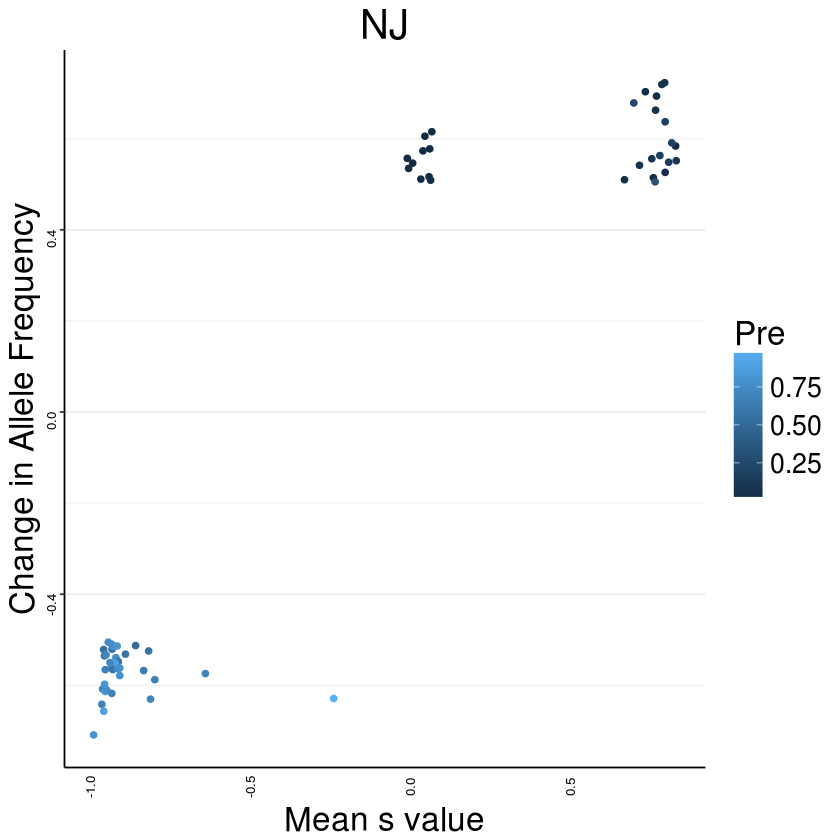

In [206]:
ggplot(meanmafsNJ, aes(x=mean, y=(diff))) +
ggtitle("NJ") +
    geom_point(aes(color=Pre)) +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Change in Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

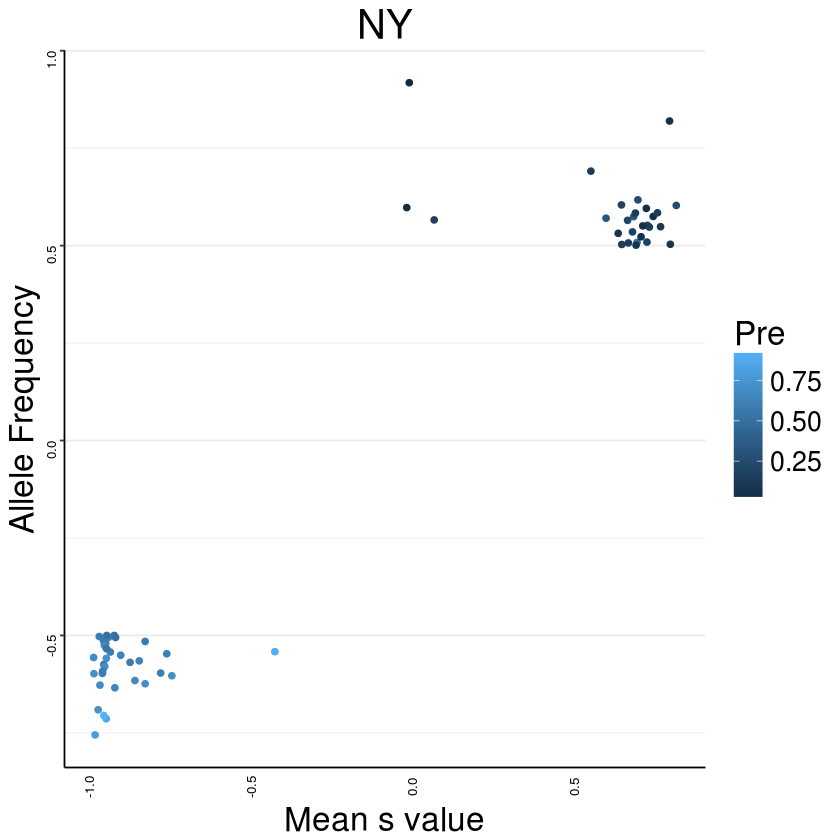

In [207]:
ggplot(meanmafsNY, aes(x=mean, y=(diff))) +
    geom_point(aes(color=Pre)) +
    ggtitle("NY") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

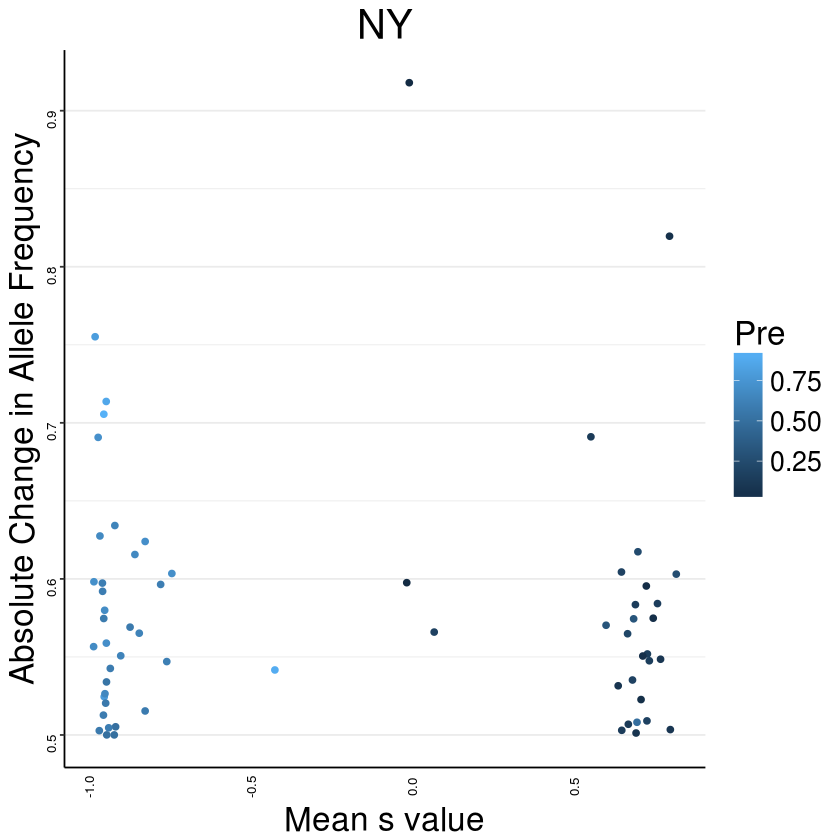

In [208]:
ggplot(meanmafsNY, aes(x=mean, y=abs(diff))) +
    geom_point(aes(color=Pre)) +
    ggtitle("NY") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Absolute Change in Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

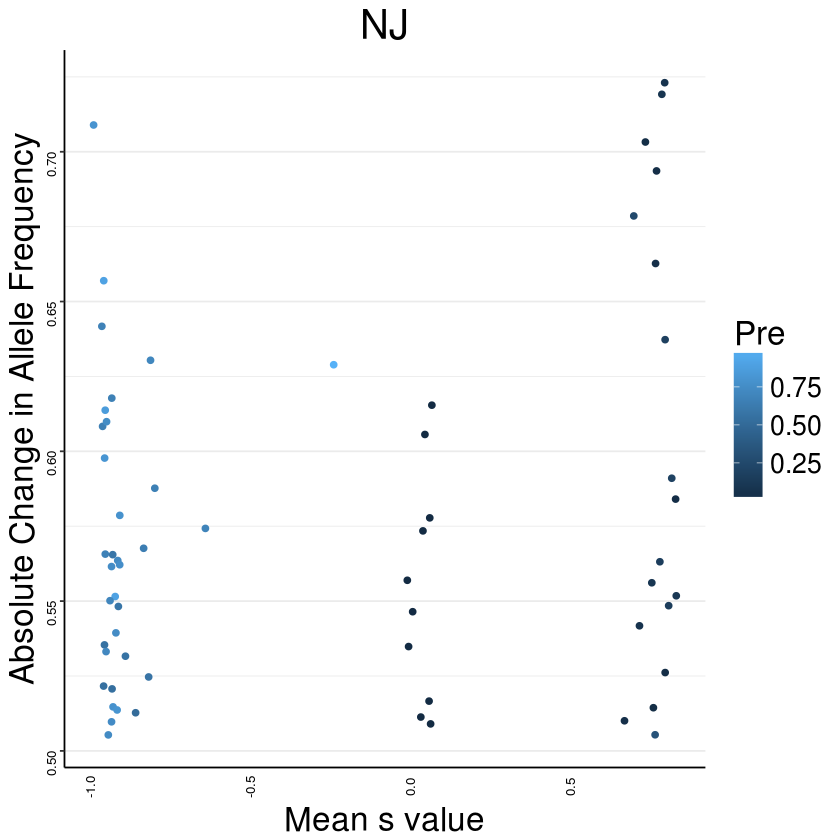

In [209]:
ggplot(meanmafsNJ, aes(x=mean, y=abs(diff))) +
ggtitle("NJ") +
    geom_point(aes(color=Pre)) +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Absolute Change in Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

Make plots of each step in the simulations

In [34]:
NY_sig[7]

[[1]]
         SNP    MAF_U    MAF_E nInd_U nInd_E
1   16839644 0.642422 0.083863      8     11
2   16839644 0.722371 0.000002      8     11
3   16839644 0.751581 0.153481      8     11
4   16839644 0.999996 0.314141      8     11
5   16839644 0.736438 0.077841      8     11
6   16839644 0.725314 0.165657      8     11
7   16839644 0.793464 0.096927      8     11
8   16839644 0.834622 0.089101      8     11
9   16839644 0.673634 0.263007      8     11
10  16839644 0.909517 0.388060      8     11
11  16839644 0.889931 0.089101      8     11
12  16839644 0.648761 0.168434      8     11
13  16839644 0.783922 0.267807      8     11
14  16839644 0.919679 0.159507      8     11
15  16839644 0.916426 0.177582      8     11
16  16839644 0.916198 0.360629      8     11
17  16839644 0.912650 0.257959      8     11
18  16839644 0.575379 0.166037      8     11
19  16839644 0.816450 0.079012      8     11
20  16839644 0.581038 0.286320      8     11
21  16839644 0.590367 0.168907      8     11
22  16839644 0.838155 0.071255      8     11
23  16839644 0.999998 0.463346      8     11
24  16839644 0.756918 0.072567      8     11
25  16839644 0.999999 0.403661      8     11
26  16839644 0.999998 0.150931      8     11
27  16839644 0.742416 0.204421      8     11
28  16839644 0.517578 0.178564      8     11
29  16839644 0.715513 0.185115      8     11
30  16839644 0.917976 0.272366      8     11
31  16839644 0.771052 0.169386      8     11
32  16839644 0.769435 0.156468      8     11
33  16839644 0.850198 0.265493      8     11
34  16839644 0.823730 0.159375      8     11
35  16839644 0.916426 0.165658      8     11
36  16839644 0.905128 0.079195      8     11
37  16839644 0.815238 0.159375      8     11
38  16839644 0.914338 0.249209      8     11
39  16839644 0.802294 0.161892      8     11
40  16839644 0.777856 0.073595      8     11
41  16839644 0.662103 0.156938      8     11
42  16839644 0.732700 0.548578      8     11
43  16839644 0.811972 0.160189      8     11
44  16839644 0.667850 0.000002      8     11
45  16839644 0.695184 0.403666      8     11
46  16839644 0.999997 0.138635      8     11
47  16839644 0.914338 0.000003      8     11
48  16839644 0.905129 0.162671      8     11
49  16839644 0.914580 0.077682      8     11
50  16839644 0.912651 0.156265      8     11
51  16839644 0.722379 0.283723      8     11
52  16839644 0.912650 0.071382      8     11
53  16839644 0.798669 0.000002      8     11
54  16839644 0.816675 0.196350      8     11
55  16839644 0.830506 0.178473      8     11
56  16839644 0.627458 0.148076      8     11
57  16839644 0.841537 0.162671      8     11
58  16839644 0.783512 0.156468      8     11
59  16839644 0.642422 0.083863      8     11
60  16839644 0.909232 0.343176      8     11
61  16839644 0.794947 0.067813      8     11
62  16839644 0.906606 0.263006      8     11
63  16839644 0.825126 0.497393      8     11
64  16839644 0.496880 0.074982      8     11
65  16839644 0.890432 0.165350      8     11
66  16839644 0.999998 0.070119      8     11
67  16839644 0.690819 0.395878      8     11
68  16839644 0.820994 0.161942      8     11
69  16839644 0.758002 0.143189      8     11
70  16839644 0.922698 0.281995      8     11
71  16839644 0.999996 0.271163      8     11
72  16839644 0.610121 0.071285      8     11
73  16839644 0.903121 0.000001      8     11
74  16839644 0.898476 0.168588      8     11
75  16839644 0.529401 0.000002      8     11
76  16839644 0.916198 0.063626      8     11
77  16839644 0.653531 0.185018      8     11
78  16839644 0.999999 0.068994      8     11
79  16839644 0.638413 0.079179      8     11
80  16839644 0.917976 0.175776      8     11
81  16839644 0.999998 0.342266      8     11
82  16839644 0.772950 0.068879      8     11
83  16839644 0.904629 0.074956      8     11
84  16839644 0.717374 0.067803      8     11
85  16839644 0.803771 0.079195      8     11
86  16839644 0.999999 0.067813      8     11
87  16839644 0.642408 0.178564      8     11
88  16839644 0.999998 0.174712    

In [27]:
##function to count the 1000 closest simulated f2s to the 100 bs f2s to create distribution to sample from
wfs_bs_s_count=function(bs, sim){
    ##pull out bs f2s
    f2bsvalues=bs[3]
    #print(NROW(f2bsvalues))
    simfull=as.data.frame(sim)
    #create column of 0s to count 
    simfull$count=0
    for (i in 1:NROW(f2bsvalues)){
        f2bs=f2bsvalues[i,]
        #print(f2bs)
        #order by closest values
        simfull$diff=abs(simfull$V2 - f2bs)
        #print(diff)
        simfull=simfull[order(simfull$diff),]
        #add a 1 to first 1000 rows
        simfull$count[1:1000]=simfull$count[1:1000] + 1
    }

    out=c(simfull)
return(out)
}

In [10]:
#f2s=replicate(100, mapply(wfs_byf1_variablene_s,  testbs[,2], MoreArgs = list(gen=2, c(424, 296), h=0.5, smin=-1, smax=1), SIMPLIFY=FALSE))

In [11]:
head(f2s)

ERROR: Error in head(f2s): object 'f2s' not found


In [28]:
testbs=as.data.frame(NY_sig[7])

In [29]:
NY_f2s=lapply(NY_sig[7], wfs_bs_simp, ne=c(424, 296), gen=2)
NY_f2s=lapply(NY_f2s, t)
NY_f2s=lapply(NY_f2s, as.data.frame)
tNY_f2s=lapply(NY_f2s, FUN=function(x){x$SNP=x[10001,1]; x})

In [30]:
head(tNY_f2s)

[[1]]
                  V1           V2            V3      SNP
V1      6.424220e-01 7.702703e-01  5.365404e-01 0.642422
V2      7.223710e-01 2.972973e-01 -8.592690e-01 0.642422
V3      7.515810e-01 8.479730e-01  8.587058e-01 0.642422
V4      9.999960e-01 1.000000e+00  2.577295e-01 0.642422
V5      7.364380e-01 7.837838e-01  4.872904e-01 0.642422
V6      7.253140e-01 4.425676e-01 -7.160098e-01 0.642422
V7      7.934640e-01 7.533784e-01 -2.057005e-01 0.642422
V8      8.346220e-01 8.885135e-01  3.405096e-01 0.642422
V9      6.736340e-01 6.148649e-01 -8.009481e-02 0.642422
V10     9.095170e-01 9.324324e-01  5.998998e-01 0.642422
V11     8.899310e-01 8.310811e-01 -4.299035e-01 0.642422
V12     6.487610e-01 3.108108e-01 -7.683644e-01 0.642422
V13     7.839220e-01 8.851351e-01  6.641248e-01 0.642422
V14     9.196790e-01 9.222973e-01 -1.681797e-01 0.642422
V15     9.164260e-01 4.290541e-01 -9.027928e-01 0.642422
V16     9.161980e-01 9.594595e-01  6.699313e-01 0.642422
V17     9.126500e-01 9.324324e-01  1.371218e-01 0.642422
V18     5.753790e-01 7.128378e-01  7.101497e-01 0.642422
V19     8.164500e-01 4.560811e-01 -8.124794e-01 0.642422
V20     5.810380e-01 7.162162e-01  8.433848e-01 0.642422
V21     5.903670e-01 5.979730e-01  8.136864e-02 0.642422
V22     8.381550e-01 6.216216e-01 -7.036844e-01 0.642422
V23     9.999980e-01 1.000000e+00 -7.245602e-01 0.642422
V24     7.569180e-01 8.648649e-01  5.802740e-01 0.642422
V25     9.999990e-01 1.000000e+00 -3.041998e-01 0.642422
V26     9.999980e-01 1.000000e+00 -7.451614e-01 0.642422
V27     7.424160e-01 3.986486e-01 -8.511192e-01 0.642422
V28     5.175780e-01 4.459459e-01 -1.518791e-01 0.642422
V29     7.155130e-01 2.331081e-01 -9.390047e-01 0.642422
V30     9.179760e-01 9.560811e-01  3.799208e-01 0.642422
V31     7.710520e-01 6.418919e-01 -3.081940e-01 0.642422
V32     7.694350e-01 7.567568e-01  1.450050e-01 0.642422
V33     8.501980e-01 8.918919e-01  4.998231e-01 0.642422
V34     8.237300e-01 8.006757e-01 -1.065162e-01 0.642422
V35     9.164260e-01 9.324324e-01  8.451640e-01 0.642422
V36     9.051280e-01 9.256757e-01  4.927982e-01 0.642422
V37     8.152380e-01 5.135135e-01 -7.756081e-01 0.642422
V38     9.143380e-01 7.601351e-01 -6.029511e-01 0.642422
V39     8.022940e-01 8.479730e-01  2.329689e-01 0.642422
V40     7.778560e-01 8.716216e-01  7.499309e-01 0.642422
V41     6.621030e-01 7.533784e-01  5.412908e-01 0.642422
V42     7.327000e-01 8.547297e-01  9.200836e-01 0.642422
V43     8.119720e-01 5.641892e-01 -6.877648e-01 0.642422
V44     6.678500e-01 5.810811e-01 -1.957610e-01 0.642422
V45     6.951840e-01 3.885135e-01 -6.848511e-01 0.642422
V46     9.999970e-01 1.000000e+00 -9.130619e-02 0.642422
V47     9.143380e-01 5.608108e-01 -8.190433e-01 0.642422
V48     9.051290e-01 9.121622e-01  4.893993e-01 0.642422
V49     9.145800e-01 9.425676e-01  8.745734e-01 0.642422
V50     9.126510e-01 8.108108e-01 -4.739545e-01 0.642422
V51     7.223790e-01 2.398649e-01 -8.806256e-01 0.642422
V52     9.126500e-01 8.479730e-01 -4.576814e-01 0.642422
V53     7.986690e-01 4.695946e-01 -7.744703e-01 0.642422
V54     8.166750e-01 8.614865e-01  1.935347e-01 0.642422
V55     8.305060e-01 8.243243e-01  5.086756e-01 0.642422
V56     6.274580e-01 6.790541e-01  2.200608e-01 0.642422
V57     8.415370e-01 8.817568e-01  4.925607e-01 0.642422
V58     7.835120e-01 8.648649e-01  9.424192e-01 0.642422
V59     6.424220e-01 3.108108e-01 -7.903601e-01 0.642422
V60     9.092320e-01 9.560811e-01  6.667603e-01 0.642422
V61     7.949470e-01 7.939189e-01 -1.262158e-02 0.642422
V62     9.066060e-01 6.993243e-01 -7.475213e-01 0.642422
V63     8.251260e-01 8.074324e-01  3.770630e-02 0.642422
V64     4.968800e-01 5.506757e-01  2.315735e-01 0.642422
V65     8.904320e-01 8.885135e-01 -4.684843e-01 0.642422
V66     9.999980e-01 1.000000e+00  7.213637e-01 0.642422
V67     6.908190e-01 6.891892e-01  8.304169e-02 0.642422
V68     8.209940e-01 7.601351e-01 -3.257255e-01 0.642422
V69     7.580020e-01 2.871622e-01 -8.586523e-01 0.642422
V70 

In [31]:
head(NY_sig[7])

[[1]]
         SNP    MAF_U    MAF_E nInd_U nInd_E
1   16839644 0.642422 0.083863      8     11
2   16839644 0.722371 0.000002      8     11
3   16839644 0.751581 0.153481      8     11
4   16839644 0.999996 0.314141      8     11
5   16839644 0.736438 0.077841      8     11
6   16839644 0.725314 0.165657      8     11
7   16839644 0.793464 0.096927      8     11
8   16839644 0.834622 0.089101      8     11
9   16839644 0.673634 0.263007      8     11
10  16839644 0.909517 0.388060      8     11
11  16839644 0.889931 0.089101      8     11
12  16839644 0.648761 0.168434      8     11
13  16839644 0.783922 0.267807      8     11
14  16839644 0.919679 0.159507      8     11
15  16839644 0.916426 0.177582      8     11
16  16839644 0.916198 0.360629      8     11
17  16839644 0.912650 0.257959      8     11
18  16839644 0.575379 0.166037      8     11
19  16839644 0.816450 0.079012      8     11
20  16839644 0.581038 0.286320      8     11
21  16839644 0.590367 0.168907      8     11
22  16839644 0.838155 0.071255      8     11
23  16839644 0.999998 0.463346      8     11
24  16839644 0.756918 0.072567      8     11
25  16839644 0.999999 0.403661      8     11
26  16839644 0.999998 0.150931      8     11
27  16839644 0.742416 0.204421      8     11
28  16839644 0.517578 0.178564      8     11
29  16839644 0.715513 0.185115      8     11
30  16839644 0.917976 0.272366      8     11
31  16839644 0.771052 0.169386      8     11
32  16839644 0.769435 0.156468      8     11
33  16839644 0.850198 0.265493      8     11
34  16839644 0.823730 0.159375      8     11
35  16839644 0.916426 0.165658      8     11
36  16839644 0.905128 0.079195      8     11
37  16839644 0.815238 0.159375      8     11
38  16839644 0.914338 0.249209      8     11
39  16839644 0.802294 0.161892      8     11
40  16839644 0.777856 0.073595      8     11
41  16839644 0.662103 0.156938      8     11
42  16839644 0.732700 0.548578      8     11
43  16839644 0.811972 0.160189      8     11
44  16839644 0.667850 0.000002      8     11
45  16839644 0.695184 0.403666      8     11
46  16839644 0.999997 0.138635      8     11
47  16839644 0.914338 0.000003      8     11
48  16839644 0.905129 0.162671      8     11
49  16839644 0.914580 0.077682      8     11
50  16839644 0.912651 0.156265      8     11
51  16839644 0.722379 0.283723      8     11
52  16839644 0.912650 0.071382      8     11
53  16839644 0.798669 0.000002      8     11
54  16839644 0.816675 0.196350      8     11
55  16839644 0.830506 0.178473      8     11
56  16839644 0.627458 0.148076      8     11
57  16839644 0.841537 0.162671      8     11
58  16839644 0.783512 0.156468      8     11
59  16839644 0.642422 0.083863      8     11
60  16839644 0.909232 0.343176      8     11
61  16839644 0.794947 0.067813      8     11
62  16839644 0.906606 0.263006      8     11
63  16839644 0.825126 0.497393      8     11
64  16839644 0.496880 0.074982      8     11
65  16839644 0.890432 0.165350      8     11
66  16839644 0.999998 0.070119      8     11
67  16839644 0.690819 0.395878      8     11
68  16839644 0.820994 0.161942      8     11
69  16839644 0.758002 0.143189      8     11
70  16839644 0.922698 0.281995      8     11
71  16839644 0.999996 0.271163      8     11
72  16839644 0.610121 0.071285      8     11
73  16839644 0.903121 0.000001      8     11
74  16839644 0.898476 0.168588      8     11
75  16839644 0.529401 0.000002      8     11
76  16839644 0.916198 0.063626      8     11
77  16839644 0.653531 0.185018      8     11
78  16839644 0.999999 0.068994      8     11
79  16839644 0.638413 0.079179      8     11
80  16839644 0.917976 0.175776      8     11
81  16839644 0.999998 0.342266      8     11
82  16839644 0.772950 0.068879      8     11
83  16839644 0.904629 0.074956      8     11
84  16839644 0.717374 0.067803      8     11
85  16839644 0.803771 0.079195      8     11
86  16839644 0.999999 0.067813      8     11
87  16839644 0.642408 0.178564      8     11
88  16839644 0.999998 0.174712    

In [40]:
NY_f2scount=mapply(wfs_bs_s_count, NY_sig[7], tNY_f2s, SIMPLIFY=FALSE)

In [41]:
NY_f2scount=as.data.frame(NY_f2scount)
#NY_f2scount$diff=NULL
head(NY_f2scount)

V1       V2        V3         SNP      count diff       
1 0.756918 0.1993243 -0.9830337 0.642422 18    0.001498676
2 0.685356 0.1993243 -0.9478206 0.642422 18    0.001498676
3 0.916426 0.1993243 -0.9812862 0.642422 18    0.001498676
4 0.529401 0.1993243 -0.8939496 0.642422 18    0.001498676
5 0.695184 0.1993243 -0.9895529 0.642422 18    0.001498676
6 0.581038 0.1993243 -0.9380256 0.642422 18    0.001498676

In [43]:
NY_f2scount$f2bs=rep(as.vector(testbs$MAF_E),len=100001)

In [44]:
NY_f2scount=as.data.frame(NY_f2scount)
colnames(NY_f2scount)=c("f1bs", "f2sim", "s", "SNP", "count", "diff", "f2bs")
NY_f2scount=NY_f2scount[order(NY_f2scount$s, decreasing = TRUE),]
NY_f2scount$sim=1:nrow(NY_f2scount)

probs=NY_f2scount

In [45]:
head(NY_f2scount)

f1bs         f2sim        s            SNP      count diff        
100001 1.683964e+07 1.683964e+07 1.683964e+07 0.642422 0     1.683964e+07
77059  7.835120e-01 9.189189e-01 9.999900e-01 0.642422 0     7.180959e-01
30268  5.175780e-01 6.756757e-01 9.999845e-01 0.642422 0     4.748527e-01
70067  7.839220e-01 8.885135e-01 9.999502e-01 0.642422 0     6.876905e-01
44148  6.101210e-01 7.668919e-01 9.999088e-01 0.642422 0     5.660689e-01
74772  7.580020e-01 9.087838e-01 9.998402e-01 0.642422 0     7.079608e-01
       f2bs     sim
100001 0.083863 1  
77059  0.083863 2  
30268  0.161942 3  
70067  0.395878 4  
44148  0.162671 5  
74772  0.071285 6

In [37]:
NY_f2scount[order(-NY_f2scount$f1bs),]

f1bs         f2sim      s            SNP      count diff        
100001 1.683964e+07 16839644   1.683964e+07 0.642422 0     1.683964e+07
92681  9.999990e-01        1   9.995848e-01 0.642422 0     7.991770e-01
99931  9.999990e-01        1   9.986960e-01 0.642422 0     7.991770e-01
97513  9.999990e-01        1   9.977021e-01 0.642422 0     7.991770e-01
98558  9.999990e-01        1   9.947829e-01 0.642422 0     7.991770e-01
97288  9.999990e-01        1   9.942894e-01 0.642422 0     7.991770e-01
89365  9.999990e-01        1   9.938085e-01 0.642422 0     7.991770e-01
91935  9.999990e-01        1   9.932941e-01 0.642422 0     7.991770e-01
91682  9.999990e-01        1   9.930827e-01 0.642422 0     7.991770e-01
94519  9.999990e-01        1   9.929314e-01 0.642422 0     7.991770e-01
99673  9.999990e-01        1   9.924448e-01 0.642422 0     7.991770e-01
95176  9.999990e-01        1   9.918453e-01 0.642422 0     7.991770e-01
94372  9.999990e-01        1   9.902623e-01 0.642422 0     7.991770e-01
98604  9.999990e-01        1   9.900580e-01 0.642422 0     7.991770e-01
91964  9.999990e-01        1   9.880610e-01 0.642422 0     7.991770e-01
92221  9.999990e-01        1   9.876552e-01 0.642422 0     7.991770e-01
99030  9.999990e-01        1   9.869233e-01 0.642422 0     7.991770e-01
97251  9.999990e-01        1   9.867036e-01 0.642422 0     7.991770e-01
95353  9.999990e-01        1   9.866128e-01 0.642422 0     7.991770e-01
99568  9.999990e-01        1   9.858405e-01 0.642422 0     7.991770e-01
93440  9.999990e-01        1   9.857119e-01 0.642422 0     7.991770e-01
91187  9.999990e-01        1   9.853264e-01 0.642422 0     7.991770e-01
99142  9.999990e-01        1   9.843229e-01 0.642422 0     7.991770e-01
94003  9.999990e-01        1   9.828214e-01 0.642422 0     7.991770e-01
95095  9.999990e-01        1   9.804417e-01 0.642422 0     7.991770e-01
94262  9.999990e-01        1   9.804131e-01 0.642422 0     7.991770e-01
89097  9.999990e-01        1   9.800730e-01 0.642422 0     7.991770e-01
97810  9.999990e-01        1   9.800187e-01 0.642422 0     7.991770e-01
92298  9.999990e-01        1   9.797717e-01 0.642422 0     7.991770e-01
97438  9.999990e-01        1   9.796687e-01 0.642422 0     7.991770e-01
⋮      ⋮            ⋮          ⋮            ⋮        ⋮     ⋮           
1813   0.49688      0.16891892 -0.9498407   0.642422 70    0.031904081 
3119   0.49688      0.14189189 -0.9499333   0.642422 60    0.058931108 
4733   0.49688      0.10472973 -0.9507909   0.642422 37    0.096093270 
1947   0.49688      0.16554054 -0.9511462   0.642422 70    0.035282459 
2635   0.49688      0.15202703 -0.9512578   0.642422 64    0.048795973 
460    0.49688      0.19256757 -0.9554600   0.642422 74    0.008255432 
1560   0.49688      0.17229730 -0.9579383   0.642422 70    0.028525703 
4009   0.49688      0.12162162 -0.9606339   0.642422 43    0.079201378 
2641   0.49688      0.15202703 -0.9639352   0.642422 64    0.048795973 
4014   0.49688      0.12162162 -0.9661897   0.642422 43    0.079201378 
2518   0.49688      0.15540541 -0.9663216   0.642422 68    0.045417595 
3573   0.49688      0.13175676 -0.9668304   0.642422 52    0.069066243 
2803   0.49688      0.14864865 -0.9670503   0.642422 63    0.052174351 
2329   0.49688      0.15878378 -0.9705376   0.642422 68    0.042039216 
4305   0.49688      0.11486486 -0.9749496   0.642422 39    0.085958135 
2822   0.49688      0.14864865 -0.9776430   0.642422 62    0.052174351 
5478   0.49688      0.08783784 -0.9804180   0.642422 35    0.112985162 
3878   0.49688      0.12500000 -0.9823749   0.642422 48    0.075823000 
1811   0.49688      0.16891892 -0.9860260   0.642422 70    0.031904081 
4734   0.49688      0.10472973 -0.9860447   0.642422 37    0.096093270 
3879   0.49688      0.12500000 -0.9875313   0.642422 48    0.075823000 
4879   0.49688      0.10135135 -0.9886754   0.642422 37    0.099471649 
4306   0.49688      0.11486486 -0.9892910   0.642422 39    0.085958135 
5479   0.49688      0.08783784 -0.9931772   0.6

In [31]:
=(NY_f2scount[unique(NY_f2scount$s),])

ERROR: Error in xj[i]: only 0's may be mixed with negative subscripts


In [29]:
(dups)

f1bs     f2sim     s         SNP      count diff      f2bs    sim 
70910 0.803771 0.8918919 0.9428704 0.642422 0     0.6910689 0.38806 2806

In [38]:
NY_f2scount=pivot_longer(NY_f2scount,
  cols = c(1:3,7),
  names_to = "Stat",
  values_to = "value"
)

Warning message:
“Assigning non-quosure objects to quosure lists is deprecated as of rlang 0.3.0.
Please coerce to a bare list beforehand with `as.list()`
This warning is displayed once per session.”Warning message:
“Quosure lists can't be concatenated with objects other than quosures as of rlang 0.3.0.
Please call `as.list()` on the quosure list first.
This warning is displayed once per session.”

In [39]:
head(NY_f2scount)

SNP      count diff         sim Stat  value       
1 0.642422 0     1.683964e+07 1   f1bs  1.683964e+07
2 0.642422 0     1.683964e+07 1   f2sim 1.683964e+07
3 0.642422 0     1.683964e+07 1   s     1.683964e+07
4 0.642422 0     1.683964e+07 1   f2bs  8.386300e-02
5 0.642422 0     7.180959e-01 2   f1bs  7.835120e-01
6 0.642422 0     7.180959e-01 2   f2sim 9.189189e-01

Warning message:
“Removed 3 rows containing missing values (geom_point).”

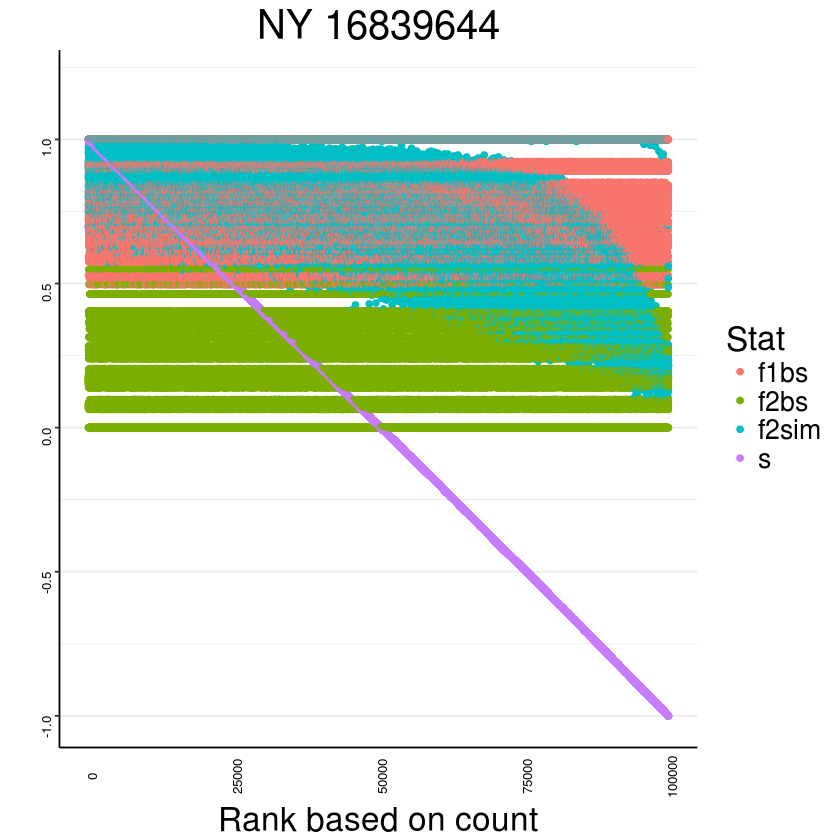

In [24]:
ggplot(NY_f2scount, aes(x=sim, y=(value))) +
    geom_point(aes(color=Stat)) +
    ggtitle("NY 16839644") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    theme_bw() +
    xlab("Rank based on count")+
    ylab("")+
    ylim(-1,1.2)+
   # xlim(0,1000)+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

Warning message:
“Removed 3 rows containing missing values (geom_point).”

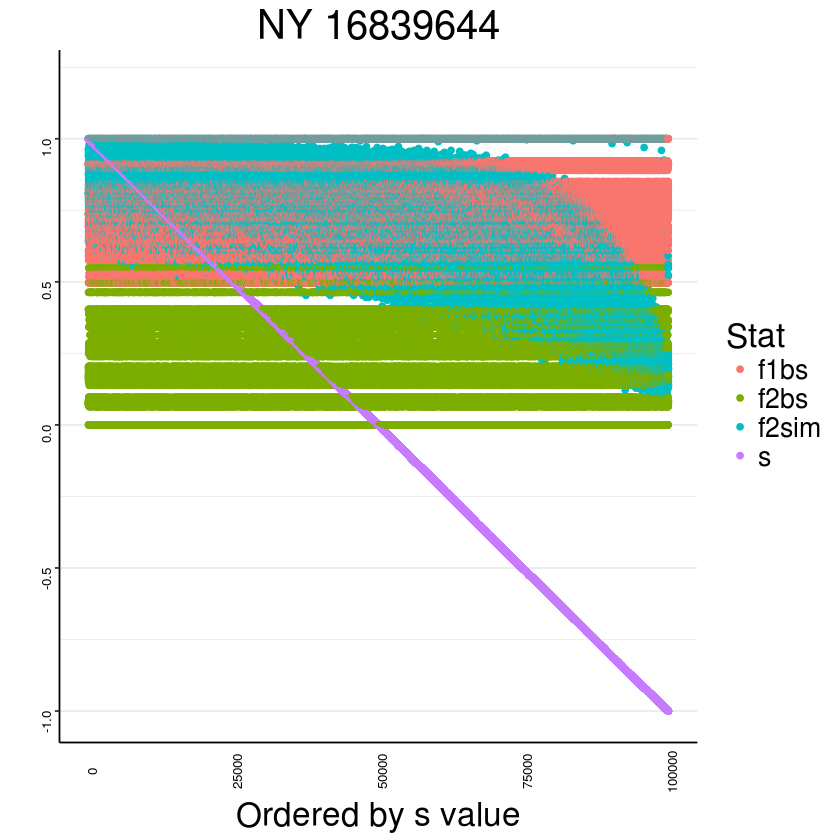

In [221]:
ggplot(NY_f2scount, aes(x=sim, y=(value))) +
    geom_point(aes(color=Stat)) +
    ggtitle("NY 16839644") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    theme_bw() +
    xlab("Ordered by s value")+
    ylab("")+
    ylim(-1,1.2)+
   # xlim(0,1000)+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

In [68]:
class(probs)

[1] "data.frame"

In [53]:
#sNY=lapply(probs, function(x){sample(x$sim, 1000, replace = FALSE, prob = x$count)})
sNY=sample(probs$sim, 1000, replace=FALSE, prob=probs$count)

In [54]:
head(NY_f2scount)

SNP      count diff         sim Stat  value       
1 0.642422 0     1.683964e+07 1   f1bs  1.683964e+07
2 0.642422 0     1.683964e+07 1   f2sim 1.683964e+07
3 0.642422 0     1.683964e+07 1   s     1.683964e+07
4 0.642422 0     1.683964e+07 1   f2bs  8.386300e-02
5 0.642422 0     7.991770e-01 2   f1bs  9.999980e-01
6 0.642422 0     7.991770e-01 2   f2sim 1.000000e+00

In [55]:
NY_f2scount_top=NY_f2scount[NY_f2scount$sim %in% sNY,]

In [58]:
max(NY_f2scount_top$count)

[1] 74

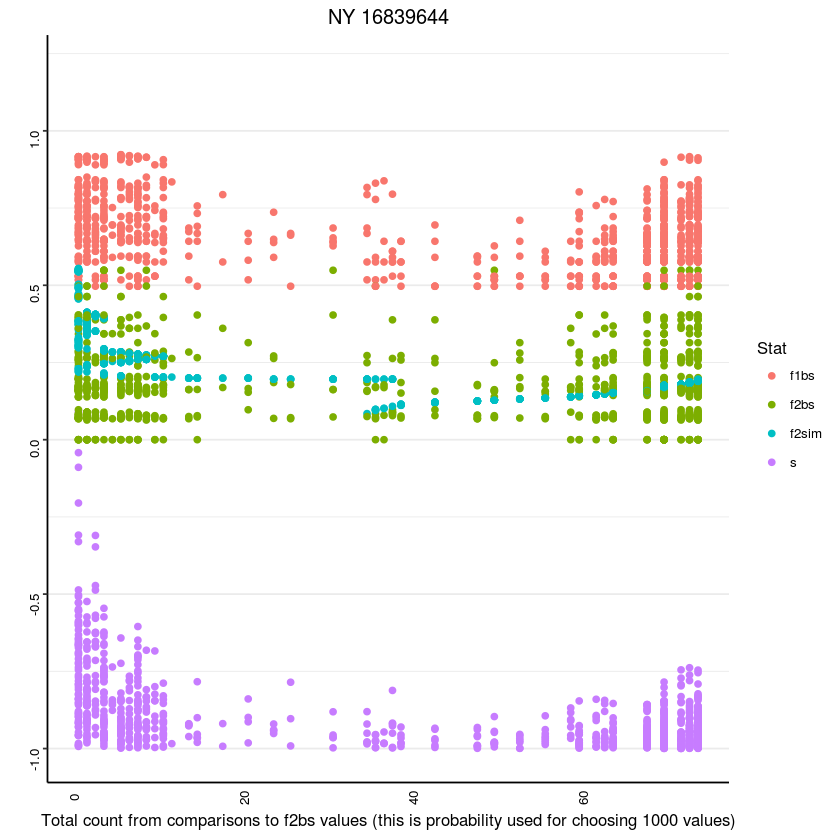

In [60]:
ggplot(NY_f2scount_top, aes(x=count, y=(value))) +
    geom_point(aes(color=Stat)) +
    ggtitle("NY 16839644") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    theme_bw() +
    xlab("Total count from comparisons to f2bs values (this is probability used for choosing 1000 values)")+
    ylab("")+
    ylim(-1,1.2)+
   # xlim(0,1000)+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=10)
    )